In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as st 
import matplotlib.pyplot as plt

In [91]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#Visualisation & preprocessing

In [92]:
df = pd.read_csv(r'/content/gdrive/My Drive/openclassrooms/2016_Building_Energy_Benchmarking.tsv', sep = '\t')


In [93]:
display(df)

OSEBuildingID  DataYear        BuildingType PrimaryPropertyType  \
0                 1      2016      NonResidential               Hotel   
1                 2      2016      NonResidential               Hotel   
2                 3      2016      NonResidential               Hotel   
3                 5      2016      NonResidential               Hotel   
4                 8      2016      NonResidential               Hotel   
...             ...       ...                 ...                 ...   
3371          50222      2016  Nonresidential COS              Office   
3372          50223      2016  Nonresidential COS               Other   
3373          50224      2016  Nonresidential COS               Other   
3374          50225      2016  Nonresidential COS  Mixed Use Property   
3375          50226      2016  Nonresidential COS  Mixed Use Property   

                             PropertyName           Address     City State  \
0                    Mayflower park hotel     405 Olive way  Seattle    WA   
1                         Paramount Hotel   724 Pine street  Seattle    WA   
2                 5673-The Westin Seattle   1900 5th Avenue  Seattle    WA   
3                               HOTEL MAX    620 STEWART ST  Seattle    WA   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST  Seattle    WA   
...                                   ...               ...      ...   ...   
3371                Horticulture building  1600 S Dakota St  Seattle    WA   
3372  International district/Chinatown CC     719 8th Ave S  Seattle    WA   
3373                      Queen Anne Pool    1920 1st Ave W  Seattle    WA   
3374          South Park Community Center    8319 8th Ave S  Seattle    WA   
3375          Van Asselt Community Center  2820 S Myrtle St  Seattle    WA   

      ZipCode TaxParcelIdentificationNumber  ...  Electricity(kWh)  \
0     98101.0                    0659000030  ...      1.156514e+06   
1     98101.0                    0659000220  ...      9.504252e+05   
2     98101.0                    0659000475  ...      1.451544e+07   
3     98101.0                    0659000640  ...      8.115253e+05   
4     98121.0                    0659000970  ...      1.573449e+06   
...       ...                           ...  ...               ...   
3371      NaN                    1624049080  ...      1.536550e+05   
3372      NaN                    3558300000  ...      1.162210e+05   
3373      NaN                    1794501150  ...      5.252517e+05   
3374      NaN                    7883603155  ...      1.022480e+05   
3375      NaN                    7857002030  ...      1.267744e+05   

     Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
0         3.946027e+06        12764.529300      1.276453e+06        False   
1         3.242851e+06        51450.816410      5.145082e+06        False   
2         4.952666e+07        14938.000000      1.493800e+06        False   
3         2.768924e+06        18112.130860      1.811213e+06        False   
4         5.368607e+06        88039.984380      8.803998e+06        False   
...                ...                 ...               ...          ...   
3371      5.242709e+05         3254.750244      3.254750e+05         True   
3372      3.965461e+05         5537.299805      5.537300e+05        False   
3373      1.792159e+06        39737.390630      3.973739e+06        False   
3374      3.488702e+05         3706.010010      3.706010e+05        False   
3375      4.325542e+05         7203.419922      7.203420e+05        False   

      Comments              ComplianceStatus  Outlier  TotalGHGEmissions  \
0          NaN                     Compliant      NaN             249.98   
1          NaN                     Compliant      NaN             295.86   
2          NaN                     Compliant      NaN            2089.28   
3          NaN                     Compliant      NaN             286.43   
4          NaN                     Compliant  

In [94]:
for i in df.columns:
    print(i, sum(df[i].isna()), df[i].dtype)
  

OSEBuildingID 0 int64
DataYear 0 int64
BuildingType 0 object
PrimaryPropertyType 0 object
PropertyName 0 object
Address 0 object
City 0 object
State 0 object
ZipCode 16 float64
TaxParcelIdentificationNumber 0 object
CouncilDistrictCode 0 int64
Neighborhood 0 object
Latitude 0 float64
Longitude 0 float64
YearBuilt 0 int64
NumberofBuildings 8 float64
NumberofFloors 0 int64
PropertyGFATotal 0 int64
PropertyGFAParking 0 int64
PropertyGFABuilding(s) 0 int64
ListOfAllPropertyUseTypes 9 object
LargestPropertyUseType 20 object
LargestPropertyUseTypeGFA 20 float64
SecondLargestPropertyUseType 1697 object
SecondLargestPropertyUseTypeGFA 1697 float64
ThirdLargestPropertyUseType 2780 object
ThirdLargestPropertyUseTypeGFA 2780 float64
YearsENERGYSTARCertified 3257 object
ENERGYSTARScore 843 float64
SiteEUI(kBtu/sf) 7 float64
SiteEUIWN(kBtu/sf) 6 float64
SourceEUI(kBtu/sf) 9 float64
SourceEUIWN(kBtu/sf) 9 float64
SiteEnergyUse(kBtu) 5 float64
SiteEnergyUseWN(kBtu) 6 float64
SteamUse(kBtu) 9 float64


In [95]:
nombre = 0
df2 = df.copy()
for i in df2.columns:
    if (sum(df2[i].isna())/len(df2[i])) * 100 > 50:
        nombre = nombre + 1
        final_df = df2.drop(i, axis = 1)

In [96]:
final_df = final_df.query('BuildingType == "NonResidential"'  or 'BuildingType == "Nonresidential COS"' or 'BuildingType == "SPS-District K-12"' or 'BuildingType == "Campus"')

In [97]:
len(final_df)

1460

In [98]:
print(final_df['BuildingType'].unique())

['NonResidential']


In [99]:
for i in final_df.columns:
  print(i)

OSEBuildingID
DataYear
BuildingType
PrimaryPropertyType
PropertyName
Address
City
State
ZipCode
TaxParcelIdentificationNumber
CouncilDistrictCode
Neighborhood
Latitude
Longitude
YearBuilt
NumberofBuildings
NumberofFloors
PropertyGFATotal
PropertyGFAParking
PropertyGFABuilding(s)
ListOfAllPropertyUseTypes
LargestPropertyUseType
LargestPropertyUseTypeGFA
SecondLargestPropertyUseType
SecondLargestPropertyUseTypeGFA
ThirdLargestPropertyUseType
ThirdLargestPropertyUseTypeGFA
YearsENERGYSTARCertified
ENERGYSTARScore
SiteEUI(kBtu/sf)
SiteEUIWN(kBtu/sf)
SourceEUI(kBtu/sf)
SourceEUIWN(kBtu/sf)
SiteEnergyUse(kBtu)
SiteEnergyUseWN(kBtu)
SteamUse(kBtu)
Electricity(kWh)
Electricity(kBtu)
NaturalGas(therms)
NaturalGas(kBtu)
DefaultData
Comments
ComplianceStatus
TotalGHGEmissions
GHGEmissionsIntensity


In [100]:
from numpy.ma.extras import median
from pandas.core.algorithms import mode

def valeurvides(final_df, y):
  if y == 'mean':
    for i in final_df.columns:
      if final_df[i].dtype == 'float64' or final_df[i].dtype == 'int':
        final_df[i] = final_df[i].fillna(value = np.mean(final_df[i]))
  if y == 'median':
     for i in final_df.columns:
       if final_df[i].dtype == 'float64'or final_df[i].dtype == 'int':
         true_median = median(final_df[i])
         final_df[i] = final_df[i].fillna(value = true_median)
  return final_df


final_df2 = valeurvides(final_df, "median")

In [101]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    display(df_out)
    return df_out



In [102]:
final_df2 = final_df2.drop(['PropertyGFAParking', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'Comments' , 'OSEBuildingID' ], axis = 1)


In [103]:
final_df2['ZipCode'] = final_df2['ZipCode'].astype('object')

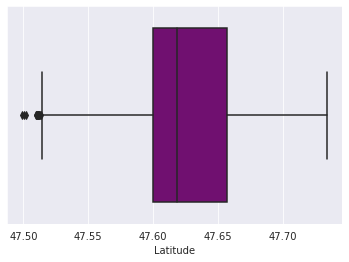

DataYear    BuildingType          PrimaryPropertyType  \
0         2016  NonResidential                        Hotel   
1         2016  NonResidential                        Hotel   
2         2016  NonResidential                        Hotel   
3         2016  NonResidential                        Hotel   
4         2016  NonResidential                        Hotel   
...        ...             ...                          ...   
3338      2016  NonResidential                    Warehouse   
3339      2016  NonResidential  Small- and Mid-Sized Office   
3340      2016  NonResidential                        Other   
3347      2016  NonResidential                  K-12 School   
3356      2016  NonResidential           Mixed Use Property   

                                PropertyName                    Address  \
0                       Mayflower park hotel              405 Olive way   
1                            Paramount Hotel            724 Pine street   
2                    5673-The Westin Seattle            1900 5th Avenue   
3                                  HOTEL MAX             620 STEWART ST   
4                WARWICK SEATTLE HOTEL (ID8)              401 LENORA ST   
...                                      ...                        ...   
3338  Airport - Maintenance Shop - DOT: KCIA                 6518 Ellis   
3339                 Airport - Main Terminal         7277 Perimeter Rd.   
3340                Tennis Center Sand Point  7135 Sportsfield Drive NE   
3347                  Hamlin Robinson School        1701 20th Ave South   
3356                                    AIBS        601 Westlake Ave N.   

         City State  ZipCode TaxParcelIdentificationNumber  \
0     Seattle    WA  98101.0                    0659000030   
1     Seattle    WA  98101.0                    0659000220   
2     Seattle    WA  98101.0                    0659000475   
3     Seattle    WA  98101.0                    0659000640   
4     Seattle    WA  98121.0                    0659000970   
...       ...   ...      ...                           ...   
3338  Seattle    WA  98108.0                    2824049007   
3339  Seattle    WA  98108.0                    2824049007   
3340  Seattle    WA  98155.0                    0225049062   
3347  Seattle    WA  98144.0                    7548300840   
3356  Seattle    WA  98109.0                    4088803385   

      CouncilDistrictCode  ... SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
0                       7  ...          7.456910e+06      2003882.00   
1                       7  ...          8.664479e+06            0.00   
2                       7  ...          7.393711e+07     21566554.00   
3                       7  ...          6.946800e+06      2214446.25   
4                       7  ...          1.465650e+07            0.00   
...                   ...  ...                   ...             ...   
3338                    2  ...          4.182622e+06            0.00   
3339                    2  ...          4.731814e+06            0.00   
3340                    4  ...          3.198858e+06            0.00   
3347                    3  ...          1.397742e+06            0.00   
3356                    7  ...          4.107860e+07            0.00   

      Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
0         1.156514e+06          3946027.0         12764.52930   
1         9.504252e+05          3242851.0         51450.81641   
2         1.451544e+07         49526664.0         14938.00000   
3         8.115253e+05          2768924.0         18112.13086   
4         1.573449e+06          5368607.0         88039.98438   
...                ...                ...                 ...   
3338      2.147724e+05           732803.0         28730.51953   
3339      6.351199e+05          2167029.0         22536.21094   
3340      5.573329e+05          1901620.0         10241.59961   
3347      3.886204e+05          1325973.0             0.00000   
3356      6.927551e+06 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Latitude


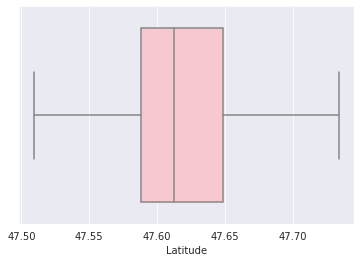

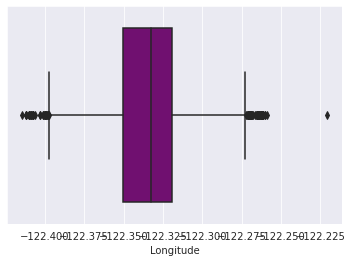

DataYear    BuildingType          PrimaryPropertyType  \
0         2016  NonResidential                        Hotel   
1         2016  NonResidential                        Hotel   
2         2016  NonResidential                        Hotel   
3         2016  NonResidential                        Hotel   
4         2016  NonResidential                        Hotel   
...        ...             ...                          ...   
3337      2016  NonResidential                        Hotel   
3338      2016  NonResidential                    Warehouse   
3339      2016  NonResidential  Small- and Mid-Sized Office   
3347      2016  NonResidential                  K-12 School   
3356      2016  NonResidential           Mixed Use Property   

                                PropertyName              Address     City  \
0                       Mayflower park hotel        405 Olive way  Seattle   
1                            Paramount Hotel      724 Pine street  Seattle   
2                    5673-The Westin Seattle      1900 5th Avenue  Seattle   
3                                  HOTEL MAX       620 STEWART ST  Seattle   
4                WARWICK SEATTLE HOTEL (ID8)        401 LENORA ST  Seattle   
...                                      ...                  ...      ...   
3337                     Olympic Hospitality    3926 Aurora Ave N  Seattle   
3338  Airport - Maintenance Shop - DOT: KCIA           6518 Ellis  Seattle   
3339                 Airport - Main Terminal   7277 Perimeter Rd.  Seattle   
3347                  Hamlin Robinson School  1701 20th Ave South  Seattle   
3356                                    AIBS  601 Westlake Ave N.  Seattle   

     State  ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  ...  \
0       WA  98101.0                    0659000030                    7  ...   
1       WA  98101.0                    0659000220                    7  ...   
2       WA  98101.0                    0659000475                    7  ...   
3       WA  98101.0                    0659000640                    7  ...   
4       WA  98121.0                    0659000970                    7  ...   
...    ...      ...                           ...                  ...  ...   
3337    WA  98103.0                    1931300480                    4  ...   
3338    WA  98108.0                    2824049007                    2  ...   
3339    WA  98108.0                    2824049007                    2  ...   
3347    WA  98144.0                    7548300840                    3  ...   
3356    WA  98109.0                    4088803385                    7  ...   

     SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
0             7.456910e+06      2003882.00      1.156514e+06   
1             8.664479e+06            0.00      9.504252e+05   
2             7.393711e+07     21566554.00      1.451544e+07   
3             6.946800e+06      2214446.25      8.115253e+05   
4             1.465650e+07            0.00      1.573449e+06   
...                    ...             ...               ...   
3337          6.042400e+06            0.00      1.206219e+06   
3338          4.182622e+06            0.00      2.147724e+05   
3339          4.731814e+06            0.00      6.351199e+05   
3347          1.397742e+06            0.00      3.886204e+05   
3356          4.107860e+07            0.00      6.927551e+06   

      Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
0             3946027.0         12764.52930         1276453.0        False   
1             3242851.0         51450.81641         5145082.0        False   
2            49526664.0         14938.00000         1493800.0        False   
3             2768924.0         18112.13086         1811213.0        False   
4             5368607.0         88039.98438         8803998.0        False   
...                 ...                 ...               ...          ...   
3337          4115620.0         19267.79102     

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Longitude


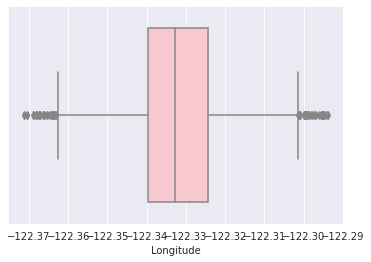

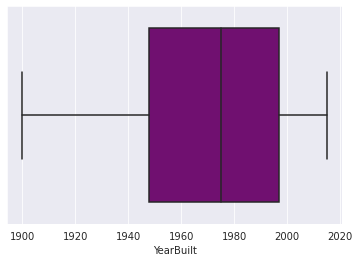

DataYear    BuildingType          PrimaryPropertyType  \
0         2016  NonResidential                        Hotel   
1         2016  NonResidential                        Hotel   
2         2016  NonResidential                        Hotel   
3         2016  NonResidential                        Hotel   
4         2016  NonResidential                        Hotel   
...        ...             ...                          ...   
3337      2016  NonResidential                        Hotel   
3338      2016  NonResidential                    Warehouse   
3339      2016  NonResidential  Small- and Mid-Sized Office   
3347      2016  NonResidential                  K-12 School   
3356      2016  NonResidential           Mixed Use Property   

                                PropertyName              Address     City  \
0                       Mayflower park hotel        405 Olive way  Seattle   
1                            Paramount Hotel      724 Pine street  Seattle   
2                    5673-The Westin Seattle      1900 5th Avenue  Seattle   
3                                  HOTEL MAX       620 STEWART ST  Seattle   
4                WARWICK SEATTLE HOTEL (ID8)        401 LENORA ST  Seattle   
...                                      ...                  ...      ...   
3337                     Olympic Hospitality    3926 Aurora Ave N  Seattle   
3338  Airport - Maintenance Shop - DOT: KCIA           6518 Ellis  Seattle   
3339                 Airport - Main Terminal   7277 Perimeter Rd.  Seattle   
3347                  Hamlin Robinson School  1701 20th Ave South  Seattle   
3356                                    AIBS  601 Westlake Ave N.  Seattle   

     State  ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  ...  \
0       WA  98101.0                    0659000030                    7  ...   
1       WA  98101.0                    0659000220                    7  ...   
2       WA  98101.0                    0659000475                    7  ...   
3       WA  98101.0                    0659000640                    7  ...   
4       WA  98121.0                    0659000970                    7  ...   
...    ...      ...                           ...                  ...  ...   
3337    WA  98103.0                    1931300480                    4  ...   
3338    WA  98108.0                    2824049007                    2  ...   
3339    WA  98108.0                    2824049007                    2  ...   
3347    WA  98144.0                    7548300840                    3  ...   
3356    WA  98109.0                    4088803385                    7  ...   

     SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
0             7.456910e+06      2003882.00      1.156514e+06   
1             8.664479e+06            0.00      9.504252e+05   
2             7.393711e+07     21566554.00      1.451544e+07   
3             6.946800e+06      2214446.25      8.115253e+05   
4             1.465650e+07            0.00      1.573449e+06   
...                    ...             ...               ...   
3337          6.042400e+06            0.00      1.206219e+06   
3338          4.182622e+06            0.00      2.147724e+05   
3339          4.731814e+06            0.00      6.351199e+05   
3347          1.397742e+06            0.00      3.886204e+05   
3356          4.107860e+07            0.00      6.927551e+06   

      Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
0             3946027.0         12764.52930         1276453.0        False   
1             3242851.0         51450.81641         5145082.0        False   
2            49526664.0         14938.00000         1493800.0        False   
3             2768924.0         18112.13086         1811213.0        False   
4             5368607.0         88039.98438         8803998.0        False   
...                 ...                 ...               ...          ...   
3337          4115620.0         19267.79102     

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


YearBuilt


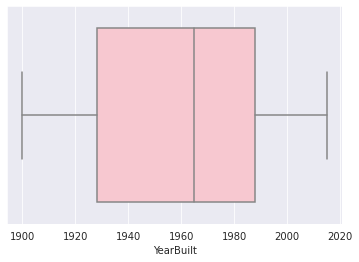

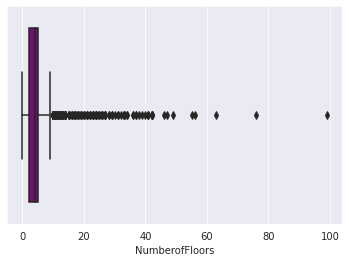

DataYear    BuildingType          PrimaryPropertyType  \
3         2016  NonResidential                        Hotel   
7         2016  NonResidential                        Other   
12        2016  NonResidential                        Hotel   
16        2016  NonResidential                        Other   
18        2016  NonResidential           Mixed Use Property   
...        ...             ...                          ...   
3337      2016  NonResidential                        Hotel   
3338      2016  NonResidential                    Warehouse   
3339      2016  NonResidential  Small- and Mid-Sized Office   
3347      2016  NonResidential                  K-12 School   
3356      2016  NonResidential           Mixed Use Property   

                                PropertyName              Address     City  \
3                                  HOTEL MAX       620 STEWART ST  Seattle   
7                          Paramount Theatre          911 Pine St  Seattle   
12                   Executive Pacific Plaza    400 Spring Street  Seattle   
16                     Downtown Seattle YMCA       909 4th Avenue  Seattle   
18                          The Rainier Club         820 4th Ave.  Seattle   
...                                      ...                  ...      ...   
3337                     Olympic Hospitality    3926 Aurora Ave N  Seattle   
3338  Airport - Maintenance Shop - DOT: KCIA           6518 Ellis  Seattle   
3339                 Airport - Main Terminal   7277 Perimeter Rd.  Seattle   
3347                  Hamlin Robinson School  1701 20th Ave South  Seattle   
3356                                    AIBS  601 Westlake Ave N.  Seattle   

     State  ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  ...  \
3       WA  98101.0                    0659000640                    7  ...   
7       WA  98101.0                    0660000955                    7  ...   
12      WA  98104.0                    0942000210                    7  ...   
16      WA  98104.0                    0942000350                    7  ...   
18      WA  98104.0                    0942000510                    7  ...   
...    ...      ...                           ...                  ...  ...   
3337    WA  98103.0                    1931300480                    4  ...   
3338    WA  98108.0                    2824049007                    2  ...   
3339    WA  98108.0                    2824049007                    2  ...   
3347    WA  98144.0                    7548300840                    3  ...   
3356    WA  98109.0                    4088803385                    7  ...   

     SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
3             6.946800e+06     2214446.250      8.115253e+05   
7             7.067882e+06     2276286.500      1.065843e+06   
12            6.358720e+06     1656352.500      3.936107e+05   
16            1.019212e+07     4592347.500      1.305354e+06   
18            7.877219e+06     1776201.875      1.103397e+06   
...                    ...             ...               ...   
3337          6.042400e+06           0.000      1.206219e+06   
3338          4.182622e+06           0.000      2.147724e+05   
3339          4.731814e+06           0.000      6.351199e+05   
3347          1.397742e+06           0.000      3.886204e+05   
3356          4.107860e+07           0.000      6.927551e+06   

      Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
3             2768924.0        18112.130860         1811213.0        False   
7             3636655.0         3851.890137          385189.0        False   
12            1343000.0        35967.050780         3596705.0        False   
16            4453868.0         9101.799805          910180.0        False   
18            3764791.0        20650.912110         2065091.0        False   
...                 ...                 ...               ...          ...   
3337          4115620.0        19267.791020     

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NumberofFloors


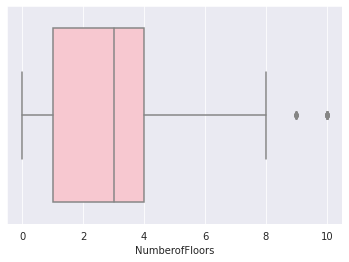

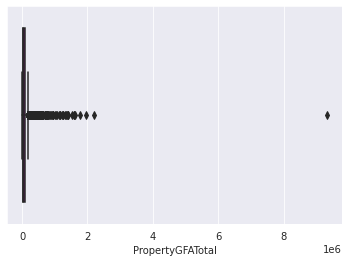

DataYear    BuildingType          PrimaryPropertyType  \
3         2016  NonResidential                        Hotel   
7         2016  NonResidential                        Other   
12        2016  NonResidential                        Hotel   
16        2016  NonResidential                        Other   
18        2016  NonResidential           Mixed Use Property   
...        ...             ...                          ...   
3322      2016  NonResidential                        Other   
3337      2016  NonResidential                        Hotel   
3338      2016  NonResidential                    Warehouse   
3339      2016  NonResidential  Small- and Mid-Sized Office   
3347      2016  NonResidential                  K-12 School   

                                PropertyName                 Address     City  \
3                                  HOTEL MAX          620 STEWART ST  Seattle   
7                          Paramount Theatre             911 Pine St  Seattle   
12                   Executive Pacific Plaza       400 Spring Street  Seattle   
16                     Downtown Seattle YMCA          909 4th Avenue  Seattle   
18                          The Rainier Club            820 4th Ave.  Seattle   
...                                      ...                     ...      ...   
3322      Honda of Seattle/Toyota of Seattle  2005 Airport Way South  Seattle   
3337                     Olympic Hospitality       3926 Aurora Ave N  Seattle   
3338  Airport - Maintenance Shop - DOT: KCIA              6518 Ellis  Seattle   
3339                 Airport - Main Terminal      7277 Perimeter Rd.  Seattle   
3347                  Hamlin Robinson School     1701 20th Ave South  Seattle   

     State  ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  ...  \
3       WA  98101.0                    0659000640                    7  ...   
7       WA  98101.0                    0660000955                    7  ...   
12      WA  98104.0                    0942000210                    7  ...   
16      WA  98104.0                    0942000350                    7  ...   
18      WA  98104.0                    0942000510                    7  ...   
...    ...      ...                           ...                  ...  ...   
3322    WA  98134.0                    7666203255                    2  ...   
3337    WA  98103.0                    1931300480                    4  ...   
3338    WA  98108.0                    2824049007                    2  ...   
3339    WA  98108.0                    2824049007                    2  ...   
3347    WA  98144.0                    7548300840                    3  ...   

     SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
3             6.946800e+06     2214446.250      8.115253e+05   
7             7.067882e+06     2276286.500      1.065843e+06   
12            6.358720e+06     1656352.500      3.936107e+05   
16            1.019212e+07     4592347.500      1.305354e+06   
18            7.877219e+06     1776201.875      1.103397e+06   
...                    ...             ...               ...   
3322          5.298718e+06           0.000      1.099805e+06   
3337          6.042400e+06           0.000      1.206219e+06   
3338          4.182622e+06           0.000      2.147724e+05   
3339          4.731814e+06           0.000      6.351199e+05   
3347          1.397742e+06           0.000      3.886204e+05   

      Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
3             2768924.0        18112.130860         1811213.0        False   
7             3636655.0         3851.890137          385189.0        False   
12            1343000.0        35967.050780         3596705.0        False   
16            4453868.0         9101.799805          910180.0        False   
18            3764791.0        20650.912110         2065091.0        False   
...                 ...                 ...               ...          ...   
3322        

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


PropertyGFATotal


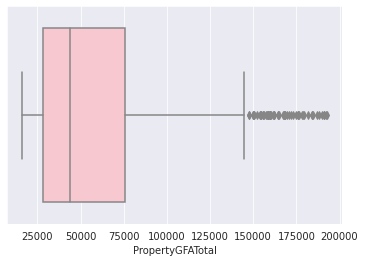

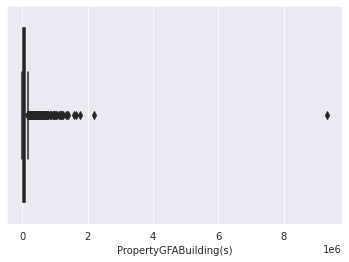

DataYear    BuildingType          PrimaryPropertyType  \
3         2016  NonResidential                        Hotel   
7         2016  NonResidential                        Other   
12        2016  NonResidential                        Hotel   
16        2016  NonResidential                        Other   
18        2016  NonResidential           Mixed Use Property   
...        ...             ...                          ...   
3322      2016  NonResidential                        Other   
3337      2016  NonResidential                        Hotel   
3338      2016  NonResidential                    Warehouse   
3339      2016  NonResidential  Small- and Mid-Sized Office   
3347      2016  NonResidential                  K-12 School   

                                PropertyName                 Address     City  \
3                                  HOTEL MAX          620 STEWART ST  Seattle   
7                          Paramount Theatre             911 Pine St  Seattle   
12                   Executive Pacific Plaza       400 Spring Street  Seattle   
16                     Downtown Seattle YMCA          909 4th Avenue  Seattle   
18                          The Rainier Club            820 4th Ave.  Seattle   
...                                      ...                     ...      ...   
3322      Honda of Seattle/Toyota of Seattle  2005 Airport Way South  Seattle   
3337                     Olympic Hospitality       3926 Aurora Ave N  Seattle   
3338  Airport - Maintenance Shop - DOT: KCIA              6518 Ellis  Seattle   
3339                 Airport - Main Terminal      7277 Perimeter Rd.  Seattle   
3347                  Hamlin Robinson School     1701 20th Ave South  Seattle   

     State  ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  ...  \
3       WA  98101.0                    0659000640                    7  ...   
7       WA  98101.0                    0660000955                    7  ...   
12      WA  98104.0                    0942000210                    7  ...   
16      WA  98104.0                    0942000350                    7  ...   
18      WA  98104.0                    0942000510                    7  ...   
...    ...      ...                           ...                  ...  ...   
3322    WA  98134.0                    7666203255                    2  ...   
3337    WA  98103.0                    1931300480                    4  ...   
3338    WA  98108.0                    2824049007                    2  ...   
3339    WA  98108.0                    2824049007                    2  ...   
3347    WA  98144.0                    7548300840                    3  ...   

     SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
3             6.946800e+06     2214446.250      8.115253e+05   
7             7.067882e+06     2276286.500      1.065843e+06   
12            6.358720e+06     1656352.500      3.936107e+05   
16            1.019212e+07     4592347.500      1.305354e+06   
18            7.877219e+06     1776201.875      1.103397e+06   
...                    ...             ...               ...   
3322          5.298718e+06           0.000      1.099805e+06   
3337          6.042400e+06           0.000      1.206219e+06   
3338          4.182622e+06           0.000      2.147724e+05   
3339          4.731814e+06           0.000      6.351199e+05   
3347          1.397742e+06           0.000      3.886204e+05   

      Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
3             2768924.0        18112.130860         1811213.0        False   
7             3636655.0         3851.890137          385189.0        False   
12            1343000.0        35967.050780         3596705.0        False   
16            4453868.0         9101.799805          910180.0        False   
18            3764791.0        20650.912110         2065091.0        False   
...                 ...                 ...               ...          ...   
3322        

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


PropertyGFABuilding(s)


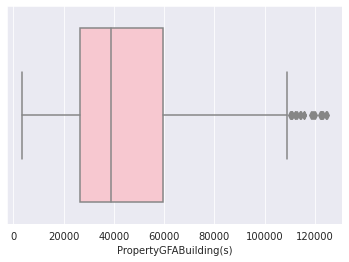

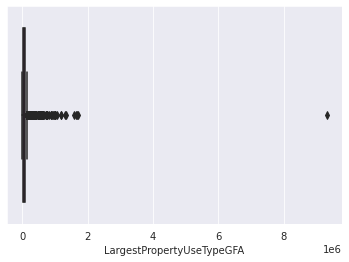

DataYear    BuildingType          PrimaryPropertyType  \
3         2016  NonResidential                        Hotel   
7         2016  NonResidential                        Other   
12        2016  NonResidential                        Hotel   
16        2016  NonResidential                        Other   
18        2016  NonResidential           Mixed Use Property   
...        ...             ...                          ...   
3312      2016  NonResidential  Small- and Mid-Sized Office   
3337      2016  NonResidential                        Hotel   
3338      2016  NonResidential                    Warehouse   
3339      2016  NonResidential  Small- and Mid-Sized Office   
3347      2016  NonResidential                  K-12 School   

                                PropertyName              Address     City  \
3                                  HOTEL MAX       620 STEWART ST  Seattle   
7                          Paramount Theatre          911 Pine St  Seattle   
12                   Executive Pacific Plaza    400 Spring Street  Seattle   
16                     Downtown Seattle YMCA       909 4th Avenue  Seattle   
18                          The Rainier Club         820 4th Ave.  Seattle   
...                                      ...                  ...      ...   
3312                           Chophouse Row        1424 11th Ave  Seattle   
3337                     Olympic Hospitality    3926 Aurora Ave N  Seattle   
3338  Airport - Maintenance Shop - DOT: KCIA           6518 Ellis  Seattle   
3339                 Airport - Main Terminal   7277 Perimeter Rd.  Seattle   
3347                  Hamlin Robinson School  1701 20th Ave South  Seattle   

     State  ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  ...  \
3       WA  98101.0                    0659000640                    7  ...   
7       WA  98101.0                    0660000955                    7  ...   
12      WA  98104.0                    0942000210                    7  ...   
16      WA  98104.0                    0942000350                    7  ...   
18      WA  98104.0                    0942000510                    7  ...   
...    ...      ...                           ...                  ...  ...   
3312    WA  98122.0                    6003500255                    3  ...   
3337    WA  98103.0                    1931300480                    4  ...   
3338    WA  98108.0                    2824049007                    2  ...   
3339    WA  98108.0                    2824049007                    2  ...   
3347    WA  98144.0                    7548300840                    3  ...   

     SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
3             6.946800e+06     2214446.250      8.115253e+05   
7             7.067882e+06     2276286.500      1.065843e+06   
12            6.358720e+06     1656352.500      3.936107e+05   
16            1.019212e+07     4592347.500      1.305354e+06   
18            7.877219e+06     1776201.875      1.103397e+06   
...                    ...             ...               ...   
3312          2.346692e+06           0.000      3.787091e+05   
3337          6.042400e+06           0.000      1.206219e+06   
3338          4.182622e+06           0.000      2.147724e+05   
3339          4.731814e+06           0.000      6.351199e+05   
3347          1.397742e+06           0.000      3.886204e+05   

      Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
3             2768924.0        18112.130860         1811213.0        False   
7             3636655.0         3851.890137          385189.0        False   
12            1343000.0        35967.050780         3596705.0        False   
16            4453868.0         9101.799805          910180.0        False   
18            3764791.0        20650.912110         2065091.0        False   
...                 ...                 ...               ...          ...   
3312          1292155.0        10545.370120     

LargestPropertyUseTypeGFA


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


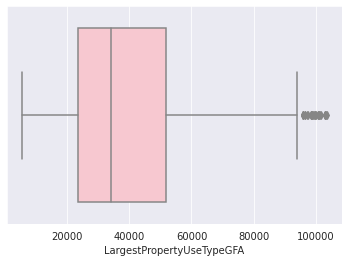

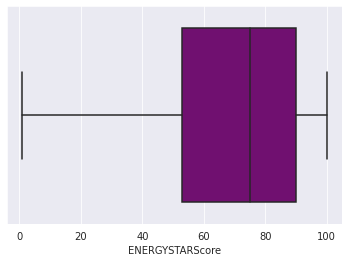

DataYear    BuildingType          PrimaryPropertyType  \
3         2016  NonResidential                        Hotel   
12        2016  NonResidential                        Hotel   
23        2016  NonResidential                        Hotel   
29        2016  NonResidential                        Hotel   
33        2016  NonResidential                        Hotel   
...        ...             ...                          ...   
3280      2016  NonResidential               Residence Hall   
3337      2016  NonResidential                        Hotel   
3338      2016  NonResidential                    Warehouse   
3339      2016  NonResidential  Small- and Mid-Sized Office   
3347      2016  NonResidential                  K-12 School   

                                PropertyName                Address     City  \
3                                  HOTEL MAX         620 STEWART ST  Seattle   
12                   Executive Pacific Plaza      400 Spring Street  Seattle   
23                           WATERTOWN HOTEL  4242 ROOSEVELT WAY NE  Seattle   
29                                Hotel Five           2200 5th ave  Seattle   
33                   Silver Cloud University       5036 25th Ave NE  Seattle   
...                                      ...                    ...      ...   
3280                             Poplar Hall  3715 W Stevens Way NE  Seattle   
3337                     Olympic Hospitality      3926 Aurora Ave N  Seattle   
3338  Airport - Maintenance Shop - DOT: KCIA             6518 Ellis  Seattle   
3339                 Airport - Main Terminal     7277 Perimeter Rd.  Seattle   
3347                  Hamlin Robinson School    1701 20th Ave South  Seattle   

     State  ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  ...  \
3       WA  98101.0                    0659000640                    7  ...   
12      WA  98104.0                    0942000210                    7  ...   
23      WA  98105.0                    1142000755                    4  ...   
29      WA  98121.0                    0697000170                    7  ...   
33      WA  98105.0                    0925049117                    4  ...   
...    ...      ...                           ...                  ...  ...   
3280    WA  98195.0                    1625049001                    4  ...   
3337    WA  98103.0                    1931300480                    4  ...   
3338    WA  98108.0                    2824049007                    2  ...   
3339    WA  98108.0                    2824049007                    2  ...   
3347    WA  98144.0                    7548300840                    3  ...   

     SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
3              6946800.500      2214446.25      8.115253e+05   
12             6358719.500      1656352.50      3.936107e+05   
23             3673186.750            0.00      6.641944e+05   
29             4557974.000            0.00      6.876756e+05   
33             6731281.500            0.00      8.840560e+05   
...                    ...             ...               ...   
3280           4075094.500            0.00      9.172990e+05   
3337           6042399.500            0.00      1.206219e+06   
3338           4182621.750            0.00      2.147724e+05   
3339           4731813.500            0.00      6.351199e+05   
3347           1397742.375            0.00      3.886204e+05   

      Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
3             2768924.0        18112.130860         1811213.0        False   
12            1343000.0        35967.050780         3596705.0        False   
23            2266231.0        13973.030270         1397303.0        False   
29            2346349.0        21103.650390         2110365.0        False   
33            3016399.0        36521.691410         3652169.0        False   
...                 ...                 ...               ...          ...   
3280          3129824.0 

ENERGYSTARScore


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


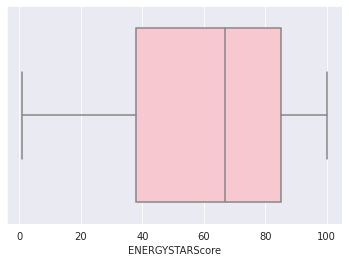

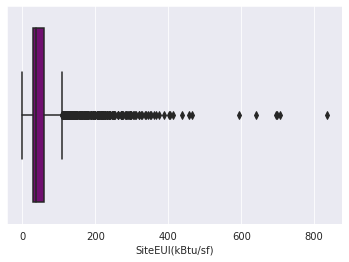

DataYear    BuildingType PrimaryPropertyType  \
3         2016  NonResidential               Hotel   
12        2016  NonResidential               Hotel   
23        2016  NonResidential               Hotel   
29        2016  NonResidential               Hotel   
33        2016  NonResidential               Hotel   
...        ...             ...                 ...   
3279      2016  NonResidential      Residence Hall   
3280      2016  NonResidential      Residence Hall   
3337      2016  NonResidential               Hotel   
3338      2016  NonResidential           Warehouse   
3347      2016  NonResidential         K-12 School   

                                PropertyName                Address     City  \
3                                  HOTEL MAX         620 STEWART ST  Seattle   
12                   Executive Pacific Plaza      400 Spring Street  Seattle   
23                           WATERTOWN HOTEL  4242 ROOSEVELT WAY NE  Seattle   
29                                Hotel Five           2200 5th ave  Seattle   
33                   Silver Cloud University       5036 25th Ave NE  Seattle   
...                                      ...                    ...      ...   
3279                             Mercer Hall     1009 NE Pacific St  Seattle   
3280                             Poplar Hall  3715 W Stevens Way NE  Seattle   
3337                     Olympic Hospitality      3926 Aurora Ave N  Seattle   
3338  Airport - Maintenance Shop - DOT: KCIA             6518 Ellis  Seattle   
3347                  Hamlin Robinson School    1701 20th Ave South  Seattle   

     State  ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  ...  \
3       WA  98101.0                    0659000640                    7  ...   
12      WA  98104.0                    0942000210                    7  ...   
23      WA  98105.0                    1142000755                    4  ...   
29      WA  98121.0                    0697000170                    7  ...   
33      WA  98105.0                    0925049117                    4  ...   
...    ...      ...                           ...                  ...  ...   
3279    WA  98195.0                    1625049001                    4  ...   
3280    WA  98195.0                    1625049001                    4  ...   
3337    WA  98103.0                    1931300480                    4  ...   
3338    WA  98108.0                    2824049007                    2  ...   
3347    WA  98144.0                    7548300840                    3  ...   

     SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
3              6946800.500      2214446.25      8.115253e+05   
12             6358719.500      1656352.50      3.936107e+05   
23             3673186.750            0.00      6.641944e+05   
29             4557974.000            0.00      6.876756e+05   
33             6731281.500            0.00      8.840560e+05   
...                    ...             ...               ...   
3279           7483350.000            0.00      2.040124e+06   
3280           4075094.500            0.00      9.172990e+05   
3337           6042399.500            0.00      1.206219e+06   
3338           4182621.750            0.00      2.147724e+05   
3347           1397742.375            0.00      3.886204e+05   

      Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
3             2768924.0        18112.130860         1811213.0        False   
12            1343000.0        35967.050780         3596705.0        False   
23            2266231.0        13973.030270         1397303.0        False   
29            2346349.0        21103.650390         2110365.0        False   
33            3016399.0        36521.691410         3652169.0        False   
...                 ...                 ...               ...          ...   
3279          6960904.0            0.000000               0.0        False   
3280          3129824.0         7643.180176          7

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


SiteEUI(kBtu/sf)


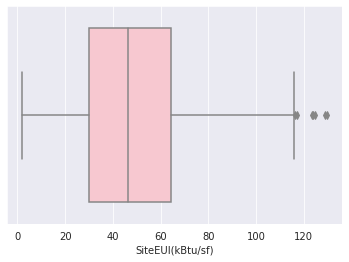

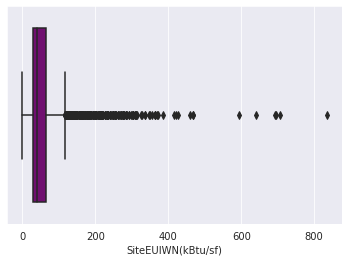

DataYear    BuildingType PrimaryPropertyType  \
3         2016  NonResidential               Hotel   
12        2016  NonResidential               Hotel   
23        2016  NonResidential               Hotel   
29        2016  NonResidential               Hotel   
33        2016  NonResidential               Hotel   
...        ...             ...                 ...   
3279      2016  NonResidential      Residence Hall   
3280      2016  NonResidential      Residence Hall   
3337      2016  NonResidential               Hotel   
3338      2016  NonResidential           Warehouse   
3347      2016  NonResidential         K-12 School   

                                PropertyName                Address     City  \
3                                  HOTEL MAX         620 STEWART ST  Seattle   
12                   Executive Pacific Plaza      400 Spring Street  Seattle   
23                           WATERTOWN HOTEL  4242 ROOSEVELT WAY NE  Seattle   
29                                Hotel Five           2200 5th ave  Seattle   
33                   Silver Cloud University       5036 25th Ave NE  Seattle   
...                                      ...                    ...      ...   
3279                             Mercer Hall     1009 NE Pacific St  Seattle   
3280                             Poplar Hall  3715 W Stevens Way NE  Seattle   
3337                     Olympic Hospitality      3926 Aurora Ave N  Seattle   
3338  Airport - Maintenance Shop - DOT: KCIA             6518 Ellis  Seattle   
3347                  Hamlin Robinson School    1701 20th Ave South  Seattle   

     State  ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  ...  \
3       WA  98101.0                    0659000640                    7  ...   
12      WA  98104.0                    0942000210                    7  ...   
23      WA  98105.0                    1142000755                    4  ...   
29      WA  98121.0                    0697000170                    7  ...   
33      WA  98105.0                    0925049117                    4  ...   
...    ...      ...                           ...                  ...  ...   
3279    WA  98195.0                    1625049001                    4  ...   
3280    WA  98195.0                    1625049001                    4  ...   
3337    WA  98103.0                    1931300480                    4  ...   
3338    WA  98108.0                    2824049007                    2  ...   
3347    WA  98144.0                    7548300840                    3  ...   

     SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
3              6946800.500      2214446.25      8.115253e+05   
12             6358719.500      1656352.50      3.936107e+05   
23             3673186.750            0.00      6.641944e+05   
29             4557974.000            0.00      6.876756e+05   
33             6731281.500            0.00      8.840560e+05   
...                    ...             ...               ...   
3279           7483350.000            0.00      2.040124e+06   
3280           4075094.500            0.00      9.172990e+05   
3337           6042399.500            0.00      1.206219e+06   
3338           4182621.750            0.00      2.147724e+05   
3347           1397742.375            0.00      3.886204e+05   

      Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
3             2768924.0        18112.130860         1811213.0        False   
12            1343000.0        35967.050780         3596705.0        False   
23            2266231.0        13973.030270         1397303.0        False   
29            2346349.0        21103.650390         2110365.0        False   
33            3016399.0        36521.691410         3652169.0        False   
...                 ...                 ...               ...          ...   
3279          6960904.0            0.000000               0.0        False   
3280          3129824.0         7643.180176          7

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


SiteEUIWN(kBtu/sf)


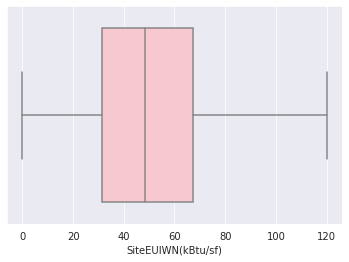

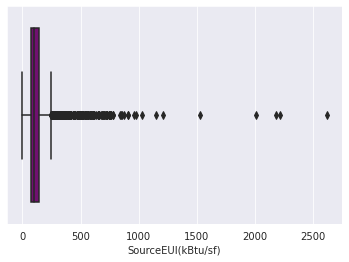

DataYear    BuildingType PrimaryPropertyType  \
3         2016  NonResidential               Hotel   
12        2016  NonResidential               Hotel   
23        2016  NonResidential               Hotel   
29        2016  NonResidential               Hotel   
33        2016  NonResidential               Hotel   
...        ...             ...                 ...   
3279      2016  NonResidential      Residence Hall   
3280      2016  NonResidential      Residence Hall   
3337      2016  NonResidential               Hotel   
3338      2016  NonResidential           Warehouse   
3347      2016  NonResidential         K-12 School   

                                PropertyName                Address     City  \
3                                  HOTEL MAX         620 STEWART ST  Seattle   
12                   Executive Pacific Plaza      400 Spring Street  Seattle   
23                           WATERTOWN HOTEL  4242 ROOSEVELT WAY NE  Seattle   
29                                Hotel Five           2200 5th ave  Seattle   
33                   Silver Cloud University       5036 25th Ave NE  Seattle   
...                                      ...                    ...      ...   
3279                             Mercer Hall     1009 NE Pacific St  Seattle   
3280                             Poplar Hall  3715 W Stevens Way NE  Seattle   
3337                     Olympic Hospitality      3926 Aurora Ave N  Seattle   
3338  Airport - Maintenance Shop - DOT: KCIA             6518 Ellis  Seattle   
3347                  Hamlin Robinson School    1701 20th Ave South  Seattle   

     State  ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  ...  \
3       WA  98101.0                    0659000640                    7  ...   
12      WA  98104.0                    0942000210                    7  ...   
23      WA  98105.0                    1142000755                    4  ...   
29      WA  98121.0                    0697000170                    7  ...   
33      WA  98105.0                    0925049117                    4  ...   
...    ...      ...                           ...                  ...  ...   
3279    WA  98195.0                    1625049001                    4  ...   
3280    WA  98195.0                    1625049001                    4  ...   
3337    WA  98103.0                    1931300480                    4  ...   
3338    WA  98108.0                    2824049007                    2  ...   
3347    WA  98144.0                    7548300840                    3  ...   

     SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
3              6946800.500      2214446.25      8.115253e+05   
12             6358719.500      1656352.50      3.936107e+05   
23             3673186.750            0.00      6.641944e+05   
29             4557974.000            0.00      6.876756e+05   
33             6731281.500            0.00      8.840560e+05   
...                    ...             ...               ...   
3279           7483350.000            0.00      2.040124e+06   
3280           4075094.500            0.00      9.172990e+05   
3337           6042399.500            0.00      1.206219e+06   
3338           4182621.750            0.00      2.147724e+05   
3347           1397742.375            0.00      3.886204e+05   

      Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
3             2768924.0        18112.130860         1811213.0        False   
12            1343000.0        35967.050780         3596705.0        False   
23            2266231.0        13973.030270         1397303.0        False   
29            2346349.0        21103.650390         2110365.0        False   
33            3016399.0        36521.691410         3652169.0        False   
...                 ...                 ...               ...          ...   
3279          6960904.0            0.000000               0.0        False   
3280          3129824.0         7643.180176          7

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


SourceEUI(kBtu/sf)


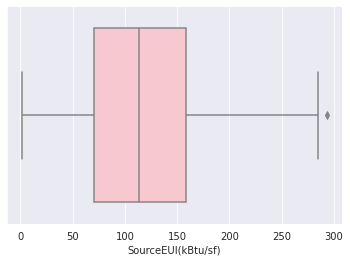

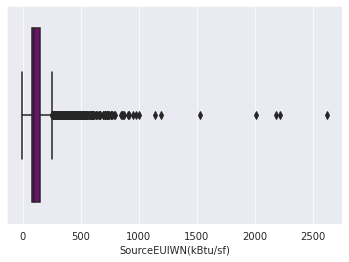

DataYear    BuildingType PrimaryPropertyType  \
3         2016  NonResidential               Hotel   
12        2016  NonResidential               Hotel   
23        2016  NonResidential               Hotel   
29        2016  NonResidential               Hotel   
33        2016  NonResidential               Hotel   
...        ...             ...                 ...   
3279      2016  NonResidential      Residence Hall   
3280      2016  NonResidential      Residence Hall   
3337      2016  NonResidential               Hotel   
3338      2016  NonResidential           Warehouse   
3347      2016  NonResidential         K-12 School   

                                PropertyName                Address     City  \
3                                  HOTEL MAX         620 STEWART ST  Seattle   
12                   Executive Pacific Plaza      400 Spring Street  Seattle   
23                           WATERTOWN HOTEL  4242 ROOSEVELT WAY NE  Seattle   
29                                Hotel Five           2200 5th ave  Seattle   
33                   Silver Cloud University       5036 25th Ave NE  Seattle   
...                                      ...                    ...      ...   
3279                             Mercer Hall     1009 NE Pacific St  Seattle   
3280                             Poplar Hall  3715 W Stevens Way NE  Seattle   
3337                     Olympic Hospitality      3926 Aurora Ave N  Seattle   
3338  Airport - Maintenance Shop - DOT: KCIA             6518 Ellis  Seattle   
3347                  Hamlin Robinson School    1701 20th Ave South  Seattle   

     State  ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  ...  \
3       WA  98101.0                    0659000640                    7  ...   
12      WA  98104.0                    0942000210                    7  ...   
23      WA  98105.0                    1142000755                    4  ...   
29      WA  98121.0                    0697000170                    7  ...   
33      WA  98105.0                    0925049117                    4  ...   
...    ...      ...                           ...                  ...  ...   
3279    WA  98195.0                    1625049001                    4  ...   
3280    WA  98195.0                    1625049001                    4  ...   
3337    WA  98103.0                    1931300480                    4  ...   
3338    WA  98108.0                    2824049007                    2  ...   
3347    WA  98144.0                    7548300840                    3  ...   

     SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
3              6946800.500      2214446.25      8.115253e+05   
12             6358719.500      1656352.50      3.936107e+05   
23             3673186.750            0.00      6.641944e+05   
29             4557974.000            0.00      6.876756e+05   
33             6731281.500            0.00      8.840560e+05   
...                    ...             ...               ...   
3279           7483350.000            0.00      2.040124e+06   
3280           4075094.500            0.00      9.172990e+05   
3337           6042399.500            0.00      1.206219e+06   
3338           4182621.750            0.00      2.147724e+05   
3347           1397742.375            0.00      3.886204e+05   

      Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
3             2768924.0        18112.130860         1811213.0        False   
12            1343000.0        35967.050780         3596705.0        False   
23            2266231.0        13973.030270         1397303.0        False   
29            2346349.0        21103.650390         2110365.0        False   
33            3016399.0        36521.691410         3652169.0        False   
...                 ...                 ...               ...          ...   
3279          6960904.0            0.000000               0.0        False   
3280          3129824.0         7643.180176          7

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


SourceEUIWN(kBtu/sf)


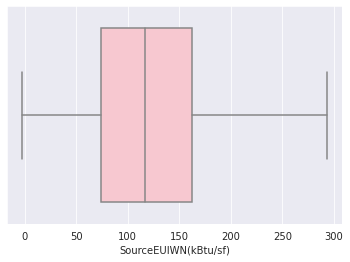

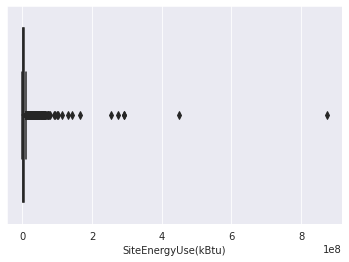

DataYear    BuildingType          PrimaryPropertyType  \
23        2016  NonResidential                        Hotel   
29        2016  NonResidential                        Hotel   
40        2016  NonResidential  Small- and Mid-Sized Office   
50        2016  NonResidential                        Hotel   
51        2016  NonResidential                        Hotel   
...        ...             ...                          ...   
3230      2016  NonResidential                  K-12 School   
3280      2016  NonResidential               Residence Hall   
3337      2016  NonResidential                        Hotel   
3338      2016  NonResidential                    Warehouse   
3347      2016  NonResidential                  K-12 School   

                                PropertyName                Address     City  \
23                           WATERTOWN HOTEL  4242 ROOSEVELT WAY NE  Seattle   
29                                Hotel Five           2200 5th ave  Seattle   
40                      El Centro de la Raza        2524 16th Ave S  Seattle   
50                         Inn at the Market             86 Pine St  Seattle   
51                           Moore Hotel INC           1926 2nd Ave  Seattle   
...                                      ...                    ...      ...   
3230            Paul G Allen Athletic Center       14050 1st Ave NE  Seattle   
3280                             Poplar Hall  3715 W Stevens Way NE  Seattle   
3337                     Olympic Hospitality      3926 Aurora Ave N  Seattle   
3338  Airport - Maintenance Shop - DOT: KCIA             6518 Ellis  Seattle   
3347                  Hamlin Robinson School    1701 20th Ave South  Seattle   

     State  ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  ...  \
23      WA  98105.0                    1142000755                    4  ...   
29      WA  98121.0                    0697000170                    7  ...   
40      WA  98144.0                    0570000340                    2  ...   
50      WA  98101.0                    1977200050                    7  ...   
51      WA  98101.0                    1977201035                    7  ...   
...    ...      ...                           ...                  ...  ...   
3230    WA  98125.0                    2832100190                    5  ...   
3280    WA  98195.0                    1625049001                    4  ...   
3337    WA  98103.0                    1931300480                    4  ...   
3338    WA  98108.0                    2824049007                    2  ...   
3347    WA  98144.0                    7548300840                    3  ...   

     SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
23             3673186.750             0.0      6.641944e+05   
29             4557974.000             0.0      6.876756e+05   
40             3150635.500             0.0      4.629980e+05   
50             5348309.000             0.0      9.507328e+05   
51             6088417.500             0.0      3.791211e+05   
...                    ...             ...               ...   
3230           1695022.250             0.0      4.057393e+05   
3280           4075094.500             0.0      9.172990e+05   
3337           6042399.500             0.0      1.206219e+06   
3338           4182621.750             0.0      2.147724e+05   
3347           1397742.375             0.0      3.886204e+05   

      Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
23            2266231.0        13973.030270         1397303.0        False   
29            2346349.0        21103.650390         2110365.0        False   
40            1579749.0        13715.820310         1371582.0        False   
50            3243900.0        21044.080080         2104408.0        False   
51            1293561.0        41077.160160         4107716.0        False   
...                 ...                 ...               ...          ...   
3230          1384383.0 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


SiteEnergyUse(kBtu)


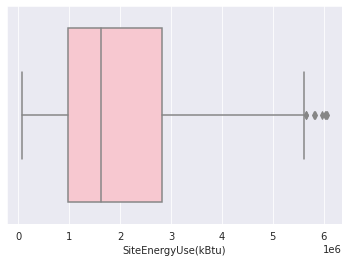

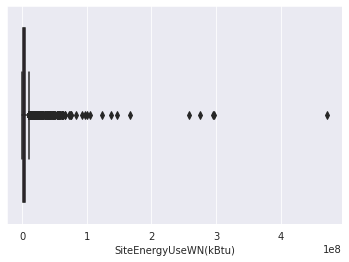

DataYear    BuildingType          PrimaryPropertyType  \
23        2016  NonResidential                        Hotel   
29        2016  NonResidential                        Hotel   
40        2016  NonResidential  Small- and Mid-Sized Office   
50        2016  NonResidential                        Hotel   
52        2016  NonResidential                        Hotel   
...        ...             ...                          ...   
3218      2016  NonResidential  Small- and Mid-Sized Office   
3230      2016  NonResidential                  K-12 School   
3280      2016  NonResidential               Residence Hall   
3338      2016  NonResidential                    Warehouse   
3347      2016  NonResidential                  K-12 School   

                                         PropertyName  \
23                                    WATERTOWN HOTEL   
29                                         Hotel Five   
40                               El Centro de la Raza   
50                                  Inn at the Market   
52                                        QUALITY INN   
...                                               ...   
3218  Seattle Goodwill Job Training/ Education Center   
3230                     Paul G Allen Athletic Center   
3280                                      Poplar Hall   
3338           Airport - Maintenance Shop - DOT: KCIA   
3347                           Hamlin Robinson School   

                       Address     City State  ZipCode  \
23       4242 ROOSEVELT WAY NE  Seattle    WA  98105.0   
29                2200 5th ave  Seattle    WA  98121.0   
40             2524 16th Ave S  Seattle    WA  98144.0   
50                  86 Pine St  Seattle    WA  98101.0   
52                 618 JOHN ST  Seattle    WA  98109.0   
...                        ...      ...   ...      ...   
3218  700 Dearborn Place South  Seattle    WA  98144.0   
3230          14050 1st Ave NE  Seattle    WA  98125.0   
3280     3715 W Stevens Way NE  Seattle    WA  98195.0   
3338                6518 Ellis  Seattle    WA  98108.0   
3347       1701 20th Ave South  Seattle    WA  98144.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode  ...  \
23                      1142000755                    4  ...   
29                      0697000170                    7  ...   
40                      0570000340                    2  ...   
50                      1977200050                    7  ...   
52                      1991200730                    7  ...   
...                            ...                  ...  ...   
3218                    7134300080                    3  ...   
3230                    2832100190                    5  ...   
3280                    1625049001                    4  ...   
3338                    2824049007                    2  ...   
3347                    7548300840                    3  ...   

     SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
23             3673186.750             0.0       664194.3750   
29             4557974.000             0.0       687675.6250   
40             3150635.500             0.0       462998.0000   
50             5348309.000             0.0       950732.8125   
52             5428403.500             0.0       863036.3125   
...                    ...             ...               ...   
3218           2626698.250             0.0       716470.8750   
3230           1695022.250             0.0       405739.3125   
3280           4075094.500             0.0       917299.0000   
3338           4182621.750             0.0       214772.4063   
3347           1397742.375             0.0       388620.4063   

      Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
23            2266231.0        13973.030270         1397303.0        False   
29            2346349.0        21103.650390         2110365.0        False   
40            1579749.0        13715.820310         1371582.0        False   
50            324

SiteEnergyUseWN(kBtu)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


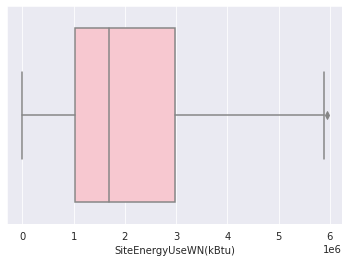

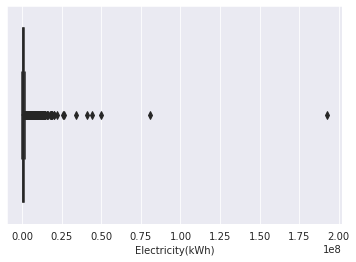

DataYear    BuildingType          PrimaryPropertyType  \
23        2016  NonResidential                        Hotel   
29        2016  NonResidential                        Hotel   
40        2016  NonResidential  Small- and Mid-Sized Office   
50        2016  NonResidential                        Hotel   
52        2016  NonResidential                        Hotel   
...        ...             ...                          ...   
3218      2016  NonResidential  Small- and Mid-Sized Office   
3230      2016  NonResidential                  K-12 School   
3280      2016  NonResidential               Residence Hall   
3338      2016  NonResidential                    Warehouse   
3347      2016  NonResidential                  K-12 School   

                                         PropertyName  \
23                                    WATERTOWN HOTEL   
29                                         Hotel Five   
40                               El Centro de la Raza   
50                                  Inn at the Market   
52                                        QUALITY INN   
...                                               ...   
3218  Seattle Goodwill Job Training/ Education Center   
3230                     Paul G Allen Athletic Center   
3280                                      Poplar Hall   
3338           Airport - Maintenance Shop - DOT: KCIA   
3347                           Hamlin Robinson School   

                       Address     City State  ZipCode  \
23       4242 ROOSEVELT WAY NE  Seattle    WA  98105.0   
29                2200 5th ave  Seattle    WA  98121.0   
40             2524 16th Ave S  Seattle    WA  98144.0   
50                  86 Pine St  Seattle    WA  98101.0   
52                 618 JOHN ST  Seattle    WA  98109.0   
...                        ...      ...   ...      ...   
3218  700 Dearborn Place South  Seattle    WA  98144.0   
3230          14050 1st Ave NE  Seattle    WA  98125.0   
3280     3715 W Stevens Way NE  Seattle    WA  98195.0   
3338                6518 Ellis  Seattle    WA  98108.0   
3347       1701 20th Ave South  Seattle    WA  98144.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode  ...  \
23                      1142000755                    4  ...   
29                      0697000170                    7  ...   
40                      0570000340                    2  ...   
50                      1977200050                    7  ...   
52                      1991200730                    7  ...   
...                            ...                  ...  ...   
3218                    7134300080                    3  ...   
3230                    2832100190                    5  ...   
3280                    1625049001                    4  ...   
3338                    2824049007                    2  ...   
3347                    7548300840                    3  ...   

     SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
23             3673186.750             0.0       664194.3750   
29             4557974.000             0.0       687675.6250   
40             3150635.500             0.0       462998.0000   
50             5348309.000             0.0       950732.8125   
52             5428403.500             0.0       863036.3125   
...                    ...             ...               ...   
3218           2626698.250             0.0       716470.8750   
3230           1695022.250             0.0       405739.3125   
3280           4075094.500             0.0       917299.0000   
3338           4182621.750             0.0       214772.4063   
3347           1397742.375             0.0       388620.4063   

      Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
23            2266231.0        13973.030270         1397303.0        False   
29            2346349.0        21103.650390         2110365.0        False   
40            1579749.0        13715.820310         1371582.0        False   
50            324

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Electricity(kWh)


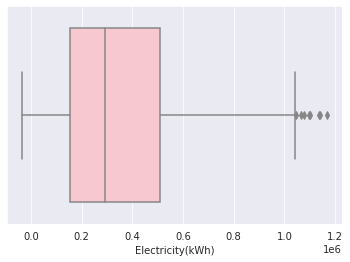

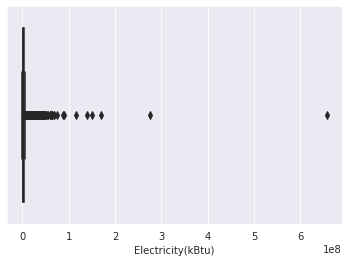

DataYear    BuildingType          PrimaryPropertyType  \
23        2016  NonResidential                        Hotel   
29        2016  NonResidential                        Hotel   
40        2016  NonResidential  Small- and Mid-Sized Office   
50        2016  NonResidential                        Hotel   
52        2016  NonResidential                        Hotel   
...        ...             ...                          ...   
3218      2016  NonResidential  Small- and Mid-Sized Office   
3230      2016  NonResidential                  K-12 School   
3280      2016  NonResidential               Residence Hall   
3338      2016  NonResidential                    Warehouse   
3347      2016  NonResidential                  K-12 School   

                                         PropertyName  \
23                                    WATERTOWN HOTEL   
29                                         Hotel Five   
40                               El Centro de la Raza   
50                                  Inn at the Market   
52                                        QUALITY INN   
...                                               ...   
3218  Seattle Goodwill Job Training/ Education Center   
3230                     Paul G Allen Athletic Center   
3280                                      Poplar Hall   
3338           Airport - Maintenance Shop - DOT: KCIA   
3347                           Hamlin Robinson School   

                       Address     City State  ZipCode  \
23       4242 ROOSEVELT WAY NE  Seattle    WA  98105.0   
29                2200 5th ave  Seattle    WA  98121.0   
40             2524 16th Ave S  Seattle    WA  98144.0   
50                  86 Pine St  Seattle    WA  98101.0   
52                 618 JOHN ST  Seattle    WA  98109.0   
...                        ...      ...   ...      ...   
3218  700 Dearborn Place South  Seattle    WA  98144.0   
3230          14050 1st Ave NE  Seattle    WA  98125.0   
3280     3715 W Stevens Way NE  Seattle    WA  98195.0   
3338                6518 Ellis  Seattle    WA  98108.0   
3347       1701 20th Ave South  Seattle    WA  98144.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode  ...  \
23                      1142000755                    4  ...   
29                      0697000170                    7  ...   
40                      0570000340                    2  ...   
50                      1977200050                    7  ...   
52                      1991200730                    7  ...   
...                            ...                  ...  ...   
3218                    7134300080                    3  ...   
3230                    2832100190                    5  ...   
3280                    1625049001                    4  ...   
3338                    2824049007                    2  ...   
3347                    7548300840                    3  ...   

     SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
23             3673186.750             0.0       664194.3750   
29             4557974.000             0.0       687675.6250   
40             3150635.500             0.0       462998.0000   
50             5348309.000             0.0       950732.8125   
52             5428403.500             0.0       863036.3125   
...                    ...             ...               ...   
3218           2626698.250             0.0       716470.8750   
3230           1695022.250             0.0       405739.3125   
3280           4075094.500             0.0       917299.0000   
3338           4182621.750             0.0       214772.4063   
3347           1397742.375             0.0       388620.4063   

      Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
23            2266231.0        13973.030270         1397303.0        False   
29            2346349.0        21103.650390         2110365.0        False   
40            1579749.0        13715.820310         1371582.0        False   
50            324

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Electricity(kBtu)


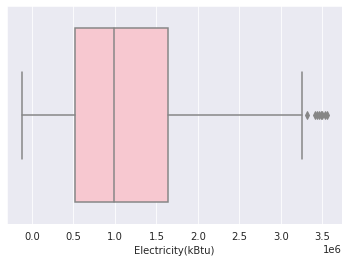

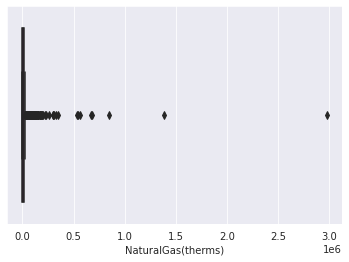

DataYear    BuildingType          PrimaryPropertyType  \
23        2016  NonResidential                        Hotel   
40        2016  NonResidential  Small- and Mid-Sized Office   
58        2016  NonResidential  Small- and Mid-Sized Office   
61        2016  NonResidential                        Hotel   
66        2016  NonResidential                 Retail Store   
...        ...             ...                          ...   
3214      2016  NonResidential                  K-12 School   
3218      2016  NonResidential  Small- and Mid-Sized Office   
3230      2016  NonResidential                  K-12 School   
3280      2016  NonResidential               Residence Hall   
3347      2016  NonResidential                  K-12 School   

                                         PropertyName  \
23                                    WATERTOWN HOTEL   
40                               El Centro de la Raza   
58                   Dept of Social & Health Services   
61                              SCCA - ALLIANCE HOUSE   
66                             Firestone Store#012432   
...                                               ...   
3214                         The Northwest School 401   
3218  Seattle Goodwill Job Training/ Education Center   
3230                     Paul G Allen Athletic Center   
3280                                      Poplar Hall   
3347                           Hamlin Robinson School   

                       Address     City State  ZipCode  \
23       4242 ROOSEVELT WAY NE  Seattle    WA  98105.0   
40             2524 16th Ave S  Seattle    WA  98144.0   
58           1700 E. Cherry St  Seattle    WA  98122.0   
61           207 Pontius Ave N  Seattle    WA  98109.0   
66          400 Westlake Ave N  Seattle    WA  98109.0   
...                        ...      ...   ...      ...   
3214                  401 Pike  Seattle    WA  98122.0   
3218  700 Dearborn Place South  Seattle    WA  98144.0   
3230          14050 1st Ave NE  Seattle    WA  98125.0   
3280     3715 W Stevens Way NE  Seattle    WA  98195.0   
3347       1701 20th Ave South  Seattle    WA  98144.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode  ...  \
23                      1142000755                    4  ...   
40                      0570000340                    2  ...   
58                      2254501944                    3  ...   
61                      2467400430                    7  ...   
66                      1983200230                    7  ...   
...                            ...                  ...  ...   
3214                    8725600410                    3  ...   
3218                    7134300080                    3  ...   
3230                    2832100190                    5  ...   
3280                    1625049001                    4  ...   
3347                    7548300840                    3  ...   

     SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
23             3673186.750             0.0       664194.3750   
40             3150635.500             0.0       462998.0000   
58             3630147.250             0.0       579786.0000   
61             3787499.000             0.0       824351.6250   
66             1243027.750             0.0       106038.5000   
...                    ...             ...               ...   
3214           2962615.250             0.0       654810.6250   
3218           2626698.250             0.0       716470.8750   
3230           1695022.250             0.0       405739.3125   
3280           4075094.500             0.0       917299.0000   
3347           1397742.375             0.0       388620.4063   

      Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
23            2266231.0        13973.030270         1397303.0        False   
40            1579749.0        13715.820310         1371582.0        False   
58            1978230.0        13969.809570         1396981.0        False   
61            281

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NaturalGas(therms)


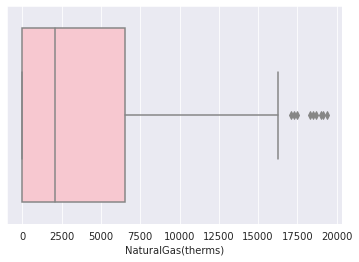

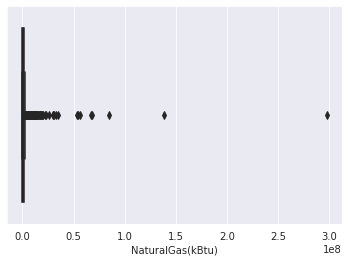

DataYear    BuildingType          PrimaryPropertyType  \
23        2016  NonResidential                        Hotel   
40        2016  NonResidential  Small- and Mid-Sized Office   
58        2016  NonResidential  Small- and Mid-Sized Office   
61        2016  NonResidential                        Hotel   
66        2016  NonResidential                 Retail Store   
...        ...             ...                          ...   
3214      2016  NonResidential                  K-12 School   
3218      2016  NonResidential  Small- and Mid-Sized Office   
3230      2016  NonResidential                  K-12 School   
3280      2016  NonResidential               Residence Hall   
3347      2016  NonResidential                  K-12 School   

                                         PropertyName  \
23                                    WATERTOWN HOTEL   
40                               El Centro de la Raza   
58                   Dept of Social & Health Services   
61                              SCCA - ALLIANCE HOUSE   
66                             Firestone Store#012432   
...                                               ...   
3214                         The Northwest School 401   
3218  Seattle Goodwill Job Training/ Education Center   
3230                     Paul G Allen Athletic Center   
3280                                      Poplar Hall   
3347                           Hamlin Robinson School   

                       Address     City State  ZipCode  \
23       4242 ROOSEVELT WAY NE  Seattle    WA  98105.0   
40             2524 16th Ave S  Seattle    WA  98144.0   
58           1700 E. Cherry St  Seattle    WA  98122.0   
61           207 Pontius Ave N  Seattle    WA  98109.0   
66          400 Westlake Ave N  Seattle    WA  98109.0   
...                        ...      ...   ...      ...   
3214                  401 Pike  Seattle    WA  98122.0   
3218  700 Dearborn Place South  Seattle    WA  98144.0   
3230          14050 1st Ave NE  Seattle    WA  98125.0   
3280     3715 W Stevens Way NE  Seattle    WA  98195.0   
3347       1701 20th Ave South  Seattle    WA  98144.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode  ...  \
23                      1142000755                    4  ...   
40                      0570000340                    2  ...   
58                      2254501944                    3  ...   
61                      2467400430                    7  ...   
66                      1983200230                    7  ...   
...                            ...                  ...  ...   
3214                    8725600410                    3  ...   
3218                    7134300080                    3  ...   
3230                    2832100190                    5  ...   
3280                    1625049001                    4  ...   
3347                    7548300840                    3  ...   

     SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
23             3673186.750             0.0       664194.3750   
40             3150635.500             0.0       462998.0000   
58             3630147.250             0.0       579786.0000   
61             3787499.000             0.0       824351.6250   
66             1243027.750             0.0       106038.5000   
...                    ...             ...               ...   
3214           2962615.250             0.0       654810.6250   
3218           2626698.250             0.0       716470.8750   
3230           1695022.250             0.0       405739.3125   
3280           4075094.500             0.0       917299.0000   
3347           1397742.375             0.0       388620.4063   

      Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
23            2266231.0        13973.030270         1397303.0        False   
40            1579749.0        13715.820310         1371582.0        False   
58            1978230.0        13969.809570         1396981.0        False   
61            281

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NaturalGas(kBtu)


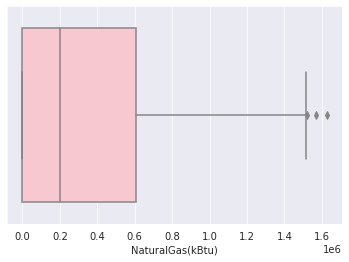

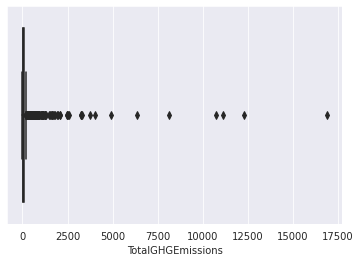

DataYear    BuildingType          PrimaryPropertyType  \
23        2016  NonResidential                        Hotel   
40        2016  NonResidential  Small- and Mid-Sized Office   
58        2016  NonResidential  Small- and Mid-Sized Office   
61        2016  NonResidential                        Hotel   
66        2016  NonResidential                 Retail Store   
...        ...             ...                          ...   
3214      2016  NonResidential                  K-12 School   
3218      2016  NonResidential  Small- and Mid-Sized Office   
3230      2016  NonResidential                  K-12 School   
3280      2016  NonResidential               Residence Hall   
3347      2016  NonResidential                  K-12 School   

                                         PropertyName  \
23                                    WATERTOWN HOTEL   
40                               El Centro de la Raza   
58                   Dept of Social & Health Services   
61                              SCCA - ALLIANCE HOUSE   
66                             Firestone Store#012432   
...                                               ...   
3214                         The Northwest School 401   
3218  Seattle Goodwill Job Training/ Education Center   
3230                     Paul G Allen Athletic Center   
3280                                      Poplar Hall   
3347                           Hamlin Robinson School   

                       Address     City State  ZipCode  \
23       4242 ROOSEVELT WAY NE  Seattle    WA  98105.0   
40             2524 16th Ave S  Seattle    WA  98144.0   
58           1700 E. Cherry St  Seattle    WA  98122.0   
61           207 Pontius Ave N  Seattle    WA  98109.0   
66          400 Westlake Ave N  Seattle    WA  98109.0   
...                        ...      ...   ...      ...   
3214                  401 Pike  Seattle    WA  98122.0   
3218  700 Dearborn Place South  Seattle    WA  98144.0   
3230          14050 1st Ave NE  Seattle    WA  98125.0   
3280     3715 W Stevens Way NE  Seattle    WA  98195.0   
3347       1701 20th Ave South  Seattle    WA  98144.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode  ...  \
23                      1142000755                    4  ...   
40                      0570000340                    2  ...   
58                      2254501944                    3  ...   
61                      2467400430                    7  ...   
66                      1983200230                    7  ...   
...                            ...                  ...  ...   
3214                    8725600410                    3  ...   
3218                    7134300080                    3  ...   
3230                    2832100190                    5  ...   
3280                    1625049001                    4  ...   
3347                    7548300840                    3  ...   

     SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
23             3673186.750             0.0       664194.3750   
40             3150635.500             0.0       462998.0000   
58             3630147.250             0.0       579786.0000   
61             3787499.000             0.0       824351.6250   
66             1243027.750             0.0       106038.5000   
...                    ...             ...               ...   
3214           2962615.250             0.0       654810.6250   
3218           2626698.250             0.0       716470.8750   
3230           1695022.250             0.0       405739.3125   
3280           4075094.500             0.0       917299.0000   
3347           1397742.375             0.0       388620.4063   

      Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
23            2266231.0        13973.030270         1397303.0        False   
40            1579749.0        13715.820310         1371582.0        False   
58            1978230.0        13969.809570         1396981.0        False   
61            281

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TotalGHGEmissions


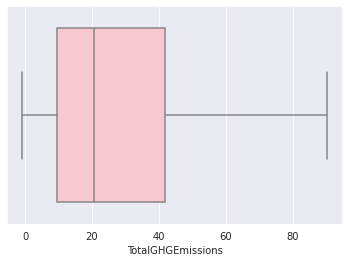

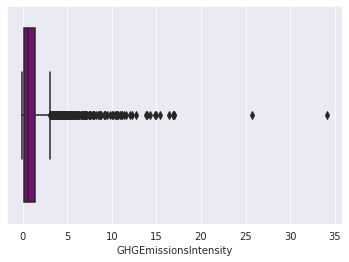

DataYear    BuildingType          PrimaryPropertyType  \
23        2016  NonResidential                        Hotel   
40        2016  NonResidential  Small- and Mid-Sized Office   
58        2016  NonResidential  Small- and Mid-Sized Office   
61        2016  NonResidential                        Hotel   
66        2016  NonResidential                 Retail Store   
...        ...             ...                          ...   
3214      2016  NonResidential                  K-12 School   
3218      2016  NonResidential  Small- and Mid-Sized Office   
3230      2016  NonResidential                  K-12 School   
3280      2016  NonResidential               Residence Hall   
3347      2016  NonResidential                  K-12 School   

                                         PropertyName  \
23                                    WATERTOWN HOTEL   
40                               El Centro de la Raza   
58                   Dept of Social & Health Services   
61                              SCCA - ALLIANCE HOUSE   
66                             Firestone Store#012432   
...                                               ...   
3214                         The Northwest School 401   
3218  Seattle Goodwill Job Training/ Education Center   
3230                     Paul G Allen Athletic Center   
3280                                      Poplar Hall   
3347                           Hamlin Robinson School   

                       Address     City State  ZipCode  \
23       4242 ROOSEVELT WAY NE  Seattle    WA  98105.0   
40             2524 16th Ave S  Seattle    WA  98144.0   
58           1700 E. Cherry St  Seattle    WA  98122.0   
61           207 Pontius Ave N  Seattle    WA  98109.0   
66          400 Westlake Ave N  Seattle    WA  98109.0   
...                        ...      ...   ...      ...   
3214                  401 Pike  Seattle    WA  98122.0   
3218  700 Dearborn Place South  Seattle    WA  98144.0   
3230          14050 1st Ave NE  Seattle    WA  98125.0   
3280     3715 W Stevens Way NE  Seattle    WA  98195.0   
3347       1701 20th Ave South  Seattle    WA  98144.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode  ...  \
23                      1142000755                    4  ...   
40                      0570000340                    2  ...   
58                      2254501944                    3  ...   
61                      2467400430                    7  ...   
66                      1983200230                    7  ...   
...                            ...                  ...  ...   
3214                    8725600410                    3  ...   
3218                    7134300080                    3  ...   
3230                    2832100190                    5  ...   
3280                    1625049001                    4  ...   
3347                    7548300840                    3  ...   

     SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
23             3673186.750             0.0       664194.3750   
40             3150635.500             0.0       462998.0000   
58             3630147.250             0.0       579786.0000   
61             3787499.000             0.0       824351.6250   
66             1243027.750             0.0       106038.5000   
...                    ...             ...               ...   
3214           2962615.250             0.0       654810.6250   
3218           2626698.250             0.0       716470.8750   
3230           1695022.250             0.0       405739.3125   
3280           4075094.500             0.0       917299.0000   
3347           1397742.375             0.0       388620.4063   

      Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
23            2266231.0        13973.030270         1397303.0        False   
40            1579749.0        13715.820310         1371582.0        False   
58            1978230.0        13969.809570         1396981.0        False   
61            281

GHGEmissionsIntensity


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


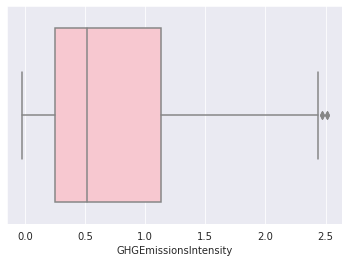

In [104]:
for i in final_df2.columns:
  if final_df2[i].dtype == 'int' or final_df2[i].dtype == 'float':
    if len(final_df2[i].unique()) > 30:
      sns.set_style('darkgrid')
      sns.boxplot(x = i, data = df2, color = 'purple')
      plt.show()
      final_df2 = remove_outlier(final_df2, i)
      sns.boxplot(i, data = final_df2, color = 'pink')
      print(i)
      plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


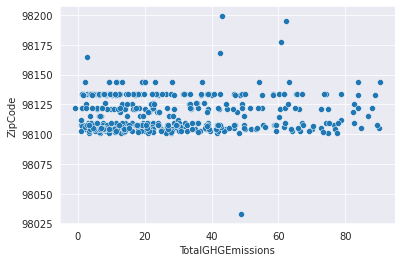

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


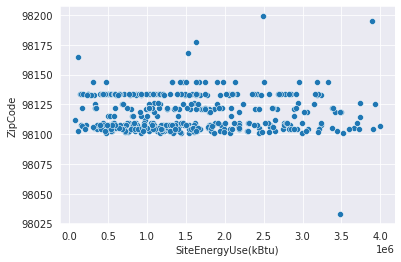

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


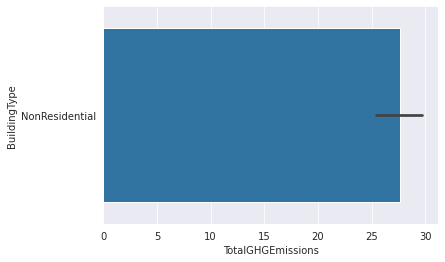

In [105]:
sns.scatterplot(final_df2.TotalGHGEmissions, final_df2.ZipCode)
plt.show();
sns.scatterplot(final_df2['SiteEnergyUse(kBtu)'], final_df2['ZipCode'])
plt.show();
sns.barplot(final_df2['TotalGHGEmissions'], final_df2['BuildingType'])
plt.show();

In [106]:
for i in final_df2.columns:
  if final_df2[i].dtype == 'object':
    print(i ,final_df2[i].unique(),len(final_df2[i].unique()) )

BuildingType ['NonResidential'] 1
PrimaryPropertyType ['Hotel' 'Small- and Mid-Sized Office' 'Retail Store' 'K-12 School'
 'Other' 'Warehouse' 'Worship Facility' 'Large Office'
 'Mixed Use Property' 'Distribution Center' 'Refrigerated Warehouse'
 'Low-Rise Multifamily' 'Medical Office' 'Residence Hall'
 'Senior Care Community'] 15
PropertyName ['WATERTOWN HOTEL' 'El Centro de la Raza'
 'Dept of Social & Health Services' 'SCCA - ALLIANCE HOUSE'
 'Firestone Store#012432' 'J.G. Scripps Building' 'St. Joseph K-8 School'
 '7066-Seattle-Northgate' 'Emerald Services' 'Verity Credit Union'
 'Westwood Village - Building A' 'Washington Park Building'
 'Harbor Island: Warehouse E - DNRP-SWD' '27020-Seattle / Stone Way North'
 'University HTS Grade School' 'Lake City Center'
 'University Congregational United Church of Christ'
 'Daily Journal Building' 'Broderick Building' 'Yesler Building'
 'Collins Building' 'Linden Bldg' 'Ferguson Terminal' 'Chromer Building'
 'The Marshall Building' '701 Dexte

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


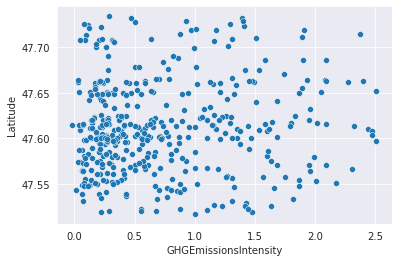

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


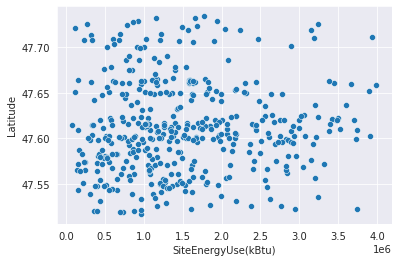

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


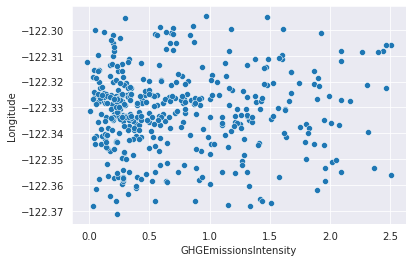

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


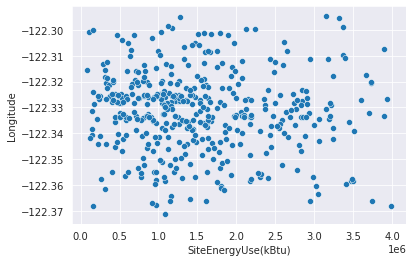

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


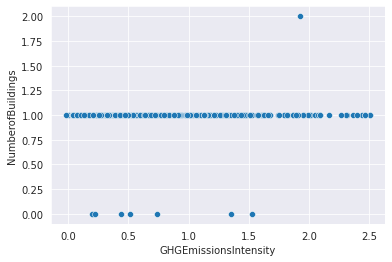

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


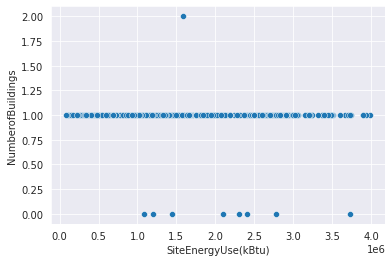

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


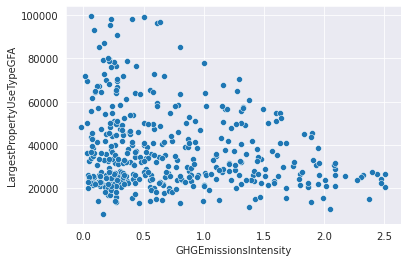

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


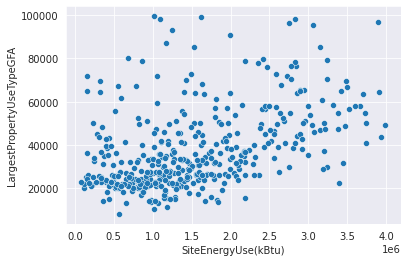

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


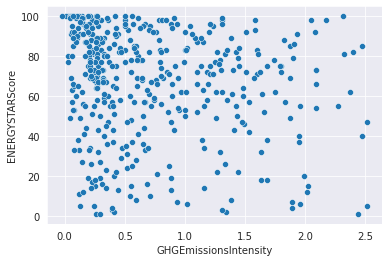

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


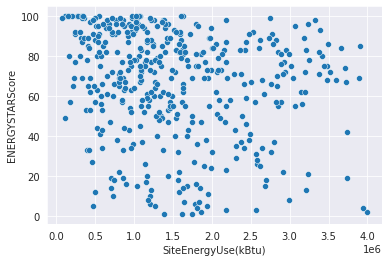

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


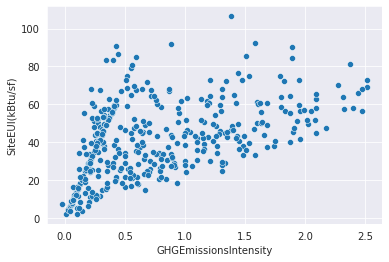

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


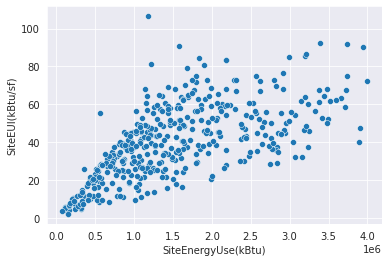

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


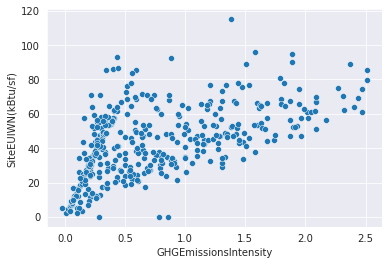

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


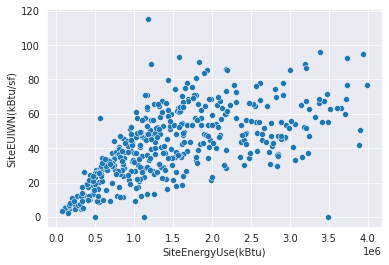

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


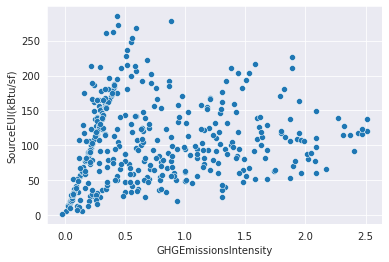

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


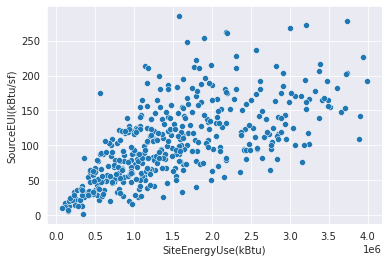

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


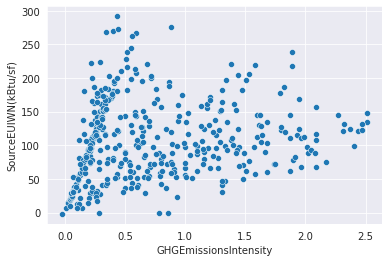

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


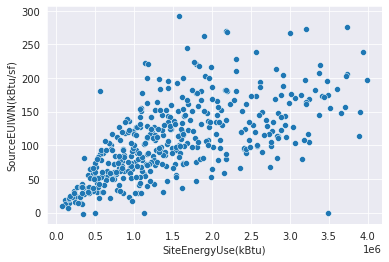

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


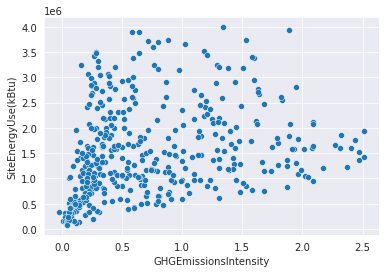

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


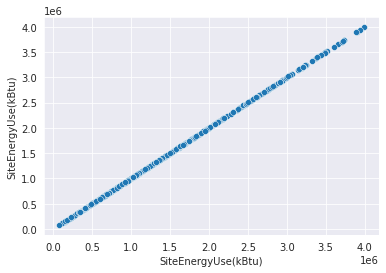

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


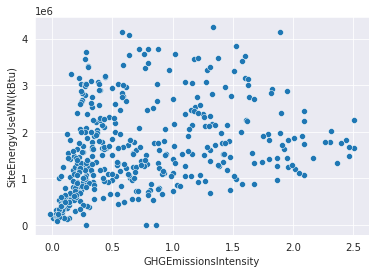

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


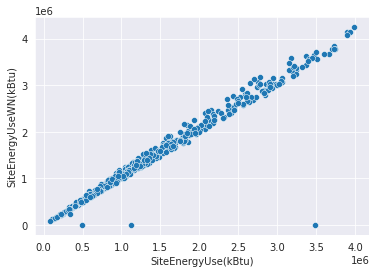

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


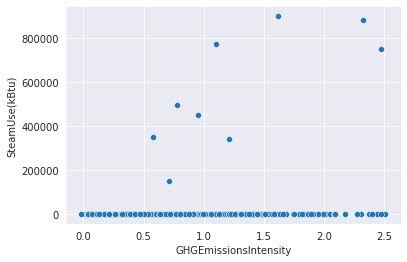

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


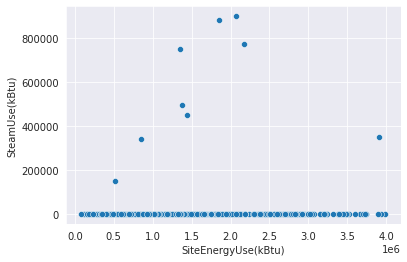

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


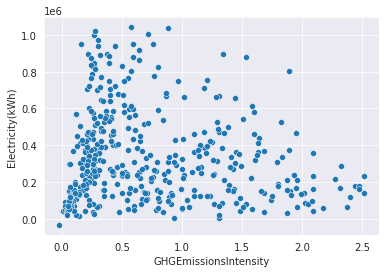

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


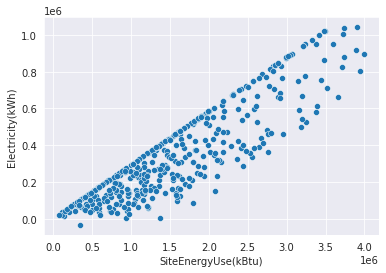

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


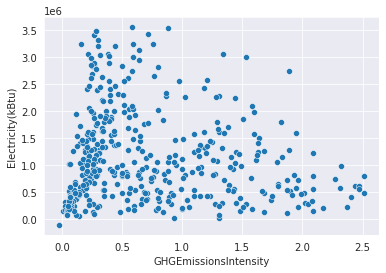

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


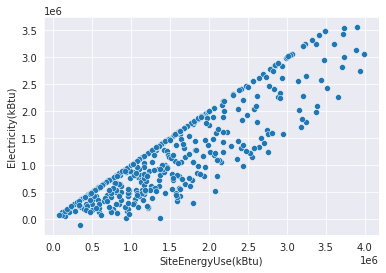

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


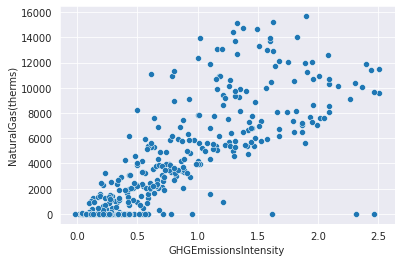

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


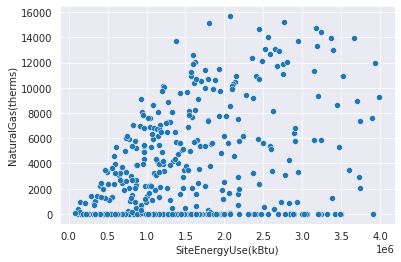

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


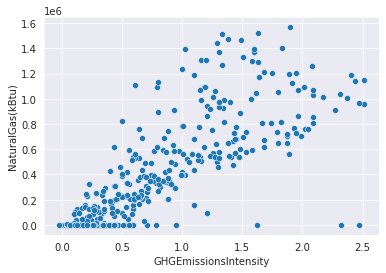

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


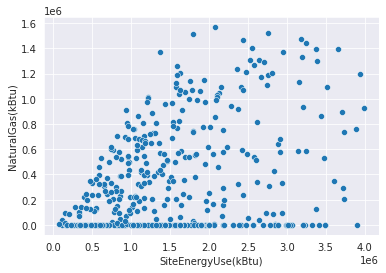

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


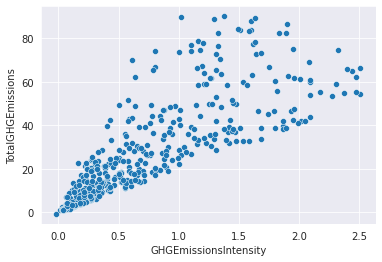

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


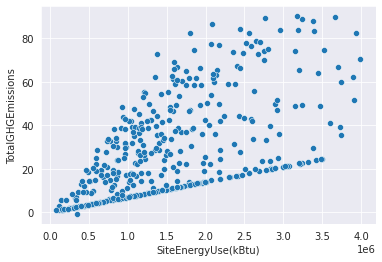

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


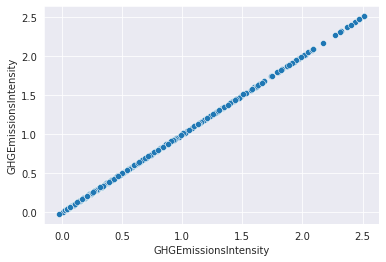

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


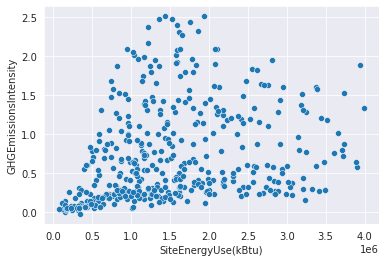

In [107]:
for i in final_df2.columns:
  if final_df2[i].dtype == 'float' or final_df2[i].dtype == 'float':
    sns.scatterplot(final_df2['GHGEmissionsIntensity'], final_df2[i])
    plt.show()
    sns.scatterplot(final_df2['SiteEnergyUse(kBtu)'], final_df2[i])
    plt.show();
  

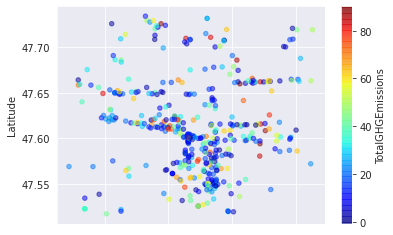

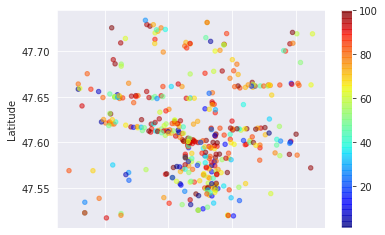

In [108]:
final_df2.plot(kind = 'scatter', x = 'Longitude', y = 'Latitude', alpha = 0.5, c = 'TotalGHGEmissions', cmap = plt.get_cmap('jet'), colorbar = True)
plt.show();
final_df2.plot(kind = 'scatter', x = 'Longitude', y = 'Latitude', alpha = 0.5, c = final_df2['ENERGYSTARScore'], cmap = plt.get_cmap('jet'), colorbar = True)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


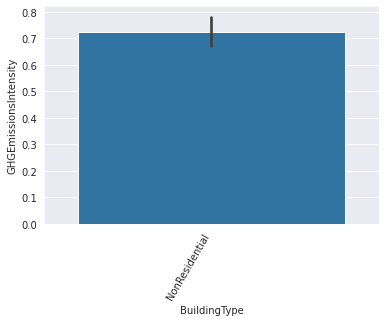

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


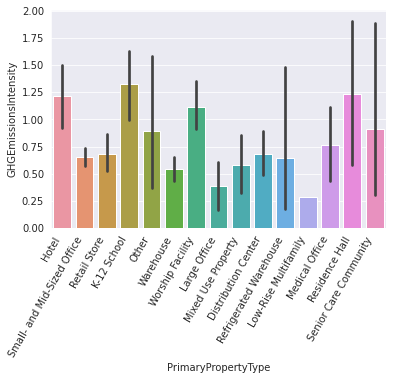

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


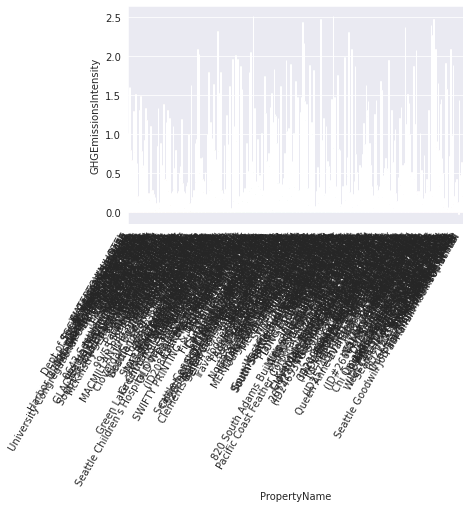

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


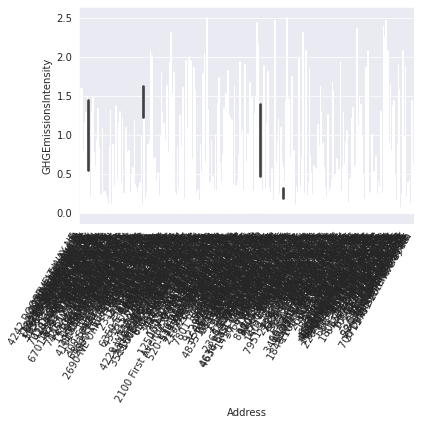

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


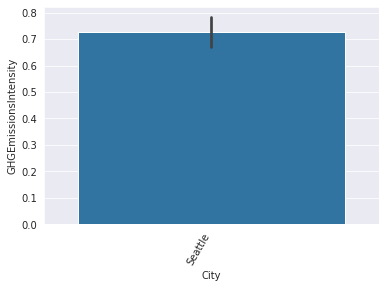

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


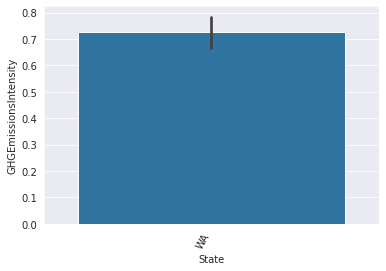

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


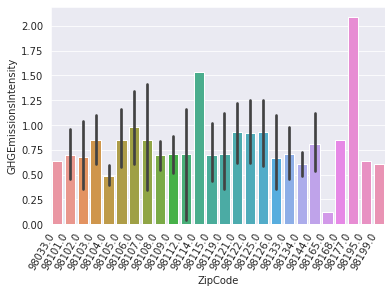

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


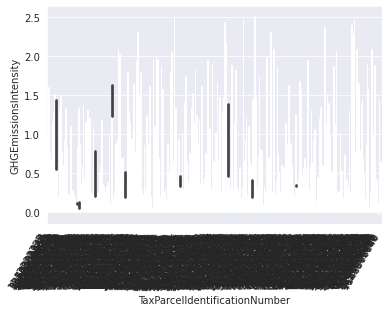

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


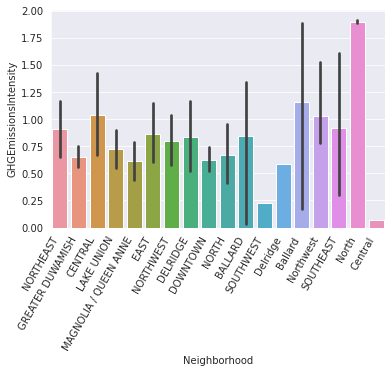

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


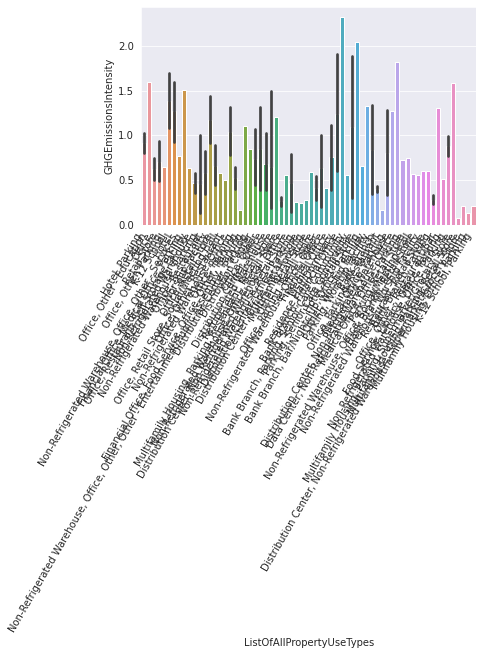

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


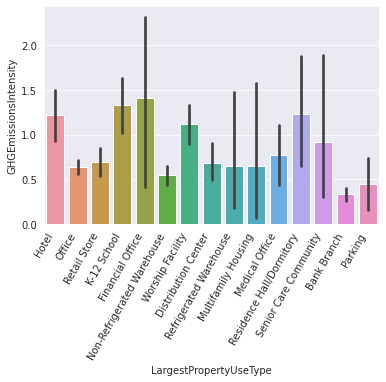

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


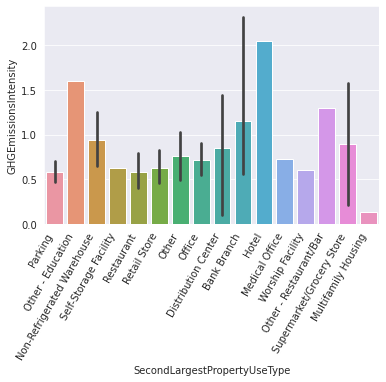

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


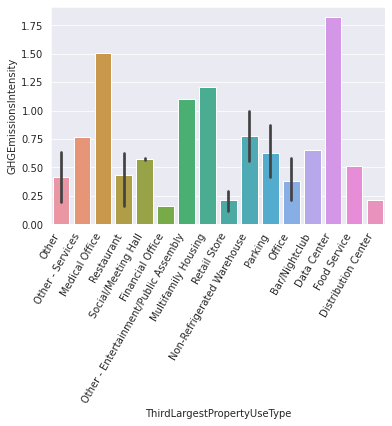

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


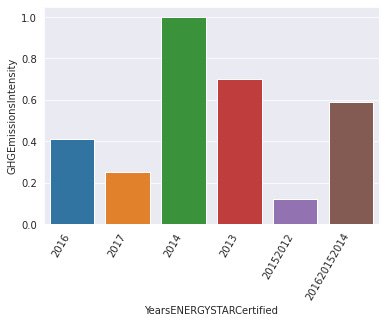

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


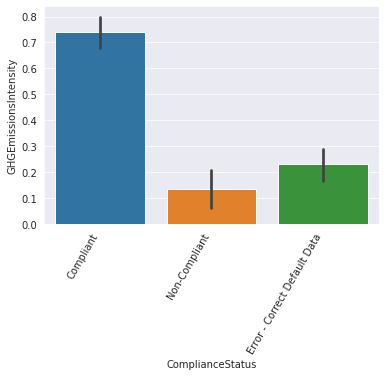

In [109]:
for i in final_df2.columns:
  if final_df2[i].dtype == 'object':
    sns.barplot(final_df2[i], final_df2['GHGEmissionsIntensity'])
    plt.xticks(rotation=60, ha='right')
    plt.show()

##Choisir les variables catégorielles et les encoder en format numériques



In [110]:
for i in final_df2.columns:
  if final_df2[i].dtype == 'object':
    print(i)

BuildingType
PrimaryPropertyType
PropertyName
Address
City
State
ZipCode
TaxParcelIdentificationNumber
Neighborhood
ListOfAllPropertyUseTypes
LargestPropertyUseType
SecondLargestPropertyUseType
ThirdLargestPropertyUseType
YearsENERGYSTARCertified
ComplianceStatus


In [111]:
variables_cat = ['PrimaryPropertyType', 'ZipCode', 'Neighborhood', 'LargestPropertyUseType', 'SecondLargestPropertyUseType']

In [112]:
for i in variables_cat:
  if final_df2[i].dtype == 'object':
    true_mode = st.mode(final_df2[i].dropna())
    final_df2[i] = final_df2[i].fillna(value = true_mode)
    print(final_df2[i])



23                            Hotel
40      Small- and Mid-Sized Office
58      Small- and Mid-Sized Office
61                            Hotel
66                     Retail Store
                   ...             
3214                    K-12 School
3218    Small- and Mid-Sized Office
3230                    K-12 School
3280                 Residence Hall
3347                    K-12 School
Name: PrimaryPropertyType, Length: 427, dtype: object
23      98105.0
40      98144.0
58      98122.0
61      98109.0
66      98109.0
         ...   
3214    98122.0
3218    98144.0
3230    98125.0
3280    98195.0
3347    98144.0
Name: ZipCode, Length: 427, dtype: float64
23             NORTHEAST
40      GREATER DUWAMISH
58               CENTRAL
61            LAKE UNION
66            LAKE UNION
              ...       
3214                EAST
3218            DOWNTOWN
3230           NORTHWEST
3280           NORTHEAST
3347    GREATER DUWAMISH
Name: Neighborhood, Length: 427, dtype: object
23       

In [113]:
for i in variables_cat:
  print(i, sum(final_df2[i].isna()), final_df2[i].dtype)
  

PrimaryPropertyType 0 object
ZipCode 0 float64
Neighborhood 0 object
LargestPropertyUseType 0 object
SecondLargestPropertyUseType 0 object


In [114]:
final_df3 = final_df2.copy()
final_df3.reset_index(drop=True, inplace=True)
display(final_df3)
for i in variables_cat:
  print(i, sum(final_df3[i].isna()), final_df3[i].dtype)
  

DataYear    BuildingType          PrimaryPropertyType  \
0        2016  NonResidential                        Hotel   
1        2016  NonResidential  Small- and Mid-Sized Office   
2        2016  NonResidential  Small- and Mid-Sized Office   
3        2016  NonResidential                        Hotel   
4        2016  NonResidential                 Retail Store   
..        ...             ...                          ...   
422      2016  NonResidential                  K-12 School   
423      2016  NonResidential  Small- and Mid-Sized Office   
424      2016  NonResidential                  K-12 School   
425      2016  NonResidential               Residence Hall   
426      2016  NonResidential                  K-12 School   

                                        PropertyName  \
0                                    WATERTOWN HOTEL   
1                               El Centro de la Raza   
2                   Dept of Social & Health Services   
3                              SCCA - ALLIANCE HOUSE   
4                             Firestone Store#012432   
..                                               ...   
422                         The Northwest School 401   
423  Seattle Goodwill Job Training/ Education Center   
424                     Paul G Allen Athletic Center   
425                                      Poplar Hall   
426                           Hamlin Robinson School   

                      Address     City State  ZipCode  \
0       4242 ROOSEVELT WAY NE  Seattle    WA  98105.0   
1             2524 16th Ave S  Seattle    WA  98144.0   
2           1700 E. Cherry St  Seattle    WA  98122.0   
3           207 Pontius Ave N  Seattle    WA  98109.0   
4          400 Westlake Ave N  Seattle    WA  98109.0   
..                        ...      ...   ...      ...   
422                  401 Pike  Seattle    WA  98122.0   
423  700 Dearborn Place South  Seattle    WA  98144.0   
424          14050 1st Ave NE  Seattle    WA  98125.0   
425     3715 W Stevens Way NE  Seattle    WA  98195.0   
426       1701 20th Ave South  Seattle    WA  98144.0   

    TaxParcelIdentificationNumber  CouncilDistrictCode  ...  \
0                      1142000755                    4  ...   
1                      0570000340                    2  ...   
2                      2254501944                    3  ...   
3                      2467400430                    7  ...   
4                      1983200230                    7  ...   
..                            ...                  ...  ...   
422                    8725600410                    3  ...   
423                    7134300080                    3  ...   
424                    2832100190                    5  ...   
425                    1625049001                    4  ...   
426                    7548300840                    3  ...   

    SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
0             3673186.750             0.0       664194.3750   
1             3150635.500             0.0       462998.0000   
2             3630147.250             0.0       579786.0000   
3             3787499.000             0.0       824351.6250   
4             1243027.750             0.0       106038.5000   
..                    ...             ...               ...   
422           2962615.250             0.0       654810.6250   
423           2626698.250             0.0       716470.8750   
424           1695022.250             0.0       405739.3125   
425           4075094.500             0.0       917299.0000   
426           1397742.375             0.0       388620.4063   

     Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
0            2266231.0        13973.030270         1397303.0        False   
1            1579749.0        13715.820310         1371582.0        False   
2            1978230.0        13969.809570         1396981.0        False   
3            2812688.0         8934.120117          893412.0        False   
4  

PrimaryPropertyType 0 object
ZipCode 0 float64
Neighborhood 0 object
LargestPropertyUseType 0 object
SecondLargestPropertyUseType 0 object


In [115]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
for i in variables_cat:
  encoder_df = pd.DataFrame(encoder.fit_transform(final_df3[[i]]).toarray())
  encoder_df.columns = encoder.get_feature_names_out()
  display(encoder_df)
  display(final_df3)
  for i in encoder_df.columns:
    print(i, sum(encoder_df[i].isna()), encoder_df[i].dtype)
  final_df3 = final_df3.join(encoder_df)
  display(final_df3)
  final_df3 = final_df3.drop(i, axis=1)
  display(final_df3)



PrimaryPropertyType_Distribution Center  PrimaryPropertyType_Hotel  \
0                                        0.0                        1.0   
1                                        0.0                        0.0   
2                                        0.0                        0.0   
3                                        0.0                        1.0   
4                                        0.0                        0.0   
..                                       ...                        ...   
422                                      0.0                        0.0   
423                                      0.0                        0.0   
424                                      0.0                        0.0   
425                                      0.0                        0.0   
426                                      0.0                        0.0   

     PrimaryPropertyType_K-12 School  PrimaryPropertyType_Large Office  \
0                                0.0                               0.0   
1                                0.0                               0.0   
2                                0.0                               0.0   
3                                0.0                               0.0   
4                                0.0                               0.0   
..                               ...                               ...   
422                              1.0                               0.0   
423                              0.0                               0.0   
424                              1.0                               0.0   
425                              0.0                               0.0   
426                              1.0                               0.0   

     PrimaryPropertyType_Low-Rise Multifamily  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   
..                                        ...   
422                                       0.0   
423                                       0.0   
424                                       0.0   
425                                       0.0   
426                                       0.0   

     PrimaryPropertyType_Medical Office  \
0                                   0.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   
..                                  ...   
422                                 0.0   
423                                 0.0   
424                                 0.0   
425                                 0.0   
426                                 0.0   

     PrimaryPropertyType_Mixed Use Property  PrimaryPropertyType_Other  \
0                                       0.0                        0.0   
1                                       0.0                        0.0   
2                                       0.0                        0.0   
3                                       0.0                        0.0   
4                                       0.0                        0.0   
..                                      ...                        ...   
422                                     0.0                        0.0   
423                                     0.0                        0.0   
424                                     0.0                        0.0   
425                                     0.0                        0.0   
426                                     0.0                        0.0   

     PrimaryPropertyType_Refrigerated Warehouse  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3               

DataYear    BuildingType          PrimaryPropertyType  \
0        2016  NonResidential                        Hotel   
1        2016  NonResidential  Small- and Mid-Sized Office   
2        2016  NonResidential  Small- and Mid-Sized Office   
3        2016  NonResidential                        Hotel   
4        2016  NonResidential                 Retail Store   
..        ...             ...                          ...   
422      2016  NonResidential                  K-12 School   
423      2016  NonResidential  Small- and Mid-Sized Office   
424      2016  NonResidential                  K-12 School   
425      2016  NonResidential               Residence Hall   
426      2016  NonResidential                  K-12 School   

                                        PropertyName  \
0                                    WATERTOWN HOTEL   
1                               El Centro de la Raza   
2                   Dept of Social & Health Services   
3                              SCCA - ALLIANCE HOUSE   
4                             Firestone Store#012432   
..                                               ...   
422                         The Northwest School 401   
423  Seattle Goodwill Job Training/ Education Center   
424                     Paul G Allen Athletic Center   
425                                      Poplar Hall   
426                           Hamlin Robinson School   

                      Address     City State  ZipCode  \
0       4242 ROOSEVELT WAY NE  Seattle    WA  98105.0   
1             2524 16th Ave S  Seattle    WA  98144.0   
2           1700 E. Cherry St  Seattle    WA  98122.0   
3           207 Pontius Ave N  Seattle    WA  98109.0   
4          400 Westlake Ave N  Seattle    WA  98109.0   
..                        ...      ...   ...      ...   
422                  401 Pike  Seattle    WA  98122.0   
423  700 Dearborn Place South  Seattle    WA  98144.0   
424          14050 1st Ave NE  Seattle    WA  98125.0   
425     3715 W Stevens Way NE  Seattle    WA  98195.0   
426       1701 20th Ave South  Seattle    WA  98144.0   

    TaxParcelIdentificationNumber  CouncilDistrictCode  ...  \
0                      1142000755                    4  ...   
1                      0570000340                    2  ...   
2                      2254501944                    3  ...   
3                      2467400430                    7  ...   
4                      1983200230                    7  ...   
..                            ...                  ...  ...   
422                    8725600410                    3  ...   
423                    7134300080                    3  ...   
424                    2832100190                    5  ...   
425                    1625049001                    4  ...   
426                    7548300840                    3  ...   

    SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
0             3673186.750             0.0       664194.3750   
1             3150635.500             0.0       462998.0000   
2             3630147.250             0.0       579786.0000   
3             3787499.000             0.0       824351.6250   
4             1243027.750             0.0       106038.5000   
..                    ...             ...               ...   
422           2962615.250             0.0       654810.6250   
423           2626698.250             0.0       716470.8750   
424           1695022.250             0.0       405739.3125   
425           4075094.500             0.0       917299.0000   
426           1397742.375             0.0       388620.4063   

     Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
0            2266231.0        13973.030270         1397303.0        False   
1            1579749.0        13715.820310         1371582.0        False   
2            1978230.0        13969.809570         1396981.0        False   
3            2812688.0         8934.120117          893412.0        False   
4  

PrimaryPropertyType_Distribution Center 0 float64
PrimaryPropertyType_Hotel 0 float64
PrimaryPropertyType_K-12 School 0 float64
PrimaryPropertyType_Large Office 0 float64
PrimaryPropertyType_Low-Rise Multifamily 0 float64
PrimaryPropertyType_Medical Office 0 float64
PrimaryPropertyType_Mixed Use Property 0 float64
PrimaryPropertyType_Other 0 float64
PrimaryPropertyType_Refrigerated Warehouse 0 float64
PrimaryPropertyType_Residence Hall 0 float64
PrimaryPropertyType_Retail Store 0 float64
PrimaryPropertyType_Senior Care Community 0 float64
PrimaryPropertyType_Small- and Mid-Sized Office 0 float64
PrimaryPropertyType_Warehouse 0 float64
PrimaryPropertyType_Worship Facility 0 float64


DataYear    BuildingType          PrimaryPropertyType  \
0        2016  NonResidential                        Hotel   
1        2016  NonResidential  Small- and Mid-Sized Office   
2        2016  NonResidential  Small- and Mid-Sized Office   
3        2016  NonResidential                        Hotel   
4        2016  NonResidential                 Retail Store   
..        ...             ...                          ...   
422      2016  NonResidential                  K-12 School   
423      2016  NonResidential  Small- and Mid-Sized Office   
424      2016  NonResidential                  K-12 School   
425      2016  NonResidential               Residence Hall   
426      2016  NonResidential                  K-12 School   

                                        PropertyName  \
0                                    WATERTOWN HOTEL   
1                               El Centro de la Raza   
2                   Dept of Social & Health Services   
3                              SCCA - ALLIANCE HOUSE   
4                             Firestone Store#012432   
..                                               ...   
422                         The Northwest School 401   
423  Seattle Goodwill Job Training/ Education Center   
424                     Paul G Allen Athletic Center   
425                                      Poplar Hall   
426                           Hamlin Robinson School   

                      Address     City State  ZipCode  \
0       4242 ROOSEVELT WAY NE  Seattle    WA  98105.0   
1             2524 16th Ave S  Seattle    WA  98144.0   
2           1700 E. Cherry St  Seattle    WA  98122.0   
3           207 Pontius Ave N  Seattle    WA  98109.0   
4          400 Westlake Ave N  Seattle    WA  98109.0   
..                        ...      ...   ...      ...   
422                  401 Pike  Seattle    WA  98122.0   
423  700 Dearborn Place South  Seattle    WA  98144.0   
424          14050 1st Ave NE  Seattle    WA  98125.0   
425     3715 W Stevens Way NE  Seattle    WA  98195.0   
426       1701 20th Ave South  Seattle    WA  98144.0   

    TaxParcelIdentificationNumber  CouncilDistrictCode  ...  \
0                      1142000755                    4  ...   
1                      0570000340                    2  ...   
2                      2254501944                    3  ...   
3                      2467400430                    7  ...   
4                      1983200230                    7  ...   
..                            ...                  ...  ...   
422                    8725600410                    3  ...   
423                    7134300080                    3  ...   
424                    2832100190                    5  ...   
425                    1625049001                    4  ...   
426                    7548300840                    3  ...   

    PrimaryPropertyType_Medical Office  \
0                                  0.0   
1                                  0.0   
2                                  0.0   
3                                  0.0   
4                                  0.0   
..                                 ...   
422                                0.0   
423                                0.0   
424                                0.0   
425                                0.0   
426                                0.0   

     PrimaryPropertyType_Mixed Use Property  PrimaryPropertyType_Other  \
0                                       0.0                        0.0   
1                                       0.0                        0.0   
2                                       0.0                        0.0   
3                                       0.0                        0.0   
4                                       0.0                        0.0   
..                                      ...                        ...   
422                                     0.0                        0.0   
423                                     0.0     

DataYear    BuildingType          PrimaryPropertyType  \
0        2016  NonResidential                        Hotel   
1        2016  NonResidential  Small- and Mid-Sized Office   
2        2016  NonResidential  Small- and Mid-Sized Office   
3        2016  NonResidential                        Hotel   
4        2016  NonResidential                 Retail Store   
..        ...             ...                          ...   
422      2016  NonResidential                  K-12 School   
423      2016  NonResidential  Small- and Mid-Sized Office   
424      2016  NonResidential                  K-12 School   
425      2016  NonResidential               Residence Hall   
426      2016  NonResidential                  K-12 School   

                                        PropertyName  \
0                                    WATERTOWN HOTEL   
1                               El Centro de la Raza   
2                   Dept of Social & Health Services   
3                              SCCA - ALLIANCE HOUSE   
4                             Firestone Store#012432   
..                                               ...   
422                         The Northwest School 401   
423  Seattle Goodwill Job Training/ Education Center   
424                     Paul G Allen Athletic Center   
425                                      Poplar Hall   
426                           Hamlin Robinson School   

                      Address     City State  ZipCode  \
0       4242 ROOSEVELT WAY NE  Seattle    WA  98105.0   
1             2524 16th Ave S  Seattle    WA  98144.0   
2           1700 E. Cherry St  Seattle    WA  98122.0   
3           207 Pontius Ave N  Seattle    WA  98109.0   
4          400 Westlake Ave N  Seattle    WA  98109.0   
..                        ...      ...   ...      ...   
422                  401 Pike  Seattle    WA  98122.0   
423  700 Dearborn Place South  Seattle    WA  98144.0   
424          14050 1st Ave NE  Seattle    WA  98125.0   
425     3715 W Stevens Way NE  Seattle    WA  98195.0   
426       1701 20th Ave South  Seattle    WA  98144.0   

    TaxParcelIdentificationNumber  CouncilDistrictCode  ...  \
0                      1142000755                    4  ...   
1                      0570000340                    2  ...   
2                      2254501944                    3  ...   
3                      2467400430                    7  ...   
4                      1983200230                    7  ...   
..                            ...                  ...  ...   
422                    8725600410                    3  ...   
423                    7134300080                    3  ...   
424                    2832100190                    5  ...   
425                    1625049001                    4  ...   
426                    7548300840                    3  ...   

    PrimaryPropertyType_Low-Rise Multifamily  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   
..                                       ...   
422                                      0.0   
423                                      0.0   
424                                      0.0   
425                                      0.0   
426                                      0.0   

     PrimaryPropertyType_Medical Office  \
0                                   0.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   
..                                  ...   
422                                 0.0   
423                                 0.0   
424                                 0.0   
425                                 0.0   
426                                 0.0   

     PrimaryPropertyType_Mixed Use Property  Primar

ZipCode_98033.0  ZipCode_98101.0  ZipCode_98102.0  ZipCode_98103.0  \
0                0.0              0.0              0.0              0.0   
1                0.0              0.0              0.0              0.0   
2                0.0              0.0              0.0              0.0   
3                0.0              0.0              0.0              0.0   
4                0.0              0.0              0.0              0.0   
..               ...              ...              ...              ...   
422              0.0              0.0              0.0              0.0   
423              0.0              0.0              0.0              0.0   
424              0.0              0.0              0.0              0.0   
425              0.0              0.0              0.0              0.0   
426              0.0              0.0              0.0              0.0   

     ZipCode_98104.0  ZipCode_98105.0  ZipCode_98106.0  ZipCode_98107.0  \
0                0.0              1.0              0.0              0.0   
1                0.0              0.0              0.0              0.0   
2                0.0              0.0              0.0              0.0   
3                0.0              0.0              0.0              0.0   
4                0.0              0.0              0.0              0.0   
..               ...              ...              ...              ...   
422              0.0              0.0              0.0              0.0   
423              0.0              0.0              0.0              0.0   
424              0.0              0.0              0.0              0.0   
425              0.0              0.0              0.0              0.0   
426              0.0              0.0              0.0              0.0   

     ZipCode_98108.0  ZipCode_98109.0  ...  ZipCode_98125.0  ZipCode_98126.0  \
0                0.0              0.0  ...              0.0              0.0   
1                0.0              0.0  ...              0.0              0.0   
2                0.0              0.0  ...              0.0              0.0   
3                0.0              1.0  ...              0.0              0.0   
4                0.0              1.0  ...              0.0              0.0   
..               ...              ...  ...              ...              ...   
422              0.0              0.0  ...              0.0              0.0   
423              0.0              0.0  ...              0.0              0.0   
424              0.0              0.0  ...              1.0              0.0   
425              0.0              0.0  ...              0.0              0.0   
426              0.0              0.0  ...              0.0              0.0   

     ZipCode_98133.0  ZipCode_98134.0  ZipCode_98144.0  ZipCode_98165.0  \
0                0.0              0.0              0.0              0.0   
1                0.0              0.0              1.0              0.0   
2                0.0              0.0              0.0              0.0   
3                0.0              0.0              0.0              0.0   
4                0.0              0.0              0.0              0.0   
..               ...              ...              ...              ...   
422              0.0              0.0              0.0              0.0   
423              0.0              0.0              1.0              0.0   
424              0.0              0.0              0.0              0.0   
425              0.0              0.0              0.0              0.0   
426              0.0              0.0              1.0              0.0   

     ZipCode_98168.0  ZipCode_98177.0  ZipCode_98195.0  ZipCode_98199.0  
0                0.0              0.0              0.0              0.0  
1                0.0              0.0              0.0              0.0  
2                0.0              0.0              0.0              0.0  
3                0.0              0.0        

DataYear    BuildingType          PrimaryPropertyType  \
0        2016  NonResidential                        Hotel   
1        2016  NonResidential  Small- and Mid-Sized Office   
2        2016  NonResidential  Small- and Mid-Sized Office   
3        2016  NonResidential                        Hotel   
4        2016  NonResidential                 Retail Store   
..        ...             ...                          ...   
422      2016  NonResidential                  K-12 School   
423      2016  NonResidential  Small- and Mid-Sized Office   
424      2016  NonResidential                  K-12 School   
425      2016  NonResidential               Residence Hall   
426      2016  NonResidential                  K-12 School   

                                        PropertyName  \
0                                    WATERTOWN HOTEL   
1                               El Centro de la Raza   
2                   Dept of Social & Health Services   
3                              SCCA - ALLIANCE HOUSE   
4                             Firestone Store#012432   
..                                               ...   
422                         The Northwest School 401   
423  Seattle Goodwill Job Training/ Education Center   
424                     Paul G Allen Athletic Center   
425                                      Poplar Hall   
426                           Hamlin Robinson School   

                      Address     City State  ZipCode  \
0       4242 ROOSEVELT WAY NE  Seattle    WA  98105.0   
1             2524 16th Ave S  Seattle    WA  98144.0   
2           1700 E. Cherry St  Seattle    WA  98122.0   
3           207 Pontius Ave N  Seattle    WA  98109.0   
4          400 Westlake Ave N  Seattle    WA  98109.0   
..                        ...      ...   ...      ...   
422                  401 Pike  Seattle    WA  98122.0   
423  700 Dearborn Place South  Seattle    WA  98144.0   
424          14050 1st Ave NE  Seattle    WA  98125.0   
425     3715 W Stevens Way NE  Seattle    WA  98195.0   
426       1701 20th Ave South  Seattle    WA  98144.0   

    TaxParcelIdentificationNumber  CouncilDistrictCode  ...  \
0                      1142000755                    4  ...   
1                      0570000340                    2  ...   
2                      2254501944                    3  ...   
3                      2467400430                    7  ...   
4                      1983200230                    7  ...   
..                            ...                  ...  ...   
422                    8725600410                    3  ...   
423                    7134300080                    3  ...   
424                    2832100190                    5  ...   
425                    1625049001                    4  ...   
426                    7548300840                    3  ...   

    PrimaryPropertyType_Low-Rise Multifamily  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   
..                                       ...   
422                                      0.0   
423                                      0.0   
424                                      0.0   
425                                      0.0   
426                                      0.0   

     PrimaryPropertyType_Medical Office  \
0                                   0.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   
..                                  ...   
422                                 0.0   
423                                 0.0   
424                                 0.0   
425                                 0.0   
426                                 0.0   

     PrimaryPropertyType_Mixed Use Property  Primar

ZipCode_98033.0 0 float64
ZipCode_98101.0 0 float64
ZipCode_98102.0 0 float64
ZipCode_98103.0 0 float64
ZipCode_98104.0 0 float64
ZipCode_98105.0 0 float64
ZipCode_98106.0 0 float64
ZipCode_98107.0 0 float64
ZipCode_98108.0 0 float64
ZipCode_98109.0 0 float64
ZipCode_98112.0 0 float64
ZipCode_98114.0 0 float64
ZipCode_98115.0 0 float64
ZipCode_98119.0 0 float64
ZipCode_98121.0 0 float64
ZipCode_98122.0 0 float64
ZipCode_98125.0 0 float64
ZipCode_98126.0 0 float64
ZipCode_98133.0 0 float64
ZipCode_98134.0 0 float64
ZipCode_98144.0 0 float64
ZipCode_98165.0 0 float64
ZipCode_98168.0 0 float64
ZipCode_98177.0 0 float64
ZipCode_98195.0 0 float64
ZipCode_98199.0 0 float64


DataYear    BuildingType          PrimaryPropertyType  \
0        2016  NonResidential                        Hotel   
1        2016  NonResidential  Small- and Mid-Sized Office   
2        2016  NonResidential  Small- and Mid-Sized Office   
3        2016  NonResidential                        Hotel   
4        2016  NonResidential                 Retail Store   
..        ...             ...                          ...   
422      2016  NonResidential                  K-12 School   
423      2016  NonResidential  Small- and Mid-Sized Office   
424      2016  NonResidential                  K-12 School   
425      2016  NonResidential               Residence Hall   
426      2016  NonResidential                  K-12 School   

                                        PropertyName  \
0                                    WATERTOWN HOTEL   
1                               El Centro de la Raza   
2                   Dept of Social & Health Services   
3                              SCCA - ALLIANCE HOUSE   
4                             Firestone Store#012432   
..                                               ...   
422                         The Northwest School 401   
423  Seattle Goodwill Job Training/ Education Center   
424                     Paul G Allen Athletic Center   
425                                      Poplar Hall   
426                           Hamlin Robinson School   

                      Address     City State  ZipCode  \
0       4242 ROOSEVELT WAY NE  Seattle    WA  98105.0   
1             2524 16th Ave S  Seattle    WA  98144.0   
2           1700 E. Cherry St  Seattle    WA  98122.0   
3           207 Pontius Ave N  Seattle    WA  98109.0   
4          400 Westlake Ave N  Seattle    WA  98109.0   
..                        ...      ...   ...      ...   
422                  401 Pike  Seattle    WA  98122.0   
423  700 Dearborn Place South  Seattle    WA  98144.0   
424          14050 1st Ave NE  Seattle    WA  98125.0   
425     3715 W Stevens Way NE  Seattle    WA  98195.0   
426       1701 20th Ave South  Seattle    WA  98144.0   

    TaxParcelIdentificationNumber  CouncilDistrictCode  ... ZipCode_98125.0  \
0                      1142000755                    4  ...             0.0   
1                      0570000340                    2  ...             0.0   
2                      2254501944                    3  ...             0.0   
3                      2467400430                    7  ...             0.0   
4                      1983200230                    7  ...             0.0   
..                            ...                  ...  ...             ...   
422                    8725600410                    3  ...             0.0   
423                    7134300080                    3  ...             0.0   
424                    2832100190                    5  ...             1.0   
425                    1625049001                    4  ...             0.0   
426                    7548300840                    3  ...             0.0   

     ZipCode_98126.0  ZipCode_98133.0  ZipCode_98134.0  ZipCode_98144.0  \
0                0.0              0.0              0.0              0.0   
1                0.0              0.0              0.0              1.0   
2                0.0              0.0              0.0              0.0   
3                0.0              0.0              0.0              0.0   
4                0.0              0.0              0.0              0.0   
..               ...              ...              ...              ...   
422              0.0              0.0              0.0              0.0   
423              0.0              0.0              0.0              1.0   
424              0.0              0.0              0.0              0.0   
425              0.0              0.0              0.0              0.0   
426              0.0              0.0              0.0              1.0   

     ZipCode_98165.0  ZipCode_98168.0  ZipCode_98177

DataYear    BuildingType          PrimaryPropertyType  \
0        2016  NonResidential                        Hotel   
1        2016  NonResidential  Small- and Mid-Sized Office   
2        2016  NonResidential  Small- and Mid-Sized Office   
3        2016  NonResidential                        Hotel   
4        2016  NonResidential                 Retail Store   
..        ...             ...                          ...   
422      2016  NonResidential                  K-12 School   
423      2016  NonResidential  Small- and Mid-Sized Office   
424      2016  NonResidential                  K-12 School   
425      2016  NonResidential               Residence Hall   
426      2016  NonResidential                  K-12 School   

                                        PropertyName  \
0                                    WATERTOWN HOTEL   
1                               El Centro de la Raza   
2                   Dept of Social & Health Services   
3                              SCCA - ALLIANCE HOUSE   
4                             Firestone Store#012432   
..                                               ...   
422                         The Northwest School 401   
423  Seattle Goodwill Job Training/ Education Center   
424                     Paul G Allen Athletic Center   
425                                      Poplar Hall   
426                           Hamlin Robinson School   

                      Address     City State  ZipCode  \
0       4242 ROOSEVELT WAY NE  Seattle    WA  98105.0   
1             2524 16th Ave S  Seattle    WA  98144.0   
2           1700 E. Cherry St  Seattle    WA  98122.0   
3           207 Pontius Ave N  Seattle    WA  98109.0   
4          400 Westlake Ave N  Seattle    WA  98109.0   
..                        ...      ...   ...      ...   
422                  401 Pike  Seattle    WA  98122.0   
423  700 Dearborn Place South  Seattle    WA  98144.0   
424          14050 1st Ave NE  Seattle    WA  98125.0   
425     3715 W Stevens Way NE  Seattle    WA  98195.0   
426       1701 20th Ave South  Seattle    WA  98144.0   

    TaxParcelIdentificationNumber  CouncilDistrictCode  ... ZipCode_98122.0  \
0                      1142000755                    4  ...             0.0   
1                      0570000340                    2  ...             0.0   
2                      2254501944                    3  ...             1.0   
3                      2467400430                    7  ...             0.0   
4                      1983200230                    7  ...             0.0   
..                            ...                  ...  ...             ...   
422                    8725600410                    3  ...             1.0   
423                    7134300080                    3  ...             0.0   
424                    2832100190                    5  ...             0.0   
425                    1625049001                    4  ...             0.0   
426                    7548300840                    3  ...             0.0   

     ZipCode_98125.0  ZipCode_98126.0  ZipCode_98133.0  ZipCode_98134.0  \
0                0.0              0.0              0.0              0.0   
1                0.0              0.0              0.0              0.0   
2                0.0              0.0              0.0              0.0   
3                0.0              0.0              0.0              0.0   
4                0.0              0.0              0.0              0.0   
..               ...              ...              ...              ...   
422              0.0              0.0              0.0              0.0   
423              0.0              0.0              0.0              0.0   
424              1.0              0.0              0.0              0.0   
425              0.0              0.0              0.0              0.0   
426              0.0              0.0              0.0              0.0   

     ZipCode_98144.0  ZipCode_98165.0  ZipCode_98168

Neighborhood_BALLARD  Neighborhood_Ballard  Neighborhood_CENTRAL  \
0                     0.0                   0.0                   0.0   
1                     0.0                   0.0                   0.0   
2                     0.0                   0.0                   1.0   
3                     0.0                   0.0                   0.0   
4                     0.0                   0.0                   0.0   
..                    ...                   ...                   ...   
422                   0.0                   0.0                   0.0   
423                   0.0                   0.0                   0.0   
424                   0.0                   0.0                   0.0   
425                   0.0                   0.0                   0.0   
426                   0.0                   0.0                   0.0   

     Neighborhood_Central  Neighborhood_DELRIDGE  Neighborhood_DOWNTOWN  \
0                     0.0                    0.0                    0.0   
1                     0.0                    0.0                    0.0   
2                     0.0                    0.0                    0.0   
3                     0.0                    0.0                    0.0   
4                     0.0                    0.0                    0.0   
..                    ...                    ...                    ...   
422                   0.0                    0.0                    0.0   
423                   0.0                    0.0                    1.0   
424                   0.0                    0.0                    0.0   
425                   0.0                    0.0                    0.0   
426                   0.0                    0.0                    0.0   

     Neighborhood_Delridge  Neighborhood_EAST  Neighborhood_GREATER DUWAMISH  \
0                      0.0                0.0                            0.0   
1                      0.0                0.0                            1.0   
2                      0.0                0.0                            0.0   
3                      0.0                0.0                            0.0   
4                      0.0                0.0                            0.0   
..                     ...                ...                            ...   
422                    0.0                1.0                            0.0   
423                    0.0                0.0                            0.0   
424                    0.0                0.0                            0.0   
425                    0.0                0.0                            0.0   
426                    0.0                0.0                            1.0   

     Neighborhood_LAKE UNION  Neighborhood_MAGNOLIA / QUEEN ANNE  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        1.0                                 0.0   
4                        1.0                                 0.0   
..                       ...                                 ...   
422                      0.0                                 0.0   
423                      0.0                                 0.0   
424                      0.0                                 0.0   
425                      0.0                                 0.0   
426                      0.0                                 0.0   

     Neighborhood_NORTH  Neighborhood_NORTHEAST  Neighborhood_NORTHWEST  \
0                   0.0                     1.0                     0.0   
1                   0.0                     0.0                     0.0   
2                   0.0                     0.0                     0.0   
3                   0.0                     0.0                     0.0   
4                   0.0                     0.0                     0.0   

DataYear    BuildingType          PrimaryPropertyType  \
0        2016  NonResidential                        Hotel   
1        2016  NonResidential  Small- and Mid-Sized Office   
2        2016  NonResidential  Small- and Mid-Sized Office   
3        2016  NonResidential                        Hotel   
4        2016  NonResidential                 Retail Store   
..        ...             ...                          ...   
422      2016  NonResidential                  K-12 School   
423      2016  NonResidential  Small- and Mid-Sized Office   
424      2016  NonResidential                  K-12 School   
425      2016  NonResidential               Residence Hall   
426      2016  NonResidential                  K-12 School   

                                        PropertyName  \
0                                    WATERTOWN HOTEL   
1                               El Centro de la Raza   
2                   Dept of Social & Health Services   
3                              SCCA - ALLIANCE HOUSE   
4                             Firestone Store#012432   
..                                               ...   
422                         The Northwest School 401   
423  Seattle Goodwill Job Training/ Education Center   
424                     Paul G Allen Athletic Center   
425                                      Poplar Hall   
426                           Hamlin Robinson School   

                      Address     City State  ZipCode  \
0       4242 ROOSEVELT WAY NE  Seattle    WA  98105.0   
1             2524 16th Ave S  Seattle    WA  98144.0   
2           1700 E. Cherry St  Seattle    WA  98122.0   
3           207 Pontius Ave N  Seattle    WA  98109.0   
4          400 Westlake Ave N  Seattle    WA  98109.0   
..                        ...      ...   ...      ...   
422                  401 Pike  Seattle    WA  98122.0   
423  700 Dearborn Place South  Seattle    WA  98144.0   
424          14050 1st Ave NE  Seattle    WA  98125.0   
425     3715 W Stevens Way NE  Seattle    WA  98195.0   
426       1701 20th Ave South  Seattle    WA  98144.0   

    TaxParcelIdentificationNumber  CouncilDistrictCode  ... ZipCode_98122.0  \
0                      1142000755                    4  ...             0.0   
1                      0570000340                    2  ...             0.0   
2                      2254501944                    3  ...             1.0   
3                      2467400430                    7  ...             0.0   
4                      1983200230                    7  ...             0.0   
..                            ...                  ...  ...             ...   
422                    8725600410                    3  ...             1.0   
423                    7134300080                    3  ...             0.0   
424                    2832100190                    5  ...             0.0   
425                    1625049001                    4  ...             0.0   
426                    7548300840                    3  ...             0.0   

     ZipCode_98125.0  ZipCode_98126.0  ZipCode_98133.0  ZipCode_98134.0  \
0                0.0              0.0              0.0              0.0   
1                0.0              0.0              0.0              0.0   
2                0.0              0.0              0.0              0.0   
3                0.0              0.0              0.0              0.0   
4                0.0              0.0              0.0              0.0   
..               ...              ...              ...              ...   
422              0.0              0.0              0.0              0.0   
423              0.0              0.0              0.0              0.0   
424              1.0              0.0              0.0              0.0   
425              0.0              0.0              0.0              0.0   
426              0.0              0.0              0.0              0.0   

     ZipCode_98144.0  ZipCode_98165.0  ZipCode_98168

Neighborhood_BALLARD 0 float64
Neighborhood_Ballard 0 float64
Neighborhood_CENTRAL 0 float64
Neighborhood_Central 0 float64
Neighborhood_DELRIDGE 0 float64
Neighborhood_DOWNTOWN 0 float64
Neighborhood_Delridge 0 float64
Neighborhood_EAST 0 float64
Neighborhood_GREATER DUWAMISH 0 float64
Neighborhood_LAKE UNION 0 float64
Neighborhood_MAGNOLIA / QUEEN ANNE 0 float64
Neighborhood_NORTH 0 float64
Neighborhood_NORTHEAST 0 float64
Neighborhood_NORTHWEST 0 float64
Neighborhood_North 0 float64
Neighborhood_Northwest 0 float64
Neighborhood_SOUTHEAST 0 float64
Neighborhood_SOUTHWEST 0 float64


DataYear    BuildingType          PrimaryPropertyType  \
0        2016  NonResidential                        Hotel   
1        2016  NonResidential  Small- and Mid-Sized Office   
2        2016  NonResidential  Small- and Mid-Sized Office   
3        2016  NonResidential                        Hotel   
4        2016  NonResidential                 Retail Store   
..        ...             ...                          ...   
422      2016  NonResidential                  K-12 School   
423      2016  NonResidential  Small- and Mid-Sized Office   
424      2016  NonResidential                  K-12 School   
425      2016  NonResidential               Residence Hall   
426      2016  NonResidential                  K-12 School   

                                        PropertyName  \
0                                    WATERTOWN HOTEL   
1                               El Centro de la Raza   
2                   Dept of Social & Health Services   
3                              SCCA - ALLIANCE HOUSE   
4                             Firestone Store#012432   
..                                               ...   
422                         The Northwest School 401   
423  Seattle Goodwill Job Training/ Education Center   
424                     Paul G Allen Athletic Center   
425                                      Poplar Hall   
426                           Hamlin Robinson School   

                      Address     City State  ZipCode  \
0       4242 ROOSEVELT WAY NE  Seattle    WA  98105.0   
1             2524 16th Ave S  Seattle    WA  98144.0   
2           1700 E. Cherry St  Seattle    WA  98122.0   
3           207 Pontius Ave N  Seattle    WA  98109.0   
4          400 Westlake Ave N  Seattle    WA  98109.0   
..                        ...      ...   ...      ...   
422                  401 Pike  Seattle    WA  98122.0   
423  700 Dearborn Place South  Seattle    WA  98144.0   
424          14050 1st Ave NE  Seattle    WA  98125.0   
425     3715 W Stevens Way NE  Seattle    WA  98195.0   
426       1701 20th Ave South  Seattle    WA  98144.0   

    TaxParcelIdentificationNumber  CouncilDistrictCode  ...  \
0                      1142000755                    4  ...   
1                      0570000340                    2  ...   
2                      2254501944                    3  ...   
3                      2467400430                    7  ...   
4                      1983200230                    7  ...   
..                            ...                  ...  ...   
422                    8725600410                    3  ...   
423                    7134300080                    3  ...   
424                    2832100190                    5  ...   
425                    1625049001                    4  ...   
426                    7548300840                    3  ...   

    Neighborhood_GREATER DUWAMISH  Neighborhood_LAKE UNION  \
0                             0.0                      0.0   
1                             1.0                      0.0   
2                             0.0                      0.0   
3                             0.0                      1.0   
4                             0.0                      1.0   
..                            ...                      ...   
422                           0.0                      0.0   
423                           0.0                      0.0   
424                           0.0                      0.0   
425                           0.0                      0.0   
426                           1.0                      0.0   

     Neighborhood_MAGNOLIA / QUEEN ANNE  Neighborhood_NORTH  \
0                                   0.0                 0.0   
1                                   0.0                 0.0   
2                                   0.0                 0.0   
3                                   0.0                 0.0   
4                                   0.0                 0.0   
..                    

DataYear    BuildingType          PrimaryPropertyType  \
0        2016  NonResidential                        Hotel   
1        2016  NonResidential  Small- and Mid-Sized Office   
2        2016  NonResidential  Small- and Mid-Sized Office   
3        2016  NonResidential                        Hotel   
4        2016  NonResidential                 Retail Store   
..        ...             ...                          ...   
422      2016  NonResidential                  K-12 School   
423      2016  NonResidential  Small- and Mid-Sized Office   
424      2016  NonResidential                  K-12 School   
425      2016  NonResidential               Residence Hall   
426      2016  NonResidential                  K-12 School   

                                        PropertyName  \
0                                    WATERTOWN HOTEL   
1                               El Centro de la Raza   
2                   Dept of Social & Health Services   
3                              SCCA - ALLIANCE HOUSE   
4                             Firestone Store#012432   
..                                               ...   
422                         The Northwest School 401   
423  Seattle Goodwill Job Training/ Education Center   
424                     Paul G Allen Athletic Center   
425                                      Poplar Hall   
426                           Hamlin Robinson School   

                      Address     City State  ZipCode  \
0       4242 ROOSEVELT WAY NE  Seattle    WA  98105.0   
1             2524 16th Ave S  Seattle    WA  98144.0   
2           1700 E. Cherry St  Seattle    WA  98122.0   
3           207 Pontius Ave N  Seattle    WA  98109.0   
4          400 Westlake Ave N  Seattle    WA  98109.0   
..                        ...      ...   ...      ...   
422                  401 Pike  Seattle    WA  98122.0   
423  700 Dearborn Place South  Seattle    WA  98144.0   
424          14050 1st Ave NE  Seattle    WA  98125.0   
425     3715 W Stevens Way NE  Seattle    WA  98195.0   
426       1701 20th Ave South  Seattle    WA  98144.0   

    TaxParcelIdentificationNumber  CouncilDistrictCode  ... Neighborhood_EAST  \
0                      1142000755                    4  ...               0.0   
1                      0570000340                    2  ...               0.0   
2                      2254501944                    3  ...               0.0   
3                      2467400430                    7  ...               0.0   
4                      1983200230                    7  ...               0.0   
..                            ...                  ...  ...               ...   
422                    8725600410                    3  ...               1.0   
423                    7134300080                    3  ...               0.0   
424                    2832100190                    5  ...               0.0   
425                    1625049001                    4  ...               0.0   
426                    7548300840                    3  ...               0.0   

     Neighborhood_GREATER DUWAMISH  Neighborhood_LAKE UNION  \
0                              0.0                      0.0   
1                              1.0                      0.0   
2                              0.0                      0.0   
3                              0.0                      1.0   
4                              0.0                      1.0   
..                             ...                      ...   
422                            0.0                      0.0   
423                            0.0                      0.0   
424                            0.0                      0.0   
425                            0.0                      0.0   
426                            1.0                      0.0   

     Neighborhood_MAGNOLIA / QUEEN ANNE  Neighborhood_NORTH  \
0                                   0.0                 0.0   
1                                   0.0       

LargestPropertyUseType_Bank Branch  \
0                                   0.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   
..                                  ...   
422                                 0.0   
423                                 0.0   
424                                 0.0   
425                                 0.0   
426                                 0.0   

     LargestPropertyUseType_Distribution Center  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   
..                                          ...   
422                                         0.0   
423                                         0.0   
424                                         0.0   
425                                         0.0   
426                                         0.0   

     LargestPropertyUseType_Financial Office  LargestPropertyUseType_Hotel  \
0                                        0.0                           1.0   
1                                        0.0                           0.0   
2                                        0.0                           0.0   
3                                        0.0                           1.0   
4                                        0.0                           0.0   
..                                       ...                           ...   
422                                      0.0                           0.0   
423                                      0.0                           0.0   
424                                      0.0                           0.0   
425                                      0.0                           0.0   
426                                      0.0                           0.0   

     LargestPropertyUseType_K-12 School  \
0                                   0.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   
..                                  ...   
422                                 1.0   
423                                 0.0   
424                                 1.0   
425                                 0.0   
426                                 1.0   

     LargestPropertyUseType_Medical Office  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   
..                                     ...   
422                                    0.0   
423                                    0.0   
424                                    0.0   
425                                    0.0   
426                                    0.0   

     LargestPropertyUseType_Multifamily Housing  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   
..                                          ...   
422                                         0.0   
423                                         0.0   
424                                         0.0   
425                                         0.0   
426                                         0.0   

     LargestPropertyUseType_Non-Refrigerated Warehouse  \
0                                                  0.0   
1                                                  0.0   
2                                                  0.0   
3                      

DataYear    BuildingType          PrimaryPropertyType  \
0        2016  NonResidential                        Hotel   
1        2016  NonResidential  Small- and Mid-Sized Office   
2        2016  NonResidential  Small- and Mid-Sized Office   
3        2016  NonResidential                        Hotel   
4        2016  NonResidential                 Retail Store   
..        ...             ...                          ...   
422      2016  NonResidential                  K-12 School   
423      2016  NonResidential  Small- and Mid-Sized Office   
424      2016  NonResidential                  K-12 School   
425      2016  NonResidential               Residence Hall   
426      2016  NonResidential                  K-12 School   

                                        PropertyName  \
0                                    WATERTOWN HOTEL   
1                               El Centro de la Raza   
2                   Dept of Social & Health Services   
3                              SCCA - ALLIANCE HOUSE   
4                             Firestone Store#012432   
..                                               ...   
422                         The Northwest School 401   
423  Seattle Goodwill Job Training/ Education Center   
424                     Paul G Allen Athletic Center   
425                                      Poplar Hall   
426                           Hamlin Robinson School   

                      Address     City State  ZipCode  \
0       4242 ROOSEVELT WAY NE  Seattle    WA  98105.0   
1             2524 16th Ave S  Seattle    WA  98144.0   
2           1700 E. Cherry St  Seattle    WA  98122.0   
3           207 Pontius Ave N  Seattle    WA  98109.0   
4          400 Westlake Ave N  Seattle    WA  98109.0   
..                        ...      ...   ...      ...   
422                  401 Pike  Seattle    WA  98122.0   
423  700 Dearborn Place South  Seattle    WA  98144.0   
424          14050 1st Ave NE  Seattle    WA  98125.0   
425     3715 W Stevens Way NE  Seattle    WA  98195.0   
426       1701 20th Ave South  Seattle    WA  98144.0   

    TaxParcelIdentificationNumber  CouncilDistrictCode  ... Neighborhood_EAST  \
0                      1142000755                    4  ...               0.0   
1                      0570000340                    2  ...               0.0   
2                      2254501944                    3  ...               0.0   
3                      2467400430                    7  ...               0.0   
4                      1983200230                    7  ...               0.0   
..                            ...                  ...  ...               ...   
422                    8725600410                    3  ...               1.0   
423                    7134300080                    3  ...               0.0   
424                    2832100190                    5  ...               0.0   
425                    1625049001                    4  ...               0.0   
426                    7548300840                    3  ...               0.0   

     Neighborhood_GREATER DUWAMISH  Neighborhood_LAKE UNION  \
0                              0.0                      0.0   
1                              1.0                      0.0   
2                              0.0                      0.0   
3                              0.0                      1.0   
4                              0.0                      1.0   
..                             ...                      ...   
422                            0.0                      0.0   
423                            0.0                      0.0   
424                            0.0                      0.0   
425                            0.0                      0.0   
426                            1.0                      0.0   

     Neighborhood_MAGNOLIA / QUEEN ANNE  Neighborhood_NORTH  \
0                                   0.0                 0.0   
1                                   0.0       

LargestPropertyUseType_Bank Branch 0 float64
LargestPropertyUseType_Distribution Center 0 float64
LargestPropertyUseType_Financial Office 0 float64
LargestPropertyUseType_Hotel 0 float64
LargestPropertyUseType_K-12 School 0 float64
LargestPropertyUseType_Medical Office 0 float64
LargestPropertyUseType_Multifamily Housing 0 float64
LargestPropertyUseType_Non-Refrigerated Warehouse 0 float64
LargestPropertyUseType_Office 0 float64
LargestPropertyUseType_Parking 0 float64
LargestPropertyUseType_Refrigerated Warehouse 0 float64
LargestPropertyUseType_Residence Hall/Dormitory 0 float64
LargestPropertyUseType_Retail Store 0 float64
LargestPropertyUseType_Senior Care Community 0 float64
LargestPropertyUseType_Worship Facility 0 float64


DataYear    BuildingType          PrimaryPropertyType  \
0        2016  NonResidential                        Hotel   
1        2016  NonResidential  Small- and Mid-Sized Office   
2        2016  NonResidential  Small- and Mid-Sized Office   
3        2016  NonResidential                        Hotel   
4        2016  NonResidential                 Retail Store   
..        ...             ...                          ...   
422      2016  NonResidential                  K-12 School   
423      2016  NonResidential  Small- and Mid-Sized Office   
424      2016  NonResidential                  K-12 School   
425      2016  NonResidential               Residence Hall   
426      2016  NonResidential                  K-12 School   

                                        PropertyName  \
0                                    WATERTOWN HOTEL   
1                               El Centro de la Raza   
2                   Dept of Social & Health Services   
3                              SCCA - ALLIANCE HOUSE   
4                             Firestone Store#012432   
..                                               ...   
422                         The Northwest School 401   
423  Seattle Goodwill Job Training/ Education Center   
424                     Paul G Allen Athletic Center   
425                                      Poplar Hall   
426                           Hamlin Robinson School   

                      Address     City State  ZipCode  \
0       4242 ROOSEVELT WAY NE  Seattle    WA  98105.0   
1             2524 16th Ave S  Seattle    WA  98144.0   
2           1700 E. Cherry St  Seattle    WA  98122.0   
3           207 Pontius Ave N  Seattle    WA  98109.0   
4          400 Westlake Ave N  Seattle    WA  98109.0   
..                        ...      ...   ...      ...   
422                  401 Pike  Seattle    WA  98122.0   
423  700 Dearborn Place South  Seattle    WA  98144.0   
424          14050 1st Ave NE  Seattle    WA  98125.0   
425     3715 W Stevens Way NE  Seattle    WA  98195.0   
426       1701 20th Ave South  Seattle    WA  98144.0   

    TaxParcelIdentificationNumber  CouncilDistrictCode  ...  \
0                      1142000755                    4  ...   
1                      0570000340                    2  ...   
2                      2254501944                    3  ...   
3                      2467400430                    7  ...   
4                      1983200230                    7  ...   
..                            ...                  ...  ...   
422                    8725600410                    3  ...   
423                    7134300080                    3  ...   
424                    2832100190                    5  ...   
425                    1625049001                    4  ...   
426                    7548300840                    3  ...   

    LargestPropertyUseType_Medical Office  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   
..                                    ...   
422                                   0.0   
423                                   0.0   
424                                   0.0   
425                                   0.0   
426                                   0.0   

     LargestPropertyUseType_Multifamily Housing  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   
..                                          ...   
422                                         0.0   
423                                         0.0   
424                                         0.0   
425                                         0.0   
426                                        

DataYear    BuildingType          PrimaryPropertyType  \
0        2016  NonResidential                        Hotel   
1        2016  NonResidential  Small- and Mid-Sized Office   
2        2016  NonResidential  Small- and Mid-Sized Office   
3        2016  NonResidential                        Hotel   
4        2016  NonResidential                 Retail Store   
..        ...             ...                          ...   
422      2016  NonResidential                  K-12 School   
423      2016  NonResidential  Small- and Mid-Sized Office   
424      2016  NonResidential                  K-12 School   
425      2016  NonResidential               Residence Hall   
426      2016  NonResidential                  K-12 School   

                                        PropertyName  \
0                                    WATERTOWN HOTEL   
1                               El Centro de la Raza   
2                   Dept of Social & Health Services   
3                              SCCA - ALLIANCE HOUSE   
4                             Firestone Store#012432   
..                                               ...   
422                         The Northwest School 401   
423  Seattle Goodwill Job Training/ Education Center   
424                     Paul G Allen Athletic Center   
425                                      Poplar Hall   
426                           Hamlin Robinson School   

                      Address     City State  ZipCode  \
0       4242 ROOSEVELT WAY NE  Seattle    WA  98105.0   
1             2524 16th Ave S  Seattle    WA  98144.0   
2           1700 E. Cherry St  Seattle    WA  98122.0   
3           207 Pontius Ave N  Seattle    WA  98109.0   
4          400 Westlake Ave N  Seattle    WA  98109.0   
..                        ...      ...   ...      ...   
422                  401 Pike  Seattle    WA  98122.0   
423  700 Dearborn Place South  Seattle    WA  98144.0   
424          14050 1st Ave NE  Seattle    WA  98125.0   
425     3715 W Stevens Way NE  Seattle    WA  98195.0   
426       1701 20th Ave South  Seattle    WA  98144.0   

    TaxParcelIdentificationNumber  CouncilDistrictCode  ...  \
0                      1142000755                    4  ...   
1                      0570000340                    2  ...   
2                      2254501944                    3  ...   
3                      2467400430                    7  ...   
4                      1983200230                    7  ...   
..                            ...                  ...  ...   
422                    8725600410                    3  ...   
423                    7134300080                    3  ...   
424                    2832100190                    5  ...   
425                    1625049001                    4  ...   
426                    7548300840                    3  ...   

    LargestPropertyUseType_K-12 School  LargestPropertyUseType_Medical Office  \
0                                  0.0                                    0.0   
1                                  0.0                                    0.0   
2                                  0.0                                    0.0   
3                                  0.0                                    0.0   
4                                  0.0                                    0.0   
..                                 ...                                    ...   
422                                1.0                                    0.0   
423                                0.0                                    0.0   
424                                1.0                                    0.0   
425                                0.0                                    0.0   
426                                1.0                                    0.0   

     LargestPropertyUseType_Multifamily Housing  \
0                                           0.0   
1                                           0.0   
2                  

SecondLargestPropertyUseType_Bank Branch  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   
..                                        ...   
422                                       0.0   
423                                       0.0   
424                                       0.0   
425                                       0.0   
426                                       0.0   

     SecondLargestPropertyUseType_Distribution Center  \
0                                                 0.0   
1                                                 0.0   
2                                                 0.0   
3                                                 0.0   
4                                                 0.0   
..                                                ...   
422                                               0.0   
423                                               0.0   
424                                               0.0   
425                                               0.0   
426                                               0.0   

     SecondLargestPropertyUseType_Hotel  \
0                                   0.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   
..                                  ...   
422                                 0.0   
423                                 0.0   
424                                 0.0   
425                                 0.0   
426                                 0.0   

     SecondLargestPropertyUseType_Medical Office  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   
..                                           ...   
422                                          0.0   
423                                          0.0   
424                                          0.0   
425                                          0.0   
426                                          0.0   

     SecondLargestPropertyUseType_Multifamily Housing  \
0                                                 0.0   
1                                                 0.0   
2                                                 0.0   
3                                                 0.0   
4                                                 0.0   
..                                                ...   
422                                               0.0   
423                                               0.0   
424                                               0.0   
425                                               0.0   
426                                               0.0   

     SecondLargestPropertyUseType_Non-Refrigerated Warehouse  \
0                                                  0.0         
1                                                  0.0         
2                                                  0.0         
3                                                  0.0         
4                                                  0.0         
..                                                 ...         
422                                                0.0         
423                                                0.0         
424                                                0.0         
425                                                0.0         
426                                                0.0         

     SecondLargestPropertyUseType_Office  SecondLargestPropertyUseType_Other  \
0                                    0.0               

DataYear    BuildingType          PrimaryPropertyType  \
0        2016  NonResidential                        Hotel   
1        2016  NonResidential  Small- and Mid-Sized Office   
2        2016  NonResidential  Small- and Mid-Sized Office   
3        2016  NonResidential                        Hotel   
4        2016  NonResidential                 Retail Store   
..        ...             ...                          ...   
422      2016  NonResidential                  K-12 School   
423      2016  NonResidential  Small- and Mid-Sized Office   
424      2016  NonResidential                  K-12 School   
425      2016  NonResidential               Residence Hall   
426      2016  NonResidential                  K-12 School   

                                        PropertyName  \
0                                    WATERTOWN HOTEL   
1                               El Centro de la Raza   
2                   Dept of Social & Health Services   
3                              SCCA - ALLIANCE HOUSE   
4                             Firestone Store#012432   
..                                               ...   
422                         The Northwest School 401   
423  Seattle Goodwill Job Training/ Education Center   
424                     Paul G Allen Athletic Center   
425                                      Poplar Hall   
426                           Hamlin Robinson School   

                      Address     City State  ZipCode  \
0       4242 ROOSEVELT WAY NE  Seattle    WA  98105.0   
1             2524 16th Ave S  Seattle    WA  98144.0   
2           1700 E. Cherry St  Seattle    WA  98122.0   
3           207 Pontius Ave N  Seattle    WA  98109.0   
4          400 Westlake Ave N  Seattle    WA  98109.0   
..                        ...      ...   ...      ...   
422                  401 Pike  Seattle    WA  98122.0   
423  700 Dearborn Place South  Seattle    WA  98144.0   
424          14050 1st Ave NE  Seattle    WA  98125.0   
425     3715 W Stevens Way NE  Seattle    WA  98195.0   
426       1701 20th Ave South  Seattle    WA  98144.0   

    TaxParcelIdentificationNumber  CouncilDistrictCode  ...  \
0                      1142000755                    4  ...   
1                      0570000340                    2  ...   
2                      2254501944                    3  ...   
3                      2467400430                    7  ...   
4                      1983200230                    7  ...   
..                            ...                  ...  ...   
422                    8725600410                    3  ...   
423                    7134300080                    3  ...   
424                    2832100190                    5  ...   
425                    1625049001                    4  ...   
426                    7548300840                    3  ...   

    LargestPropertyUseType_K-12 School  LargestPropertyUseType_Medical Office  \
0                                  0.0                                    0.0   
1                                  0.0                                    0.0   
2                                  0.0                                    0.0   
3                                  0.0                                    0.0   
4                                  0.0                                    0.0   
..                                 ...                                    ...   
422                                1.0                                    0.0   
423                                0.0                                    0.0   
424                                1.0                                    0.0   
425                                0.0                                    0.0   
426                                1.0                                    0.0   

     LargestPropertyUseType_Multifamily Housing  \
0                                           0.0   
1                                           0.0   
2                  

SecondLargestPropertyUseType_Bank Branch 0 float64
SecondLargestPropertyUseType_Distribution Center 0 float64
SecondLargestPropertyUseType_Hotel 0 float64
SecondLargestPropertyUseType_Medical Office 0 float64
SecondLargestPropertyUseType_Multifamily Housing 0 float64
SecondLargestPropertyUseType_Non-Refrigerated Warehouse 0 float64
SecondLargestPropertyUseType_Office 0 float64
SecondLargestPropertyUseType_Other 0 float64
SecondLargestPropertyUseType_Other - Education 0 float64
SecondLargestPropertyUseType_Other - Restaurant/Bar 0 float64
SecondLargestPropertyUseType_Parking 0 float64
SecondLargestPropertyUseType_Restaurant 0 float64
SecondLargestPropertyUseType_Retail Store 0 float64
SecondLargestPropertyUseType_Self-Storage Facility 0 float64
SecondLargestPropertyUseType_Supermarket/Grocery Store 0 float64
SecondLargestPropertyUseType_Worship Facility 0 float64


DataYear    BuildingType          PrimaryPropertyType  \
0        2016  NonResidential                        Hotel   
1        2016  NonResidential  Small- and Mid-Sized Office   
2        2016  NonResidential  Small- and Mid-Sized Office   
3        2016  NonResidential                        Hotel   
4        2016  NonResidential                 Retail Store   
..        ...             ...                          ...   
422      2016  NonResidential                  K-12 School   
423      2016  NonResidential  Small- and Mid-Sized Office   
424      2016  NonResidential                  K-12 School   
425      2016  NonResidential               Residence Hall   
426      2016  NonResidential                  K-12 School   

                                        PropertyName  \
0                                    WATERTOWN HOTEL   
1                               El Centro de la Raza   
2                   Dept of Social & Health Services   
3                              SCCA - ALLIANCE HOUSE   
4                             Firestone Store#012432   
..                                               ...   
422                         The Northwest School 401   
423  Seattle Goodwill Job Training/ Education Center   
424                     Paul G Allen Athletic Center   
425                                      Poplar Hall   
426                           Hamlin Robinson School   

                      Address     City State  ZipCode  \
0       4242 ROOSEVELT WAY NE  Seattle    WA  98105.0   
1             2524 16th Ave S  Seattle    WA  98144.0   
2           1700 E. Cherry St  Seattle    WA  98122.0   
3           207 Pontius Ave N  Seattle    WA  98109.0   
4          400 Westlake Ave N  Seattle    WA  98109.0   
..                        ...      ...   ...      ...   
422                  401 Pike  Seattle    WA  98122.0   
423  700 Dearborn Place South  Seattle    WA  98144.0   
424          14050 1st Ave NE  Seattle    WA  98125.0   
425     3715 W Stevens Way NE  Seattle    WA  98195.0   
426       1701 20th Ave South  Seattle    WA  98144.0   

    TaxParcelIdentificationNumber  CouncilDistrictCode  ...  \
0                      1142000755                    4  ...   
1                      0570000340                    2  ...   
2                      2254501944                    3  ...   
3                      2467400430                    7  ...   
4                      1983200230                    7  ...   
..                            ...                  ...  ...   
422                    8725600410                    3  ...   
423                    7134300080                    3  ...   
424                    2832100190                    5  ...   
425                    1625049001                    4  ...   
426                    7548300840                    3  ...   

    SecondLargestPropertyUseType_Office  SecondLargestPropertyUseType_Other  \
0                                   0.0                                 0.0   
1                                   0.0                                 0.0   
2                                   0.0                                 0.0   
3                                   0.0                                 0.0   
4                                   0.0                                 0.0   
..                                  ...                                 ...   
422                                 0.0                                 0.0   
423                                 0.0                                 0.0   
424                                 0.0                                 0.0   
425                                 0.0                                 0.0   
426                                 0.0                                 0.0   

     SecondLargestPropertyUseType_Other - Education  \
0                                               0.0   
1                                               1.0   
2                              

DataYear    BuildingType          PrimaryPropertyType  \
0        2016  NonResidential                        Hotel   
1        2016  NonResidential  Small- and Mid-Sized Office   
2        2016  NonResidential  Small- and Mid-Sized Office   
3        2016  NonResidential                        Hotel   
4        2016  NonResidential                 Retail Store   
..        ...             ...                          ...   
422      2016  NonResidential                  K-12 School   
423      2016  NonResidential  Small- and Mid-Sized Office   
424      2016  NonResidential                  K-12 School   
425      2016  NonResidential               Residence Hall   
426      2016  NonResidential                  K-12 School   

                                        PropertyName  \
0                                    WATERTOWN HOTEL   
1                               El Centro de la Raza   
2                   Dept of Social & Health Services   
3                              SCCA - ALLIANCE HOUSE   
4                             Firestone Store#012432   
..                                               ...   
422                         The Northwest School 401   
423  Seattle Goodwill Job Training/ Education Center   
424                     Paul G Allen Athletic Center   
425                                      Poplar Hall   
426                           Hamlin Robinson School   

                      Address     City State  ZipCode  \
0       4242 ROOSEVELT WAY NE  Seattle    WA  98105.0   
1             2524 16th Ave S  Seattle    WA  98144.0   
2           1700 E. Cherry St  Seattle    WA  98122.0   
3           207 Pontius Ave N  Seattle    WA  98109.0   
4          400 Westlake Ave N  Seattle    WA  98109.0   
..                        ...      ...   ...      ...   
422                  401 Pike  Seattle    WA  98122.0   
423  700 Dearborn Place South  Seattle    WA  98144.0   
424          14050 1st Ave NE  Seattle    WA  98125.0   
425     3715 W Stevens Way NE  Seattle    WA  98195.0   
426       1701 20th Ave South  Seattle    WA  98144.0   

    TaxParcelIdentificationNumber  CouncilDistrictCode  ...  \
0                      1142000755                    4  ...   
1                      0570000340                    2  ...   
2                      2254501944                    3  ...   
3                      2467400430                    7  ...   
4                      1983200230                    7  ...   
..                            ...                  ...  ...   
422                    8725600410                    3  ...   
423                    7134300080                    3  ...   
424                    2832100190                    5  ...   
425                    1625049001                    4  ...   
426                    7548300840                    3  ...   

    SecondLargestPropertyUseType_Non-Refrigerated Warehouse  \
0                                                  0.0        
1                                                  0.0        
2                                                  0.0        
3                                                  0.0        
4                                                  0.0        
..                                                 ...        
422                                                0.0        
423                                                0.0        
424                                                0.0        
425                                                0.0        
426                                                0.0        

     SecondLargestPropertyUseType_Office  SecondLargestPropertyUseType_Other  \
0                                    0.0                                 0.0   
1                                    0.0                                 0.0   
2                                    0.0                                 0.0   
3                                    0.0                            

In [116]:
for i in final_df3.columns:
  print(i, sum(final_df3[i].isna()), final_df3[i].dtype)

DataYear 0 int64
BuildingType 0 object
PrimaryPropertyType 0 object
PropertyName 0 object
Address 0 object
City 0 object
State 0 object
ZipCode 0 float64
TaxParcelIdentificationNumber 0 object
CouncilDistrictCode 0 int64
Neighborhood 0 object
Latitude 0 float64
Longitude 0 float64
YearBuilt 0 int64
NumberofBuildings 0 float64
NumberofFloors 0 int64
PropertyGFATotal 0 int64
PropertyGFABuilding(s) 0 int64
ListOfAllPropertyUseTypes 0 object
LargestPropertyUseType 0 object
LargestPropertyUseTypeGFA 0 float64
SecondLargestPropertyUseType 0 object
ThirdLargestPropertyUseType 389 object
YearsENERGYSTARCertified 421 object
ENERGYSTARScore 0 float64
SiteEUI(kBtu/sf) 0 float64
SiteEUIWN(kBtu/sf) 0 float64
SourceEUI(kBtu/sf) 0 float64
SourceEUIWN(kBtu/sf) 0 float64
SiteEnergyUse(kBtu) 0 float64
SiteEnergyUseWN(kBtu) 0 float64
SteamUse(kBtu) 0 float64
Electricity(kWh) 0 float64
Electricity(kBtu) 0 float64
NaturalGas(therms) 0 float64
NaturalGas(kBtu) 0 float64
DefaultData 0 bool
ComplianceStatus 0

In [117]:
df_regression = final_df3.select_dtypes(include=np.number)
display(df_regression)



DataYear  ZipCode  CouncilDistrictCode  Latitude  Longitude  YearBuilt  \
0        2016  98105.0                    4  47.65959 -122.31755       2001   
1        2016  98144.0                    2  47.58034 -122.31132       1900   
2        2016  98122.0                    3  47.60823 -122.30956       1962   
3        2016  98109.0                    7  47.61988 -122.33211       2008   
4        2016  98109.0                    7  47.62237 -122.33805       1929   
..        ...      ...                  ...       ...        ...        ...   
422      2016  98122.0                    3  47.61386 -122.32647       2014   
423      2016  98144.0                    3  47.59666 -122.31253       2013   
424      2016  98125.0                    5  47.73143 -122.32784       2014   
425      2016  98195.0                    4  47.65176 -122.30756       2011   
426      2016  98144.0                    3  47.58831 -122.30650       2015   

     NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0                  1.0               6             88592   
1                  1.0               2             52554   
2                  1.0               2             54984   
3                  1.0               6             84103   
4                  1.0               2             58320   
..                 ...             ...               ...   
422                1.0               2             35780   
423                1.0               3             62662   
424                1.0               2             48925   
425                1.0               0             97040   
426                1.0               3             45000   

     PropertyGFABuilding(s)  ...  \
0                     58006  ...   
1                     52554  ...   
2                     54984  ...   
3                     63371  ...   
4                     58320  ...   
..                      ...  ...   
422                   35780  ...   
423                   47673  ...   
424                   48925  ...   
425                   97040  ...   
426                   45000  ...   

     SecondLargestPropertyUseType_Non-Refrigerated Warehouse  \
0                                                  0.0         
1                                                  0.0         
2                                                  0.0         
3                                                  0.0         
4                                                  0.0         
..                                                 ...         
422                                                0.0         
423                                                0.0         
424                                                0.0         
425                                                0.0         
426                                                0.0         

     SecondLargestPropertyUseType_Office  SecondLargestPropertyUseType_Other  \
0                                    0.0                                 0.0   
1                                    0.0                                 0.0   
2                                    0.0                                 0.0   
3                                    0.0                                 0.0   
4                                    0.0                                 0.0   
..                                   ...                                 ...   
422                                  0.0                                 0.0   
423                                  0.0                                 0.0   
424                                  0.0                                 0.0   
425                                  0.0                                 0.0   
426                                  0.0                                 0.0   

     SecondLargestPropertyUseType_Other - Education  \
0                                               0.0   
1                                               1.0   
2      

In [118]:
df_regression.to_csv('/content/gdrive/My Drive/openclassrooms/df_regression.csv')

#Predire Total GHGE emissions


In [119]:
X = df_regression.drop(['TotalGHGEmissions'], axis = 1, inplace = False)
X = X.drop(['GHGEmissionsIntensity'], axis = 1)
X = X.drop(['ZipCode', 'CouncilDistrictCode', 'SiteEnergyUse(kBtu)' ], axis = 1)
Y = df_regression['GHGEmissionsIntensity']


In [120]:
df_regression['GHGEmissionsIntensity'].describe()

count    427.000000
mean       0.725902
std        0.608899
min       -0.020000
25%        0.250000
50%        0.520000
75%        1.135000
max        2.510000
Name: GHGEmissionsIntensity, dtype: float64

In [121]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y,test_size= 0.3, random_state = 42)
display(X_test)

DataYear  Latitude  Longitude  YearBuilt  NumberofBuildings  \
419      2016  47.64779 -122.33352       1993                1.0   
75       2016  47.60765 -122.34097       1909                1.0   
177      2016  47.61185 -122.34340       1918                1.0   
30       2016  47.62224 -122.35850       1970                1.0   
358      2016  47.72900 -122.34473       1990                1.0   
..        ...       ...        ...        ...                ...   
403      2016  47.70349 -122.33424       1983                1.0   
255      2016  47.66116 -122.34172       1916                1.0   
108      2016  47.61460 -122.34217       1952                1.0   
101      2016  47.61285 -122.34817       1908                1.0   
342      2016  47.60035 -122.33379       1900                1.0   

     NumberofFloors  PropertyGFATotal  PropertyGFABuilding(s)  \
419               1             26263                   26263   
75                6             51218                   51218   
177               3             38148                   38148   
30                5             87178                   66762   
358               4             41704                   33120   
..              ...               ...                     ...   
403               3             24696                   18396   
255               3             31774                   31774   
108               4             26670                   26670   
101               3             28800                   28800   
342               3             25450                   25450   

     LargestPropertyUseTypeGFA  ENERGYSTARScore  ...  \
419                    26263.0             64.0  ...   
75                     44913.0             57.0  ...   
177                    37853.0             98.0  ...   
30                     66747.0             86.0  ...   
358                    41704.0             73.0  ...   
..                         ...              ...  ...   
403                    18396.0             87.0  ...   
255                    19896.0             85.0  ...   
108                    26670.0             51.0  ...   
101                    21600.0             50.0  ...   
342                    25450.0             99.0  ...   

     SecondLargestPropertyUseType_Non-Refrigerated Warehouse  \
419                                                0.0         
75                                                 0.0         
177                                                0.0         
30                                                 0.0         
358                                                0.0         
..                                                 ...         
403                                                0.0         
255                                                0.0         
108                                                0.0         
101                                                0.0         
342                                                0.0         

     SecondLargestPropertyUseType_Office  SecondLargestPropertyUseType_Other  \
419                                  0.0                                 0.0   
75                                   0.0                                 0.0   
177                                  0.0                                 0.0   
30                                   0.0                                 0.0   
358                                  0.0                                 0.0   
..                                   ...                                 ...   
403                                  0.0                                 0.0   
255                                  0.0                                 0.0   
108                                  0.0                                 0.0   
101                                  0.0                                 1.0   
342                                  0.0                                 0.0   

    

##Regression linéaire ridge, lasso et elasticnet




In [122]:
from sklearn.linear_model import LinearRegression
import math
model = LinearRegression()
model.fit(X_train, y_train)
r_squared = model.score(X_train, y_train)
adjusted_r_squared = 1 - (1- r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(adjusted_r_squared)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
print(math.sqrt(mse))
mae = mean_absolute_error(y_test, y_pred)
print(mae)



0.9571432455717952
0.3108152165796307
0.16078466596779398


In [123]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [124]:
vec = [0.1 , 0.5, 0.9, 1, 10, 30, 50, 75, 100, 130, 150, 200, 300, 400, 500, 1000, 2000, 10000]

In [125]:
mse_score = []
mae_score = []
adj_r2 = []
for i in vec:
  print(i)
  model = Ridge(alpha=i )
  model.fit(X_train, y_train)
  r_squared = model.score(X_train, y_train)
  adjusted_r_squared = 1 - (1- r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
  adj_r2.append(adjusted_r_squared)
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  mse_score.append(mse)
  mae = mean_absolute_error(y_test, y_pred)
  mae_score.append(mae)

0.1
0.5
0.9
1
10
30
50
75


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.24399e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


100
130
150
200
300
400
500
1000
2000
10000


In [126]:
print(mse_score)

[0.0932850127143752, 0.08719760567434859, 0.08491484987424942, 0.0845447265152647, 0.07761725442582071, 0.07193118599597627, 0.06842262106361321, 0.06543274203757882, 0.06331122323007454, 0.061440070584446185, 0.06046028431850882, 0.05859939403554352, 0.05624601178508309, 0.05475932124545666, 0.05369647684717147, 0.05079493015590349, 0.04859330499645512, 0.05224165786624777]


In [127]:
ridge_mse_score = []
ridge_mae_score = []
ridge_adj_r2 = []
from sklearn.model_selection import cross_validate
for i in np.arange(1, 10000, 100):
  print(i)
  model = Ridge(alpha=i )
  cv_results = cross_validate(model, X_train, y_train, cv=5, scoring=('r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'))
  ridge_mse_score.append(np.mean(cv_results['test_neg_mean_squared_error']))
  ridge_mae_score.append(np.mean(cv_results['test_neg_mean_absolute_error']))
  ridge_adj_r2.append(np.mean(cv_results['test_r2']))
  




1
101
201
301
401
501
601
701
801
901
1001
1101
1201
1301
1401
1501
1601
1701
1801
1901
2001
2101
2201
2301
2401
2501
2601
2701
2801
2901
3001
3101
3201
3301
3401
3501
3601
3701
3801
3901
4001
4101
4201
4301
4401
4501
4601
4701
4801
4901
5001
5101
5201
5301
5401
5501
5601
5701
5801
5901
6001
6101
6201
6301
6401
6501
6601
6701
6801
6901
7001
7101
7201
7301
7401
7501
7601
7701
7801
7901
8001
8101
8201
8301
8401
8501
8601
8701
8801
8901
9001
9101
9201
9301
9401
9501
9601
9701
9801
9901


In [128]:
list_model = ['ridge', 'lasso', 'elasticnet', 'randomforest', 'Xgboost']
best_rmse = []
best_mae = []

In [129]:
ridge_mae = []
for i in ridge_mae_score:
  ridge_mae.append(-i)
ridge_rmse = []
for i in ridge_mse_score:
  ridge_rmse.append(np.sqrt(-i))
ridge_scores_cv = pd.DataFrame(list(zip(*[np.arange(1, 10000, 100), ridge_mae, ridge_rmse, ridge_adj_r2])), columns = ['alpha','mean absolute error', 'root_mean_squared_error', 'rsquared'])


In [130]:
display(ridge_scores_cv)

alpha  mean absolute error  root_mean_squared_error  rsquared
0       1             0.116581                 0.186047  0.910740
1     101             0.095615                 0.165123  0.928537
2     201             0.096980                 0.165563  0.928066
3     301             0.097892                 0.165791  0.927797
4     401             0.098619                 0.165961  0.927582
..    ...                  ...                      ...       ...
95   9501             0.137176                 0.194402  0.898622
96   9601             0.137397                 0.194633  0.898378
97   9701             0.137615                 0.194863  0.898137
98   9801             0.137833                 0.195090  0.897897
99   9901             0.138048                 0.195315  0.897659

[100 rows x 4 columns]

In [131]:
best_rmse.append(min(ridge_rmse))
best_mae.append(min(ridge_mae))

In [132]:
lasso_mse_score = []
lasso_mae_score = []
lasso_adj_r2 = []
for i in np.arange(1, 10000, 100):
  print(i)
  model = Lasso(alpha=i )
  cv_results = cross_validate(model, X_train, y_train, cv=5, scoring=('r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'))
  lasso_mse_score.append(np.mean(cv_results['test_neg_mean_squared_error']))
  lasso_mae_score.append(np.mean(cv_results['test_neg_mean_absolute_error']))
  lasso_adj_r2.append(np.mean(cv_results['test_r2']))

1
101


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.906e-02, tolerance: 8.853e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.787e-02, tolerance: 9.233e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.608e-02, tolerance: 8.894e-03

201
301
401
501
601
701
801
901
1001
1101
1201
1301
1401
1501
1601
1701
1801
1901
2001
2101
2201
2301
2401
2501
2601
2701
2801
2901
3001
3101
3201
3301
3401
3501
3601
3701
3801
3901
4001
4101
4201
4301
4401
4501
4601
4701
4801
4901
5001
5101
5201
5301
5401
5501
5601
5701
5801
5901
6001
6101
6201
6301
6401
6501
6601
6701
6801
6901
7001
7101
7201
7301
7401
7501
7601
7701
7801
7901
8001
8101
8201
8301
8401
8501
8601
8701
8801
8901
9001
9101
9201
9301
9401
9501
9601
9701
9801
9901


In [133]:
lasso_mae = []
for i in lasso_mae_score:
  lasso_mae.append(-i)
lasso_rmse = []
for i in lasso_mse_score:
  lasso_rmse.append(np.sqrt(-i))
lasso_scores_cv = pd.DataFrame(list(zip(*[np.arange(1, 10000, 100), lasso_mae, lasso_rmse, lasso_adj_r2])), columns = ['alpha','mean absolute error', 'root_mean_squared_error', 'rsquared'])


In [134]:
best_rmse.append(min(lasso_rmse))
best_mae.append(min(lasso_mae))

In [135]:
alpha_en = np.linspace(1, 100, num = 100)
l1_ratio_en = np.linspace(0, 1, num = 100)


In [136]:
print(alpha_en.dtype, l1_ratio_en.dtype)

float64 float64


In [137]:
param_grid = {'alpha' : alpha_en,
    'l1_ratio' : l1_ratio_en
}

In [138]:
print(alpha_en, l1_ratio_en)

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100.] [0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343

In [139]:
from sklearn import linear_model
from sklearn import model_selection

elasticnet = linear_model.ElasticNet()
clf = model_selection.RandomizedSearchCV(elasticnet, param_grid, cv = 5, scoring='neg_mean_squared_error', n_iter= 1000)


In [140]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.791e-02, tolerance: 9.233e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.106e-02, tolerance: 9.806e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.478e-02, tolerance: 9.233e-03

RandomizedSearchCV(cv=5, estimator=ElasticNet(), n_iter=1000,
                   param_distributions={'alpha': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,...
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747475,
       0.75757576, 0.76767677, 0.77777778, 0.78787879, 0.7979798 ,
       0.80808081, 0.81818182, 0.82828283, 0.83838384, 0.84848485,
       0.85858586, 0.86868687, 0.87878788, 0.88888889, 0.8989899 ,
       0.90909091, 0.91919192, 0.92929293, 0.93939394, 0.94949495,
       0.95959596, 0.96969697, 0.97979798, 0.98989899, 1.        ])},
                   scoring='neg_mean_square

In [141]:
clf.best_params_

{'l1_ratio': 0.06060606060606061, 'alpha': 1.0}

In [142]:
best_rmse.append((np.sqrt(-clf.best_score_)))

##Non linéaire

In [143]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)

In [144]:
print(np.sqrt(mean_squared_error(y_test, pred)))

0.25165960768374185


In [145]:
from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor()
param_grid = { 
            "n_estimators"      : [10,100, 200,300],
            "max_features"      : ["auto", "sqrt", "log2"], 
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False], #ca veut dire quoi
            }
grid = model_selection.GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5, scoring = 'neg_mean_squared_error')

grid.fit(X_train, y_train)

print(grid.best_score_, grid.best_params_)
grid.best_params_



-0.02733194766613619 {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 200}


{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_split': 4,
 'n_estimators': 200}

[0.00000000e+00 3.00852043e-03 4.07007980e-03 3.51696941e-03
 2.97790906e-05 5.56173126e-04 4.23627306e-02 2.10795836e-02
 3.26984987e-03 2.96163101e-03 1.57123172e-02 5.48660673e-02
 3.76481415e-03 2.24153264e-03 1.27163051e-03 7.48726706e-02
 6.22396196e-03 4.61255419e-03 3.38199278e-01 4.09313260e-01
 2.03551778e-05 3.83489592e-05 7.64474874e-05 1.78354244e-06
 0.00000000e+00 6.51774092e-06 1.01279803e-04 3.50864140e-06
 7.98133269e-07 3.25844182e-05 6.46973553e-05 1.18040808e-05
 9.24386731e-05 1.13866772e-04 0.00000000e+00 7.46043858e-05
 6.37265896e-05 8.86702594e-05 1.51333911e-04 1.41486476e-04
 5.46316652e-05 6.19912151e-05 8.98184247e-05 5.32856110e-05
 2.43247941e-05 4.76733149e-07 1.15890710e-05 5.00351984e-05
 6.51596786e-05 1.19339674e-05 3.89335813e-05 3.78439503e-05
 4.41565155e-05 2.40665261e-04 8.86717435e-05 3.95456285e-07
 2.53989332e-05 7.99557658e-06 0.00000000e+00 2.93916094e-06
 4.85844398e-05 3.25290153e-04 8.68616221e-07 9.16052842e-05
 1.19686667e-04 0.000000

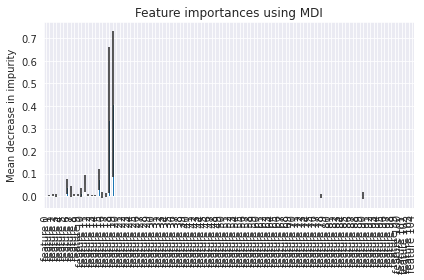

In [146]:
print(grid.best_estimator_.feature_importances_)
importances = grid.best_estimator_.feature_importances_
feature_names = [f"feature {i}" for i in range(X_test.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)
std = np.std([tree.feature_importances_ for tree in grid.best_estimator_.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [147]:
best_rmse.append((np.sqrt(-grid.best_score_)))

In [148]:
import xgboost as xg
xboost = xg.XGBRegressor()
#what is xgbfrregressor


In [149]:

parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'n_estimators': [200, 500, 800]}

xgb_grid = model_selection.GridSearchCV(xboost,
                        parameters,
                        cv = 5,
                        n_jobs = 5,
                        verbose=100,
                        scoring = 'neg_mean_squared_error')

xgb_grid.fit(X_train,y_train)




Fitting 5 folds for each of 27 candidates, totalling 135 fits
[11:34:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, estimator=XGBRegressor(), n_jobs=5,
             param_grid={'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7],
                         'n_estimators': [200, 500, 800], 'nthread': [4],
                         'objective': ['reg:linear']},
             scoring='neg_mean_squared_error', verbose=100)

In [150]:
best_rmse.append(np.sqrt(-xgb_grid.best_score_))

In [151]:
print(X.columns)

Index(['DataYear', 'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       ...
       'SecondLargestPropertyUseType_Non-Refrigerated Warehouse',
       'SecondLargestPropertyUseType_Office',
       'SecondLargestPropertyUseType_Other',
       'SecondLargestPropertyUseType_Other - Education',
       'SecondLargestPropertyUseType_Other - Restaurant/Bar',
       'SecondLargestPropertyUseType_Parking',
       'SecondLargestPropertyUseType_Restaurant',
       'SecondLargestPropertyUseType_Retail Store',
       'SecondLargestPropertyUseType_Self-Storage Facility',
       'SecondLargestPropertyUseType_Supermarket/Grocery Store'],
      dtype='object', length=105)


In [152]:
best_np_GHGE = np.array(best_rmse)
par_rapport_a_moyenne_GHGE = (best_np_GHGE / np.mean(Y)) * 100

In [153]:
selection_model_GHGE = pd.DataFrame(list(zip(*[list_model, best_rmse, par_rapport_a_moyenne_GHGE])), columns = ['model_s', 'root_mean_squared_error', 'error from mean'])
display(selection_model_GHGE)

model_s  root_mean_squared_error  error from mean
0         ridge                 0.165123        22.747312
1         lasso                 0.241277        33.238276
2    elasticnet                 0.165202        22.758161
3  randomforest                 0.165324        22.774954
4       Xgboost                 0.162942        22.446807

In [154]:
selection_model_GHGE.to_csv('/content/gdrive/My Drive/projet_prediction/star_score_selection_model_GHGE.csv')

#Predicting site enegy use

In [155]:
df_regression['SiteEnergyUse(kBtu)'].describe()

count    4.270000e+02
mean     1.521137e+06
std      9.007622e+05
min      7.971180e+04
25%      8.472586e+05
50%      1.351268e+06
75%      2.069511e+06
max      3.989399e+06
Name: SiteEnergyUse(kBtu), dtype: float64

####Regression linéaire ridge, lasso et elasticnet


In [156]:
Y = df_regression['SiteEnergyUse(kBtu)']
#should probably take away the carbon emission intensity because we are predicting energy and carbon gas, 

In [157]:
for i in df_regression.columns:
  print(i)

DataYear
ZipCode
CouncilDistrictCode
Latitude
Longitude
YearBuilt
NumberofBuildings
NumberofFloors
PropertyGFATotal
PropertyGFABuilding(s)
LargestPropertyUseTypeGFA
ENERGYSTARScore
SiteEUI(kBtu/sf)
SiteEUIWN(kBtu/sf)
SourceEUI(kBtu/sf)
SourceEUIWN(kBtu/sf)
SiteEnergyUse(kBtu)
SiteEnergyUseWN(kBtu)
SteamUse(kBtu)
Electricity(kWh)
Electricity(kBtu)
NaturalGas(therms)
NaturalGas(kBtu)
TotalGHGEmissions
GHGEmissionsIntensity
PrimaryPropertyType_Distribution Center
PrimaryPropertyType_Hotel
PrimaryPropertyType_K-12 School
PrimaryPropertyType_Large Office
PrimaryPropertyType_Low-Rise Multifamily
PrimaryPropertyType_Medical Office
PrimaryPropertyType_Mixed Use Property
PrimaryPropertyType_Other
PrimaryPropertyType_Refrigerated Warehouse
PrimaryPropertyType_Residence Hall
PrimaryPropertyType_Retail Store
PrimaryPropertyType_Senior Care Community
PrimaryPropertyType_Small- and Mid-Sized Office
PrimaryPropertyType_Warehouse
ZipCode_98033.0
ZipCode_98101.0
ZipCode_98102.0
ZipCode_98103.0
ZipCode_

In [158]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y,test_size= 0.3, random_state= 42)
display(X_test)

DataYear  Latitude  Longitude  YearBuilt  NumberofBuildings  \
419      2016  47.64779 -122.33352       1993                1.0   
75       2016  47.60765 -122.34097       1909                1.0   
177      2016  47.61185 -122.34340       1918                1.0   
30       2016  47.62224 -122.35850       1970                1.0   
358      2016  47.72900 -122.34473       1990                1.0   
..        ...       ...        ...        ...                ...   
403      2016  47.70349 -122.33424       1983                1.0   
255      2016  47.66116 -122.34172       1916                1.0   
108      2016  47.61460 -122.34217       1952                1.0   
101      2016  47.61285 -122.34817       1908                1.0   
342      2016  47.60035 -122.33379       1900                1.0   

     NumberofFloors  PropertyGFATotal  PropertyGFABuilding(s)  \
419               1             26263                   26263   
75                6             51218                   51218   
177               3             38148                   38148   
30                5             87178                   66762   
358               4             41704                   33120   
..              ...               ...                     ...   
403               3             24696                   18396   
255               3             31774                   31774   
108               4             26670                   26670   
101               3             28800                   28800   
342               3             25450                   25450   

     LargestPropertyUseTypeGFA  ENERGYSTARScore  ...  \
419                    26263.0             64.0  ...   
75                     44913.0             57.0  ...   
177                    37853.0             98.0  ...   
30                     66747.0             86.0  ...   
358                    41704.0             73.0  ...   
..                         ...              ...  ...   
403                    18396.0             87.0  ...   
255                    19896.0             85.0  ...   
108                    26670.0             51.0  ...   
101                    21600.0             50.0  ...   
342                    25450.0             99.0  ...   

     SecondLargestPropertyUseType_Non-Refrigerated Warehouse  \
419                                                0.0         
75                                                 0.0         
177                                                0.0         
30                                                 0.0         
358                                                0.0         
..                                                 ...         
403                                                0.0         
255                                                0.0         
108                                                0.0         
101                                                0.0         
342                                                0.0         

     SecondLargestPropertyUseType_Office  SecondLargestPropertyUseType_Other  \
419                                  0.0                                 0.0   
75                                   0.0                                 0.0   
177                                  0.0                                 0.0   
30                                   0.0                                 0.0   
358                                  0.0                                 0.0   
..                                   ...                                 ...   
403                                  0.0                                 0.0   
255                                  0.0                                 0.0   
108                                  0.0                                 0.0   
101                                  0.0                                 1.0   
342                                  0.0                                 0.0   

    

In [159]:
from sklearn.linear_model import LinearRegression
import math
model = LinearRegression()
model.fit(X_train, y_train)
r_squared = model.score(X_train, y_train)
adjusted_r_squared = 1 - (1- r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(adjusted_r_squared)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
print(math.sqrt(mse))
mae = mean_absolute_error(y_test, y_pred)
print(mae)



0.9995883857364564
128047.88264378054
30121.07329084056


In [160]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [161]:
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)
r_squared = model.score(X_train, y_train)
adjusted_r_squared = 1 - (1- r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(adjusted_r_squared)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
print(math.sqrt(mse))
mae = mean_absolute_error(y_test, y_pred)
print(mae)


0.999511759354702
125275.88116458248
26261.58789593446


In [162]:
vec = [0.1 , 0.5, 0.9, 1, 10, 30, 50, 75, 100, 130, 150, 200, 300, 400, 500, 1000, 2000, 10000]

In [163]:
ridge_mse_score = []
ridge_mae_score = []
ridge_adj_r2 = []
from sklearn.model_selection import cross_validate
for i in np.arange(1, 10000, 100):
  print(i)
  model = Ridge(alpha=i )
  cv_results = cross_validate(model, X_train, y_train, cv=5, scoring=('r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'))
  ridge_mse_score.append(np.mean(cv_results['test_neg_mean_squared_error']))
  ridge_mae_score.append(np.mean(cv_results['test_neg_mean_absolute_error']))
  ridge_adj_r2.append(np.mean(cv_results['test_r2']))
  




1
101
201
301
401
501
601
701
801
901
1001
1101
1201
1301
1401
1501
1601
1701
1801
1901
2001
2101
2201
2301
2401
2501
2601
2701
2801
2901
3001
3101
3201
3301
3401
3501
3601
3701
3801
3901
4001
4101
4201
4301
4401
4501
4601
4701
4801
4901
5001
5101
5201
5301
5401
5501
5601
5701
5801
5901
6001
6101
6201
6301
6401
6501
6601
6701
6801
6901
7001
7101
7201
7301
7401
7501
7601
7701
7801
7901
8001
8101
8201
8301
8401
8501
8601
8701
8801
8901
9001
9101
9201
9301
9401
9501
9601
9701
9801
9901


In [164]:
list_model = ['ridge', 'lasso', 'elasticnet', 'randomforest', 'Xgboost']
best_rmse = []
best_mae = []

In [165]:
ridge_mae = []
for i in ridge_mae_score:
  ridge_mae.append(-i)
ridge_rmse = []
for i in ridge_mse_score:
  ridge_rmse.append(np.sqrt(-i))
ridge_scores_cv = pd.DataFrame(list(zip(*[np.arange(1, 10000, 100), ridge_mae, ridge_rmse, ridge_adj_r2])), columns = ['alpha','mean absolute error', 'root_mean_squared_error', 'rsquared'])


In [166]:
display(ridge_scores_cv)

alpha  mean absolute error  root_mean_squared_error  rsquared
0       1         12740.459181             20198.648762  0.999372
1     101         13608.853380             23516.385358  0.999111
2     201         14310.417094             25286.739803  0.998960
3     301         14792.203227             26487.994061  0.998852
4     401         15100.149341             27513.137094  0.998757
..    ...                  ...                      ...       ...
95   9501         19972.141089             52637.471260  0.995567
96   9601         19990.365348             52708.439260  0.995555
97   9701         20008.273579             52778.290980  0.995544
98   9801         20025.873706             52847.053142  0.995532
99   9901         20043.173388             52914.751608  0.995521

[100 rows x 4 columns]

In [167]:
best_rmse.append(min(ridge_rmse))
best_mae.append(min(ridge_mae))

In [169]:

lasso_mse_score = []
lasso_mae_score = []
lasso_adj_r2 = []
for i in vec:
  print(i)
  lasso = Lasso(alpha=i )
  lasso.fit(X_train, y_train)
  r_squared = lasso.score(X_train, y_train)
  adjusted_r_squared = 1 - (1- r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
  lasso_adj_r2.append(adjusted_r_squared)
  y_pred = lasso.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  lasso_mse_score.append(mse)
  mae = mean_absolute_error(y_test, y_pred)
  lasso_mae_score.append(mae)

0.1
0.5
0.9
1


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.950e+10, tolerance: 2.062e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.983e+10, tolerance: 2.062e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.013e+10, tolerance: 2.062e+10

10
30
50


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.392e+10, tolerance: 2.062e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.853e+10, tolerance: 2.062e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.174e+10, tolerance: 2.062e+10

75
100


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.451e+10, tolerance: 2.062e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.645e+10, tolerance: 2.062e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.827e+10, tolerance: 2.062e+10

130
150
200


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.926e+10, tolerance: 2.062e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.127e+10, tolerance: 2.062e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.400e+10, tolerance: 2.062e+10

300
400
500


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.606e+10, tolerance: 2.062e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.766e+10, tolerance: 2.062e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.411e+10, tolerance: 2.062e+10

1000
2000
10000


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.491e+10, tolerance: 2.062e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.546e+11, tolerance: 2.062e+10
  model = cd_fast.enet_coordinate_descent(


In [170]:
lasso_mse_score = []
lasso_mae_score = []
lasso_adj_r2 = []
for i in np.arange(1, 10000, 100 ):
  print(i)
  model = Lasso(alpha=i )
  cv_results = cross_validate(model, X_train, y_train, cv=5, scoring=('r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'))
  lasso_mse_score.append(np.mean(cv_results['test_neg_mean_squared_error']))
  lasso_mae_score.append(np.mean(cv_results['test_neg_mean_absolute_error']))
  lasso_adj_r2.append(np.mean(cv_results['test_r2']))

1


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.405e+10, tolerance: 1.687e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.856e+10, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.140e+10, tolerance: 1.758e+10

101
201


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.471e+10, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.698e+10, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.122e+10, tolerance: 1.610e+10

301
401


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.745e+10, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.945e+10, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.351e+10, tolerance: 1.610e+10

501
601


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.234e+10, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.422e+10, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.793e+10, tolerance: 1.610e+10

701
801


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.530e+10, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.900e+10, tolerance: 1.610e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.235e+10, tolerance: 1.587e+10

901
1001


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.675e+10, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.837e+10, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.173e+10, tolerance: 1.610e+10

1101
1201


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.696e+10, tolerance: 1.587e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.023e+10, tolerance: 1.687e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.887e+10, tolerance: 1.597e+10

1301
1401


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.992e+10, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.739e+10, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.422e+10, tolerance: 1.610e+10

1501
1601


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.392e+10, tolerance: 1.687e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.304e+10, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.435e+10, tolerance: 1.758e+10

1701
1801


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.535e+10, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.625e+10, tolerance: 1.610e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.361e+10, tolerance: 1.587e+10

1901
2001


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.711e+10, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.828e+10, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.257e+10, tolerance: 1.610e+10

2101
2201


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.924e+10, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.177e+10, tolerance: 1.610e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.775e+10, tolerance: 1.587e+10

2301
2401


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.109e+10, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.205e+10, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.077e+10, tolerance: 1.587e+10

2501
2601


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.176e+10, tolerance: 1.587e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.284e+10, tolerance: 1.687e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.304e+10, tolerance: 1.597e+10

2701
2801


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.401e+10, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.480e+10, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.373e+10, tolerance: 1.587e+10

2901
3001


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.686e+10, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.747e+10, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.664e+10, tolerance: 1.587e+10

3101
3201


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.760e+10, tolerance: 1.587e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.797e+10, tolerance: 1.687e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.873e+10, tolerance: 1.597e+10

3301
3401


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.966e+10, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.008e+10, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.108e+10, tolerance: 1.610e+10

3501
3601


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.139e+10, tolerance: 1.587e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.131e+10, tolerance: 1.687e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.238e+10, tolerance: 1.597e+10

3701
3801


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.328e+10, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.344e+10, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.451e+10, tolerance: 1.610e+10

3901
4001


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.509e+10, tolerance: 1.587e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.457e+10, tolerance: 1.687e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.583e+10, tolerance: 1.597e+10

4101
4201


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.538e+10, tolerance: 1.687e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.668e+10, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.669e+10, tolerance: 1.758e+10

4301
4401


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.870e+10, tolerance: 1.587e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.777e+10, tolerance: 1.687e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.915e+10, tolerance: 1.597e+10

4501
4601


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.995e+10, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.981e+10, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.113e+10, tolerance: 1.610e+10

4701
4801


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.223e+10, tolerance: 1.587e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.089e+10, tolerance: 1.687e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.221e+10, tolerance: 1.597e+10

4901
5001


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.291e+10, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.282e+10, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.430e+10, tolerance: 1.610e+10

5101
5201


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.568e+10, tolerance: 1.587e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.393e+10, tolerance: 1.687e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.471e+10, tolerance: 1.597e+10

5301
5401


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.514e+10, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.569e+10, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.737e+10, tolerance: 1.610e+10

5501
5601


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.691e+10, tolerance: 1.687e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.506e+10, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.777e+10, tolerance: 1.758e+10

5701
5801


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.037e+10, tolerance: 1.610e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.007e+11, tolerance: 1.587e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.837e+10, tolerance: 1.687e+10

5901
6001


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.910e+10, tolerance: 1.687e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.979e+10, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.185e+10, tolerance: 1.610e+10

6101
6201


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.040e+11, tolerance: 1.587e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.124e+10, tolerance: 1.687e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.560e+10, tolerance: 1.597e+10

6301
6401


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.143e+10, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.301e+10, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.550e+10, tolerance: 1.610e+10

6501
6601


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.072e+11, tolerance: 1.587e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.404e+10, tolerance: 1.687e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.460e+10, tolerance: 1.597e+10

6701
6801


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.585e+10, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.487e+10, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.764e+10, tolerance: 1.610e+10

6901
7001


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.905e+10, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.666e+10, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.975e+10, tolerance: 1.610e+10

7101
7201


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.004e+11, tolerance: 1.610e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.119e+11, tolerance: 1.587e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.809e+10, tolerance: 1.687e+10

7301
7401


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.876e+10, tolerance: 1.687e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.018e+11, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.839e+10, tolerance: 1.758e+10

7501
7601


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.007e+11, tolerance: 1.687e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.044e+11, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.001e+11, tolerance: 1.758e+10

7701
7801


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.006e+11, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.045e+11, tolerance: 1.610e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.164e+11, tolerance: 1.587e+10

7901
8001


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.022e+11, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.065e+11, tolerance: 1.610e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.187e+11, tolerance: 1.587e+10

8101
8201


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.045e+11, tolerance: 1.687e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.091e+11, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.032e+11, tolerance: 1.758e+10

8301
8401


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.099e+11, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.037e+11, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.085e+11, tolerance: 1.610e+10

8501
8601


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.121e+11, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.052e+11, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.104e+11, tolerance: 1.610e+10

8701
8801


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.237e+11, tolerance: 1.587e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.081e+11, tolerance: 1.687e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.136e+11, tolerance: 1.597e+10

8901
9001


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.143e+11, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.066e+11, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.122e+11, tolerance: 1.610e+10

9101
9201


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.164e+11, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.079e+11, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.141e+11, tolerance: 1.610e+10

9301
9401


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.278e+11, tolerance: 1.587e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.116e+11, tolerance: 1.687e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.178e+11, tolerance: 1.597e+10

9501
9601


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.092e+11, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.159e+11, tolerance: 1.610e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.292e+11, tolerance: 1.587e+10

9701
9801
9901


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.104e+11, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.176e+11, tolerance: 1.610e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.311e+11, tolerance: 1.587e+10

In [171]:
lasso_mae = []
for i in lasso_mae_score:
  lasso_mae.append(-i)
lasso_rmse = []
for i in lasso_mse_score:
  lasso_rmse.append(np.sqrt(-i))
lasso_scores_cv = pd.DataFrame(list(zip(*[np.arange(1, 10000, 100), lasso_mae, lasso_rmse, lasso_adj_r2])), columns = ['alpha','mean absolute error', 'root_mean_squared_error', 'rsquared'])


In [172]:
best_rmse.append(min(lasso_rmse))
best_mae.append(min(lasso_mae))

In [173]:
alpha_en = np.linspace(1, 100, num = 100)
l1_ratio_en = np.linspace(0, 1, num = 100)


In [174]:
print(alpha_en.dtype, l1_ratio_en.dtype)

float64 float64


In [175]:
param_grid = {'alpha' : alpha_en,
    'l1_ratio' : l1_ratio_en
}

In [176]:
print(alpha_en, l1_ratio_en)

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100.] [0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343

In [177]:
print(alpha_en, l1_ratio_en)

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100.] [0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343

In [179]:
from sklearn import linear_model
from sklearn import model_selection

elasticnet = linear_model.ElasticNet()
clf = model_selection.RandomizedSearchCV(elasticnet, param_grid, cv = 5, scoring='neg_mean_squared_error', n_iter= 1000)


In [180]:
clf.fit(X_train, y_train)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.139e+11, tolerance: 1.597e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.519e+10, tolerance: 1.758e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

RandomizedSearchCV(cv=5, estimator=ElasticNet(), n_iter=1000,
                   param_distributions={'alpha': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,...
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747475,
       0.75757576, 0.76767677, 0.77777778, 0.78787879, 0.7979798 ,
       0.80808081, 0.81818182, 0.82828283, 0.83838384, 0.84848485,
       0.85858586, 0.86868687, 0.87878788, 0.88888889, 0.8989899 ,
       0.90909091, 0.91919192, 0.92929293, 0.93939394, 0.94949495,
       0.95959596, 0.96969697, 0.97979798, 0.98989899, 1.        ])},
                   scoring='neg_mean_square

In [181]:
clf.best_params_

{'l1_ratio': 0.98989898989899, 'alpha': 3.0}

In [182]:
best_rmse.append((np.sqrt(-clf.best_score_)))

##Non linéaire

In [183]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)

In [184]:
print(np.sqrt(mean_squared_error(y_test, pred)))

237560.25624699896


In [185]:
from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor()
param_grid = { 
            "n_estimators"      : [10,100, 200,300],
            "max_features"      : ["auto", "sqrt", "log2"], 
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False], #ca veut dire quoi
            }
grid = model_selection.GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5, scoring = 'neg_mean_squared_error')

grid.fit(X_train, y_train)

print(grid.best_score_, grid.best_params_)
grid.best_params_



-8477755900.676203 {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 300}


{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 300}

[0.00000000e+00 4.18476207e-04 4.38290674e-04 4.71441121e-04
 5.31856617e-06 1.68616356e-04 3.37829054e-04 3.22173251e-04
 3.09932548e-04 5.28230177e-04 4.30069001e-03 4.17109498e-04
 1.27813239e-03 3.74723599e-04 9.83884695e-01 6.45380236e-07
 2.40463498e-03 2.46849653e-03 3.23377374e-04 4.19968110e-04
 1.49784930e-05 7.61454882e-06 5.71149989e-06 6.65934401e-07
 1.20170126e-06 4.65740942e-06 6.04319993e-06 1.12028170e-06
 9.65701356e-06 1.94169332e-06 2.10867857e-05 9.90176544e-06
 1.38590402e-04 1.52229065e-05 0.00000000e+00 4.04290041e-06
 6.21998644e-06 1.08143199e-05 8.42457672e-06 4.09470321e-06
 7.16731705e-06 1.56972708e-06 2.63801274e-05 2.51136264e-05
 2.33697283e-06 1.05514554e-05 5.94471048e-05 1.45915757e-06
 9.96747410e-06 1.03646750e-05 1.65883198e-05 2.13181358e-06
 7.43118915e-06 8.78012301e-05 1.77192542e-05 1.47209347e-07
 1.80370577e-06 4.40481510e-07 0.00000000e+00 1.63686225e-08
 8.22972033e-07 2.13488013e-05 6.83245713e-09 1.58309496e-05
 2.32248581e-05 0.000000

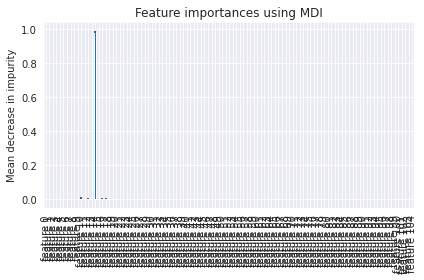

In [186]:
print(grid.best_estimator_.feature_importances_)
importances = grid.best_estimator_.feature_importances_
feature_names = [f"feature {i}" for i in range(X_test.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)
std = np.std([tree.feature_importances_ for tree in grid.best_estimator_.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [187]:
best_rmse.append((np.sqrt(-grid.best_score_)))

In [188]:
import xgboost as xg
xboost = xg.XGBRegressor()
#what is xgbfrregressor


In [189]:

parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'n_estimators': [200, 500, 800]}

xgb_grid = model_selection.GridSearchCV(xboost,
                        parameters,
                        cv = 5,
                        n_jobs = 5,
                        verbose=100,
                        scoring = 'neg_mean_squared_error')

xgb_grid.fit(X_train,y_train)




Fitting 5 folds for each of 27 candidates, totalling 135 fits
[11:44:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, estimator=XGBRegressor(), n_jobs=5,
             param_grid={'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7],
                         'n_estimators': [200, 500, 800], 'nthread': [4],
                         'objective': ['reg:linear']},
             scoring='neg_mean_squared_error', verbose=100)

In [190]:
best_rmse.append(np.sqrt(-xgb_grid.best_score_))

In [191]:
best_np = np.array(best_rmse)
par_rapport_a_moyenne = (best_np / np.mean(Y)) * 100


In [192]:
print(X.columns)

Index(['DataYear', 'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       ...
       'SecondLargestPropertyUseType_Non-Refrigerated Warehouse',
       'SecondLargestPropertyUseType_Office',
       'SecondLargestPropertyUseType_Other',
       'SecondLargestPropertyUseType_Other - Education',
       'SecondLargestPropertyUseType_Other - Restaurant/Bar',
       'SecondLargestPropertyUseType_Parking',
       'SecondLargestPropertyUseType_Restaurant',
       'SecondLargestPropertyUseType_Retail Store',
       'SecondLargestPropertyUseType_Self-Storage Facility',
       'SecondLargestPropertyUseType_Supermarket/Grocery Store'],
      dtype='object', length=105)


In [193]:
selection_model_site_energy_use = pd.DataFrame(list(zip(*[list_model, best_rmse, par_rapport_a_moyenne])), columns = ['model_s', 'root_mean_squared_error', 'mean percentage'])
display(selection_model_site_energy_use)

model_s  root_mean_squared_error  mean percentage
0         ridge             20198.648762         1.327865
1         lasso             20582.879633         1.353125
2    elasticnet             20564.647754         1.351926
3  randomforest             92074.729979         6.053020
4       Xgboost             80786.192646         5.310909

In [194]:
selection_model_site_energy_use.to_csv('/content/gdrive/My Drive/projet_prediction/starscore_selection_model_site_energy_use.csv')